# Task 5

## Importance of the Necessary Library

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier , RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report  , f1_score
import optuna

### Load the Data

In [3]:
df_tr = pd.read_csv('datasets/train.csv')
df_te = pd.read_csv('datasets/test.csv')
df_re = pd.read_csv('datasets/registration.csv')

## Merge Data

In [4]:
df_tr.head(1)

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,نعم,البكالوريوس,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0


In [5]:
df_te.head(1)

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Program Days,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working
0,d8524ed6-a1b2-4f6f-9041-66eebcab899a,23.0,أنثى,منطقة الرياض,الرياض,451d680f-e067-41c0-a998-6b3da3963bca,CAUF,SWPS,تقليدية,متوسط,...,5,لا,البكالوريوس,علوم الحاسب الالي,NaN,3.72,4.0,خريج,NaN,NaN


In [6]:
df_re.head(1)

,Student ID,PCRF,GRST,CAUF,INFA,ABIR,SERU,TOSL,APMR,DTFH,QWLM,N/A,Total Regestration
0,0005f921-db87-47a3-af19-000332af236b,6,0,1,3,0,0,0,3,0,0,6,19


check if athoer data set have same Student ID and merge it after this step we will drop dublcaites 

In [7]:
# Check if the Student IDs in train are the same as in registration
df_re['Student ID'].isin(df_tr['Student ID']).sum()

5196

In [8]:
df_train = pd.merge(df_tr, df_re, on='Student ID', how='inner')

In [9]:
# Check if the Student IDs in test are the same as in registration
df_re['Student ID'].isin(df_te['Student ID']).sum()

780

In [10]:
df_test = pd.merge(df_te, df_re, on='Student ID', how='inner')

## Connect Data

this column to split it after preprocessing 

In [11]:
df_train['p'] = 1
df_test['p'] = 0

In [12]:
df_concat = pd.concat([df_train, df_test], axis=0)

In [13]:
len(df_concat)

7366

## Data Understanding

In [164]:
# Inspect the Data
df_concat.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,INFA,ABIR,SERU,TOSL,APMR,DTFH,QWLM,N/A,Total Regestration,p
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,0,0,0,0,0,0,0,0,4,1
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,0,0,1,0,4,0,0,1,15,1
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,1,0,0,0,0,0,0,0,13,1
3,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,3218820e-5fc3-4dcb-8c23-17ac8de5e4b0,GRST,INFA,تقليدية,متوسط,...,1,0,0,0,0,0,0,0,13,1
4,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,2,0,0,0,0,0,0,0,6,1


In [17]:
# Inspect the Data
df_concat.tail()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,INFA,ABIR,SERU,TOSL,APMR,DTFH,QWLM,N/A,Total Regestration,p
813,c4bd99a6-2902-4822-947e-2a3aab3f1e92,36.0,ذكر,منطقة الرياض,الرياض,1b546d80-2ed0-42e6-9867-61b3d2f92d50,GRST,INFA,NaN,متوسط,...,0,0,0,0,0,0,0,0,1,0
814,2e057846-ee90-4b31-b6e7-c1c5122f4cbd,29.0,ذكر,منطقة الرياض,الرياض,aa87165d-cbde-4453-baca-1c8c03775e39,CAUF,CRDP,داعمة,مبتدئ,...,0,0,0,0,0,0,0,3,4,0
815,8f9ff50d-510c-4d56-b0eb-60c2fb1c5e84,32.0,ذكر,منطقة الرياض,الرياض,c49987af-b421-4b88-b36a-a0ec91d95aa3,GRST,INFA,تقليدية,متوسط,...,1,0,0,0,0,0,0,0,5,0
816,8a49b6cd-e7c3-460b-8126-a419cf995e6e,28.0,أنثى,منطقة الرياض,الرياض,899795e1-7bf3-46d0-a58e-824d4033f6da,PCRF,PCRF,تقليدية,متوسط,...,0,0,0,0,2,0,0,0,6,0
817,4a15a037-f5f4-4947-8a67-9f28494a6f26,23.0,ذكر,منطقة الرياض,الرياض,0d6336e2-4a79-4c32-8f15-073f9a4f6976,PCRF,PCRF,تقليدية,مبتدئ,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# Understand the Structure
df_concat.shape

(7366, 37)

In [19]:
df_concat.dtypes

Student ID                         object
Age                               float64
Gender                             object
Home Region                        object
Home City                          object
Program ID                         object
Program Main Category Code         object
Program Sub Category Code          object
Technology Type                    object
Program Skill Level                object
Program Presentation Method        object
Program Start Date                 object
Program End Date                   object
Program Days                        int64
Completed Degree                   object
Level of Education                 object
Education Speaciality              object
College                            object
University Degree Score           float64
University Degree Score System    float64
Employment Status                  object
Job Type                           object
Still Working                      object
Y                                 

In [20]:
# Summary Statistics
df_concat.describe()

,Age,Program Days,University Degree Score,University Degree Score System,Y,PCRF,GRST,CAUF,INFA,ABIR,SERU,TOSL,APMR,DTFH,QWLM,N/A,Total Regestration,p
count,7260.000000,7366.000000,7274.000000,7274.000000,6548.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.0,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000
mean,26.813912,19.669970,8.244583,9.769728,0.158674,1.851344,0.283465,2.947054,0.928998,0.110508,0.077111,0.0,1.657209,0.003801,0.012490,1.902254,9.837225,0.888949
std,5.527743,31.975408,19.171624,21.248205,0.365400,3.343519,0.613950,4.447649,1.637223,0.394815,0.279705,0.0,2.623758,0.069811,0.111065,4.091911,11.863113,0.314216
min,18.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,23.000000,5.000000,3.300000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,25.000000,12.000000,4.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,6.000000,1.000000
75%,29.000000,19.000000,4.510000,5.000000,0.000000,2.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,2.000000,13.000000,1.000000
max,58.000000,292.000000,100.000000,100.000000,1.000000,27.000000,4.000000,45.000000,13.000000,4.000000,2.000000,0.0,19.000000,2.000000,1.000000,47.000000,109.000000,1.000000


In [21]:
# Check for Missing Values
df_concat.isnull().sum()

Student ID                           0
Age                                106
Gender                               0
Home Region                          3
Home City                            3
Program ID                           0
Program Main Category Code           0
Program Sub Category Code         1050
Technology Type                   3346
Program Skill Level               1846
Program Presentation Method          0
Program Start Date                   0
Program End Date                     0
Program Days                         0
Completed Degree                     0
Level of Education                  29
Education Speaciality              314
College                           4382
University Degree Score             92
University Degree Score System      92
Employment Status                  636
Job Type                          5148
Still Working                     5148
Y                                  818
PCRF                                 0
GRST                     

count null value if it pass or not in all columns 

In [22]:
columns_with_null = df_concat.columns[df_concat.isnull().any()].tolist()
for column in columns_with_null:
    pass_count = df_concat[df_concat[column].isnull()]['Y'].sum()
    fail_count = df_concat[df_concat[column].isnull()]['Y'].count() - pass_count    
    print(column)
    print(f"Pass: {pass_count}")
    print(f"Fail: {fail_count}")
    print()

Age
Pass: 9.0
Fail: 83.0

Home Region
Pass: 0.0
Fail: 2.0

Home City
Pass: 0.0
Fail: 2.0

Program Sub Category Code
Pass: 121.0
Fail: 814.0

Technology Type
Pass: 423.0
Fail: 2559.0

Program Skill Level
Pass: 198.0
Fail: 1448.0

Level of Education
Pass: 3.0
Fail: 23.0

Education Speaciality
Pass: 54.0
Fail: 223.0

College
Pass: 685.0
Fail: 3205.0

University Degree Score
Pass: 4.0
Fail: 77.0

University Degree Score System
Pass: 4.0
Fail: 77.0

Employment Status
Pass: 56.0
Fail: 510.0

Job Type
Pass: 772.0
Fail: 3795.0

Still Working
Pass: 772.0
Fail: 3795.0

Y
Pass: 0.0
Fail: 0.0



In [23]:
df_concat.duplicated().sum()

52

In [24]:
df_concat.drop_duplicates(inplace=True)

In [25]:
# Explore Categorical Variables
df_concat['Y'].value_counts()

Y
0.0    5461
1.0    1039
Name: count, dtype: int64

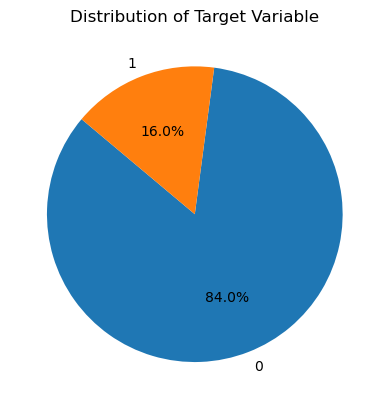

In [26]:
plt.pie(df_concat['Y'].value_counts(), labels=df_train['Y'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable');

In [27]:
df_concat['College'].value_counts()

College
تكنولوجيا الاتصالات والمعلومات         2582
الأعمال والإدارة والقانون               169
العلوم الطبيعية والرياضيات والإحصاء      64
الهندسة والتصنيع والبناء                 46
الفنون والعلوم الإنسانية                 44
العلوم الاجتماعية والصحافة والإعلام      29
التعليم                                  22
الصحة والرفاة                             4
البرامج والمؤهلات العامة                  2
Name: count, dtype: int64

In [28]:
df_concat['Home Region'].value_counts()

Home Region
منطقة الرياض             5347
منطقة مكة المكرمة         676
المنطقة الشرقية           491
منطقة المدينة المنورة     192
منطقة عسير                191
منطقة القصيم              116
منطقة جازان                64
منطقة تبوك                 59
منطقة الباحة               51
منطقة حائل                 38
منطقة نجران                31
منطقة الجوف                29
منطقة الحدود الشمالية      26
Name: count, dtype: int64

In [29]:
df_concat['Level of Education'].value_counts()

Level of Education
البكالوريوس    6048
الماجستير       549
الدبلوم         353
ثانوي           303
الدكتوراه        35
متوسط             1
Name: count, dtype: int64

In [30]:
df_concat['Program Sub Category Code'].value_counts()

Program Sub Category Code
SWPS    2002
PCRF    1872
SRTA     795
INFA     578
TOSL     326
CRDP     266
ERST     197
KLTM     132
QTDY      55
ASCW      39
ABIR      19
Name: count, dtype: int64

In [31]:
df_concat['Technology Type'].value_counts()

Technology Type
تقليدية    3024
ناشئة       488
داعمة       481
Name: count, dtype: int64

In [32]:
df_concat['Program Skill Level'].value_counts()

Program Skill Level
متوسط    2385
مبتدئ    2312
متقدم     772
Name: count, dtype: int64

In [33]:
df_concat['Employment Status'].value_counts()

Employment Status
موظف           3124
غير موظف       1237
طالب           1088
خريج           1067
موظف - طالب      99
عمل حر           72
Name: count, dtype: int64

In [34]:
df_concat['Job Type'].value_counts()

Job Type
دوام كامل    1545
تدريب         537
دوام جزئي      71
تطوع           48
Name: count, dtype: int64

In [35]:
df_concat['Still Working'].value_counts()

Still Working
Yes    1376
No      825
Name: count, dtype: int64

In [36]:
df_concat[['Education Speaciality']].sample(10)

,Education Speaciality
1777,هندسة البرمجيات
5019,هندسة برمجيات
2537,تقنية المعلومات
3520,علوم الحاسبات
5114,علوم الحاسبات
1388,نظم المعلومات
387,نظم المعلومات
183,Information Security
5074,نظم المعلومات
3772,شبكات


In [37]:
df_concat['Completed Degree'].value_counts()

Completed Degree
نعم    5796
لا     1518
Name: count, dtype: int64

/tmp/ipykernel_146/4219979837.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Y', y='Age', data=df_train, palette='Set2')


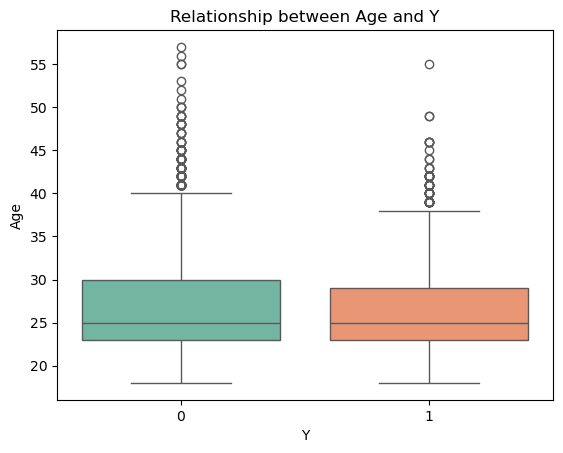

In [38]:
sns.boxplot(x='Y', y='Age', data=df_train, palette='Set2')
plt.title('Relationship between Age and Y')
plt.xlabel('Y')
plt.ylabel('Age');

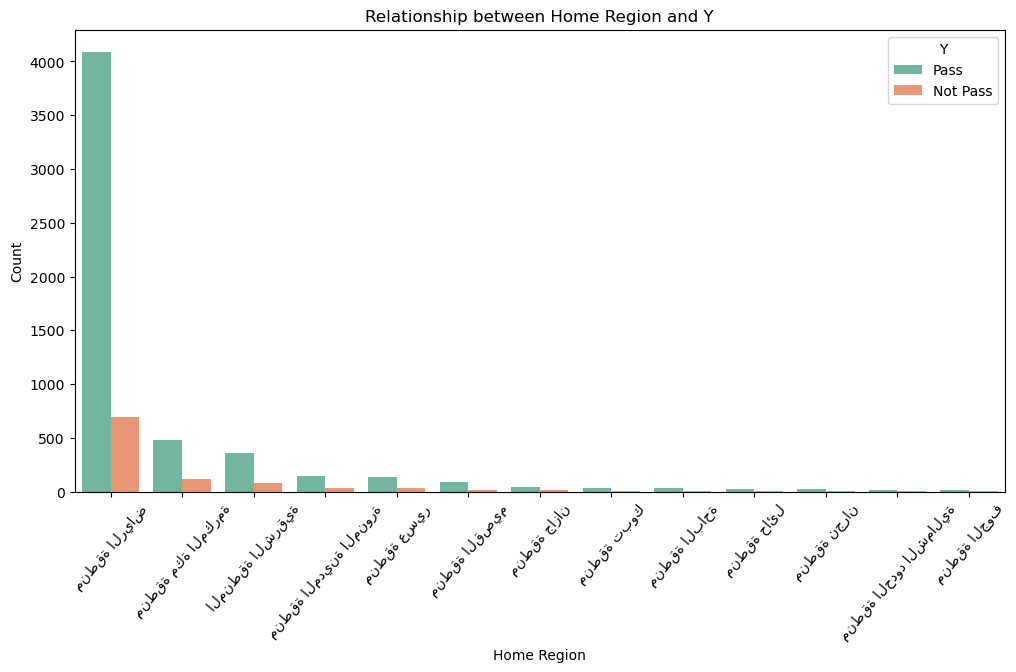

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_train['Home Region'], hue='Y', data=df_train, order=df_train['Home Region'].value_counts().index, palette='Set2')
plt.title('Relationship between Home Region and Y')
plt.xlabel('Home Region')
plt.ylabel('Count')
plt.xticks(rotation=50)  
plt.legend(title='Y', labels=['Pass', 'Not Pass'])
plt.show()

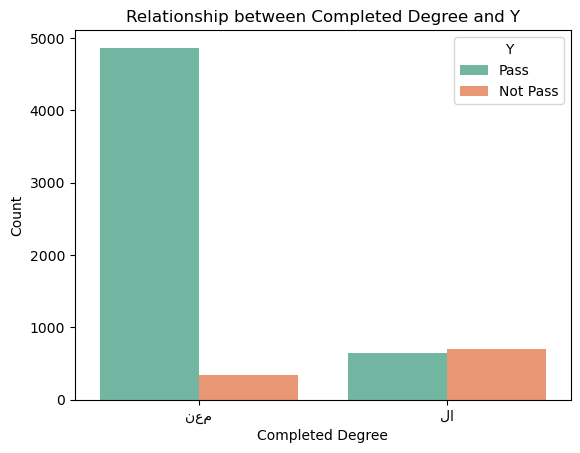

In [40]:
sns.countplot(x='Completed Degree', hue='Y', data=df_train, palette='Set2')
plt.title('Relationship between Completed Degree and Y')
plt.xlabel('Completed Degree')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Pass', 'Not Pass']);

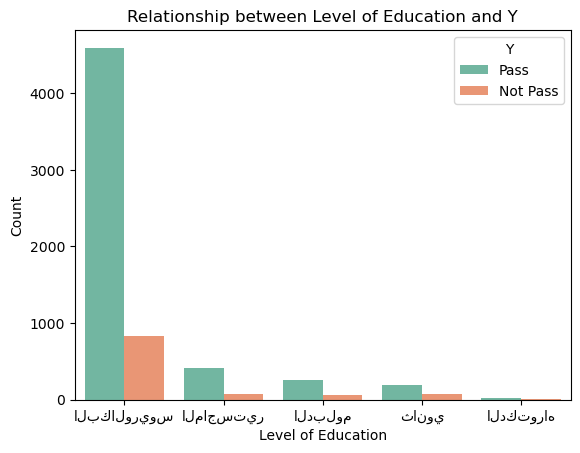

In [41]:
sns.countplot(x='Level of Education', hue='Y', data=df_train,order= df_train['Level of Education'].value_counts().index,  palette='Set2')
plt.title('Relationship between Level of Education and Y')
plt.xlabel('Level of Education')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Pass', 'Not Pass']);

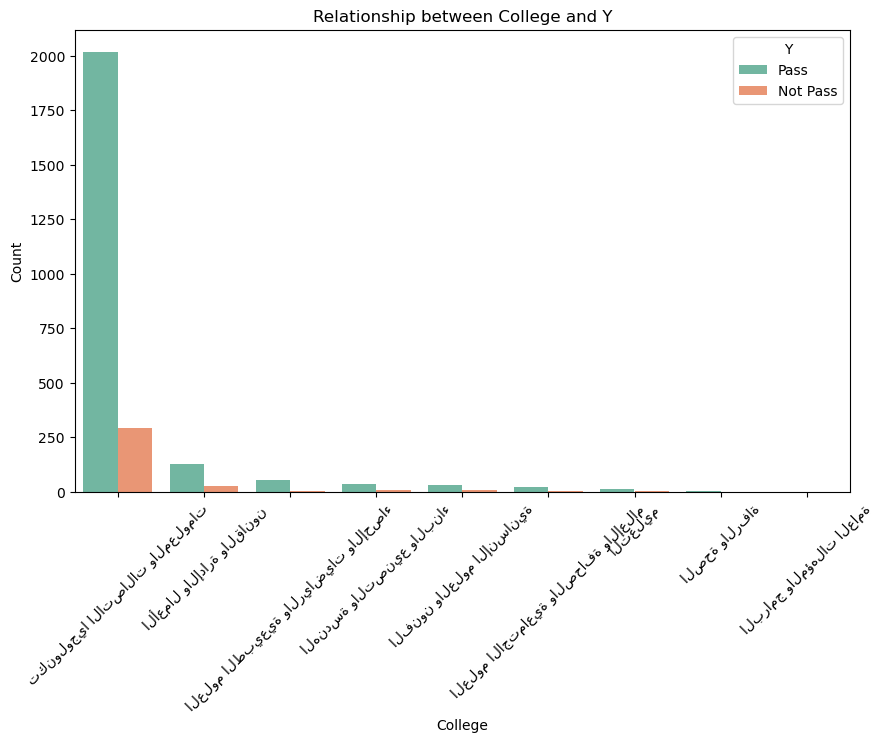

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='College', hue='Y', data=df_train, order= df_train['College'].value_counts().index, palette='Set2')
plt.title('Relationship between College and Y')
plt.xlabel('College')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.legend(title='Y', labels=['Pass', 'Not Pass']);

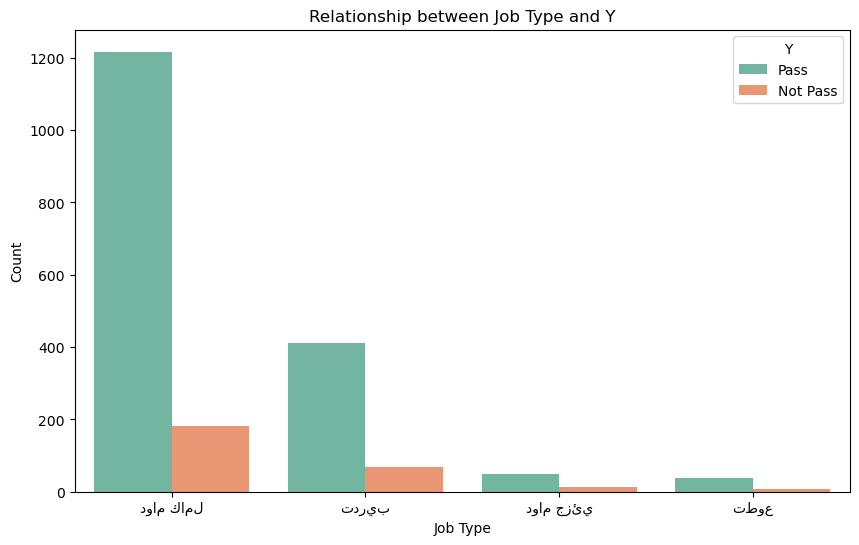

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Job Type', hue='Y', data=df_train, order= df_train['Job Type'].value_counts().index, palette='Set2')
plt.title('Relationship between Job Type and Y')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Pass', 'Not Pass']);

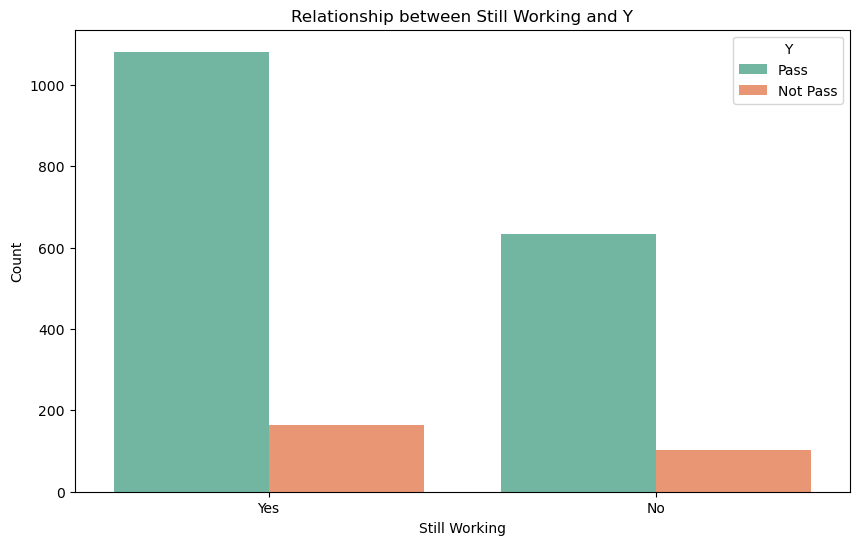

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Still Working', hue='Y', data=df_train, order= df_train['Still Working'].value_counts().index, palette='Set2')
plt.title('Relationship between Still Working and Y')
plt.xlabel('Still Working')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Pass', 'Not Pass']);

## Data Preparation

### Features

In [45]:
df_concat.dtypes

Student ID                         object
Age                               float64
Gender                             object
Home Region                        object
Home City                          object
Program ID                         object
Program Main Category Code         object
Program Sub Category Code          object
Technology Type                    object
Program Skill Level                object
Program Presentation Method        object
Program Start Date                 object
Program End Date                   object
Program Days                        int64
Completed Degree                   object
Level of Education                 object
Education Speaciality              object
College                            object
University Degree Score           float64
University Degree Score System    float64
Employment Status                  object
Job Type                           object
Still Working                      object
Y                                 

In [14]:
# Convert 'Program Start Date' and 'Program End Date' to datetime format
df_concat['Program Start Date'] = pd.to_datetime(df_concat['Program Start Date'])
df_concat['Program End Date'] = pd.to_datetime(df_concat['Program End Date'])

In [15]:
df_concat.dtypes

Student ID                                object
Age                                      float64
Gender                                    object
Home Region                               object
Home City                                 object
Program ID                                object
Program Main Category Code                object
Program Sub Category Code                 object
Technology Type                           object
Program Skill Level                       object
Program Presentation Method               object
Program Start Date                datetime64[ns]
Program End Date                  datetime64[ns]
Program Days                               int64
Completed Degree                          object
Level of Education                        object
Education Speaciality                     object
College                                   object
University Degree Score                  float64
University Degree Score System           float64
Employment Status   

In [16]:
# Extract relevant information from the date features
df_concat['Start Year'] = df_concat['Program Start Date'].dt.year
df_concat['Start Month'] = df_concat['Program Start Date'].dt.month
df_concat['Start Day'] = df_concat['Program Start Date'].dt.day

df_concat['End Year'] = df_concat['Program End Date'].dt.year
df_concat['End Month'] = df_concat['Program End Date'].dt.month
df_concat['End Day'] = df_concat['Program End Date'].dt.day

In [17]:
df_concat.drop(['Program Start Date', 'Program End Date'], axis=1, inplace=True)

In [18]:
df_concat.dtypes

Student ID                         object
Age                               float64
Gender                             object
Home Region                        object
Home City                          object
Program ID                         object
Program Main Category Code         object
Program Sub Category Code          object
Technology Type                    object
Program Skill Level                object
Program Presentation Method        object
Program Days                        int64
Completed Degree                   object
Level of Education                 object
Education Speaciality              object
College                            object
University Degree Score           float64
University Degree Score System    float64
Employment Status                  object
Job Type                           object
Still Working                      object
Y                                 float64
PCRF                                int64
GRST                              

In [19]:
def convert_score(score, score_system):
    if score_system == 5:
        return (4 / 5) * score
    elif score_system == 100:
        return score / 25
    else:
        return score

In [20]:
df_concat['Degree'] = df_concat.apply(lambda row: convert_score(row['University Degree Score'], row['University Degree Score System']), axis=1)

In [21]:
sample_df = df_concat[['Student ID', 'University Degree Score System','University Degree Score' , 'Degree']].sample(6)
sample_df

,Student ID,University Degree Score System,University Degree Score,Degree
2086,fd714394-5fcc-4599-b6ad-35eaf7392da8,5.0,4.00,3.2
5199,6e37751f-fcbf-44da-9b12-361acdfd63e2,5.0,4.25,3.4
241,0cb4c0f8-5f65-40ad-901b-380e9d40919b,NaN,NaN,NaN
431,afd572e0-8769-4366-9a69-0b56d2ee29de,5.0,4.00,3.2
5942,d5b3ec97-3aaf-42c0-a9a2-742ccb2109cd,5.0,5.00,4.0
4384,7e8a6aaf-df42-4b9b-95da-1f95561c55b4,5.0,2.00,1.6


In [22]:
df_concat.drop(['University Degree Score System', 'University Degree Score'], axis=1, inplace=True)

In [23]:
df_concat['Education Speaciality'] = df_concat['Education Speaciality'].str.lower()

In [24]:
df_concat.drop(['College', 'Job Type', 'Still Working', 'Education Speaciality'], axis=1, inplace=True)

### Encoding categorical 

In [25]:
object_columns = df_concat.select_dtypes(include=['object'])
object_columns = object_columns.drop(columns=['Student ID' , 'Program ID'], errors='ignore')

In [26]:
encoder = OrdinalEncoder()

In [27]:
encoded_data = encoder.fit_transform(object_columns)

In [28]:
df_concat[object_columns.columns] = encoded_data

In [29]:
df_concat.dtypes

Student ID                      object
Age                            float64
Gender                         float64
Home Region                    float64
Home City                      float64
Program ID                      object
Program Main Category Code     float64
Program Sub Category Code      float64
Technology Type                float64
Program Skill Level            float64
Program Presentation Method    float64
Program Days                     int64
Completed Degree               float64
Level of Education             float64
Employment Status              float64
Y                              float64
PCRF                             int64
GRST                             int64
CAUF                             int64
INFA                             int64
ABIR                             int64
SERU                             int64
TOSL                             int64
APMR                             int64
DTFH                             int64
QWLM                     

In [30]:
df_concat.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,N/A,Total Regestration,p,Start Year,Start Month,Start Day,End Year,End Month,End Day,Degree
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,1.0,4.0,24.0,453686d8-4023-4506-b2df-fac8b059ac26,6.0,6.0,NaN,NaN,...,0,4,1,2023,5,28,2023,6,8,2.44
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,1.0,10.0,66.0,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,1.0,9.0,NaN,2.0,...,1,15,1,2023,4,2,2023,4,6,4.00
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,1.0,4.0,24.0,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,1.0,NaN,NaN,2.0,...,0,13,1,2023,7,23,2023,9,14,2.80
3,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,1.0,4.0,24.0,3218820e-5fc3-4dcb-8c23-17ac8de5e4b0,4.0,4.0,0.0,2.0,...,0,13,1,2022,9,25,2022,9,27,2.80
4,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,1.0,4.0,24.0,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,9.0,10.0,NaN,NaN,...,0,6,1,2023,7,23,2023,8,24,2.84


### Scaling data

In [31]:
scaler = StandardScaler()

In [32]:
num_columns = df_concat.select_dtypes(include= 'number')

In [33]:
num_columns.drop(['Y' , 'p'], axis=1, inplace=True)

In [34]:
scaled_data = scaler.fit_transform(num_columns)

In [35]:
df_concat[num_columns.columns] = scaled_data

In [186]:
df_concat.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,N/A,Total Regestration,p,Start Year,Start Month,Start Day,End Year,End Month,End Day,Degree
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,1.842848,1.134715,-0.261646,-0.331834,453686d8-4023-4506-b2df-fac8b059ac26,0.963723,-0.405670,NaN,NaN,...,-0.464913,-0.492082,1,0.467011,-0.429319,1.513341,0.374672,-0.202556,-0.783620,-0.707172
1,0599d409-876b-41a5-af05-749ef0e77d32,-1.051842,1.134715,2.029080,2.206091,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,-0.979552,0.938148,NaN,1.061013,...,-0.220512,0.435225,1,0.467011,-0.711849,-1.442771,0.374672,-0.768896,-1.026076,0.694963
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,-0.509088,1.134715,-0.261646,-0.331834,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,-0.979552,NaN,NaN,1.061013,...,-0.464913,0.266624,1,0.467011,0.135742,0.944858,0.374672,0.646956,-0.056253,-0.383603
3,38a11c0e-4afc-4261-9c64-e94cc0a272fb,-0.509088,1.134715,-0.261646,-0.331834,3218820e-5fc3-4dcb-8c23-17ac8de5e4b0,0.186413,-1.301549,-0.527528,1.061013,...,-0.464913,0.266624,1,-1.826325,0.700803,1.172251,-1.852799,0.646956,1.519710,-0.383603
4,1693e85b-f80e-40ce-846f-395ddcece6d3,-0.690006,1.134715,-0.261646,-0.331834,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,2.129688,1.386087,NaN,NaN,...,-0.464913,-0.323480,1,0.467011,0.135742,0.944858,0.374672,0.363785,1.156026,-0.347651


### imputating 

In [69]:
df_concat.isnull().sum()

Student ID                        0
Age                             101
Gender                            0
Home Region                       3
Home City                         3
Program ID                        0
Program Main Category Code        0
Program Sub Category Code      1033
Technology Type                3321
Program Skill Level            1845
Program Presentation Method       0
Program Days                      0
Completed Degree                  0
Level of Education               25
Education Speaciality           309
College                        4352
Employment Status               627
Job Type                       5113
Still Working                  5113
Y                               814
PCRF                              0
GRST                              0
CAUF                              0
INFA                              0
ABIR                              0
SERU                              0
TOSL                              0
APMR                        

In [36]:
# Create a copy of df_concat without the columns 'Y', 'Student ID', 'Program ID'
missing_value = df_concat.drop(['Y', 'Student ID', 'Program ID'], axis=1)

In [37]:
# Initialize KNNImputer with 15 neighbors
imputer = KNNImputer(n_neighbors=7)

In [38]:
# Fit and transform the KNNImputer on missing_value
imputed_values = imputer.fit_transform(missing_value)

In [39]:
# Convert the imputed values array back to a DataFrame
imputed_df = pd.DataFrame(imputed_values, index=missing_value.index, columns=missing_value.columns)

In [40]:
# Add back the dropped columns to imputed_df
imputed_df[['Y', 'Student ID', 'Program ID']] = df_concat[['Y', 'Student ID', 'Program ID']]

In [41]:
df_concat[imputed_df.columns] = imputed_df

In [42]:
# Update df_concat with the imputed values
df_concat = imputed_df

In [43]:
df_concat.isnull().sum()

Age                              0
Gender                           0
Home Region                      0
Home City                        0
Program Main Category Code       0
Program Sub Category Code        0
Technology Type                  0
Program Skill Level              0
Program Presentation Method      0
Program Days                     0
Completed Degree                 0
Level of Education               0
Employment Status                0
PCRF                             0
GRST                             0
CAUF                             0
INFA                             0
ABIR                             0
SERU                             0
TOSL                             0
APMR                             0
DTFH                             0
QWLM                             0
N/A                              0
Total Regestration               0
p                                0
Start Year                       0
Start Month                      0
Start Day           

https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/advanced-imputation-techniques?ex=7

https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa

https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/

### Split Data

In [44]:
new_train = df_concat[df_concat.p == 1]
new_test = df_concat[df_concat.p == 0]

In [45]:
new_train.drop('p', axis=1, inplace=True)

/tmp/ipykernel_11354/770791586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train.drop('p', axis=1, inplace=True)


In [46]:
new_test.drop(['p', 'Y'], axis=1, inplace=True)

/tmp/ipykernel_11354/927185882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test.drop(['p', 'Y'], axis=1, inplace=True)


In [81]:
new_train.head()

,Age,Gender,Home Region,Home City,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,Program Presentation Method,Program Days,...,Start Year,Start Month,Start Day,End Year,End Month,End Day,Degree,Y,Student ID,Program ID
0,1.844464,1.139858,-0.263121,-0.332781,0.972842,-0.405944,-0.528784,-0.014405,-0.567982,-0.238492,...,0.467963,-0.433529,1.513610,0.375310,-0.205912,-0.782054,-0.706499,0.0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,453686d8-4023-4506-b2df-fac8b059ac26
1,-1.050411,1.139858,2.023339,2.199918,-0.976681,0.935316,-0.528784,1.064763,-0.567982,-0.456905,...,0.467963,-0.716311,-1.441445,0.375310,-0.772837,-1.024106,0.692414,0.0,0599d409-876b-41a5-af05-749ef0e77d32,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60
2,-0.507622,1.139858,-0.263121,-0.332781,-0.976681,0.296621,0.299311,1.064763,-0.567982,1.071981,...,0.467963,0.132034,0.945330,0.375310,0.644476,-0.055896,-0.383673,0.0,38a11c0e-4afc-4261-9c64-e94cc0a272fb,e006900d-05a9-4c2b-a36f-0ffb9fce44cd
3,-0.507622,1.139858,-0.263121,-0.332781,0.193033,-1.300118,-0.528784,1.064763,-0.567982,-0.519308,...,-1.821456,0.697598,1.172642,-1.847377,0.644476,1.517444,-0.383673,0.0,38a11c0e-4afc-4261-9c64-e94cc0a272fb,3218820e-5fc3-4dcb-8c23-17ac8de5e4b0
4,-0.688551,1.139858,-0.263121,-0.332781,2.142556,1.382403,-0.114737,0.448096,-0.567982,0.416744,...,0.467963,0.132034,0.945330,0.375310,0.361014,1.154365,-0.347804,0.0,1693e85b-f80e-40ce-846f-395ddcece6d3,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9


### Split data to train and test

This section to show sample model and we see how we data work

In [47]:
X = new_train.drop(['Y', 'Student ID', 'Program ID'], axis=1)  # Features
y = new_train['Y']  # Target variable

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
y_train.shape

(5238,)

In [50]:
dtree = DecisionTreeClassifier(max_depth=2)

In [51]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [52]:
y_pred_dtree = dtree.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1102
         1.0       0.58      0.55      0.57       208

    accuracy                           0.87      1310
   macro avg       0.75      0.74      0.74      1310
weighted avg       0.86      0.87      0.86      1310



Text(0, 0.5, 'Count')

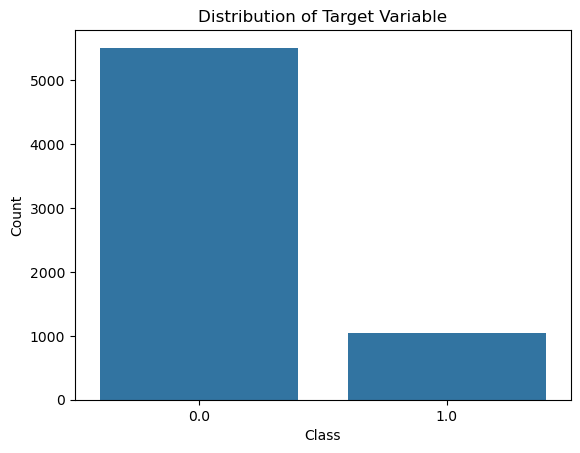

In [54]:
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')

In [55]:
cv_scores = cross_val_score(dtree, X, y, cv=5, scoring='accuracy')

In [56]:
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.8870229  0.87480916 0.8648855  0.86172651 0.87929717]
Mean accuracy: 0.8735482478904123


### Imbalance data

#### SMOTE

- `minority`: resample only the minority class 
- `not minority`: resample all classes but the minority class
- `not majority`: resample all classes but the majority class
- `all`: resample all classes
- `auto`: equivalen not `not majority`
- rity'

In [57]:
X = new_train.drop(['Y', 'Student ID', 'Program ID'], axis=1)  # Features
y = new_train['Y']  # Target variable

In [58]:
y.value_counts()

Y
0.0    5509
1.0    1039
Name: count, dtype: int64

In [59]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [60]:
y_sm.value_counts()

Y
0.0    5509
1.0    5509
Name: count, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=42)

In [62]:
y_train.value_counts()

Y
1.0    4407
0.0    4407
Name: count, dtype: int64

In [63]:
y_test.value_counts()

Y
0.0    1102
1.0    1102
Name: count, dtype: int64

Text(0, 0.5, 'Count')

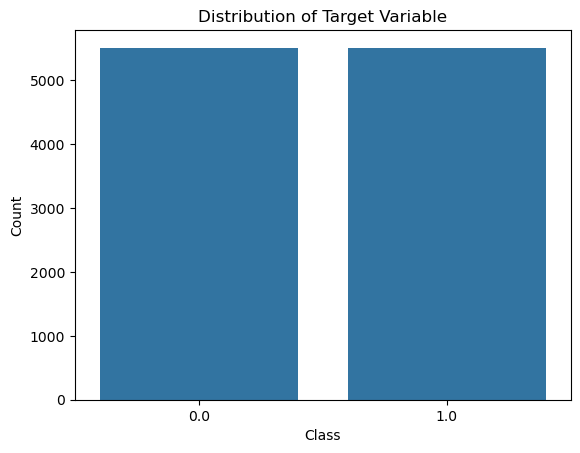

In [64]:
sns.countplot(x=y_sm)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')

In [65]:
y_pred_sm = dtree.predict(X_test)
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80      1102
         1.0       0.89      0.62      0.73      1102

    accuracy                           0.77      2204
   macro avg       0.80      0.77      0.77      2204
weighted avg       0.80      0.77      0.77      2204



https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

https://rihab-feki.medium.com/imbalanced-data-best-practices-f3b6d0999f38

https://github.com/PacktPublishing/Machine-Learning-for-Imbalanced-Data/blob/main/Table%20of%20Content.pdf

https://youtu.be/JnlM4yLFNuo?si=HR78LnO2a32rfRnF

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

## Train Data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=42)

. **Parameters Setup**: Defines a dictionary `params` where hyperparameters are stored. These hyperparameters include:
   - `n_estimators`: Number of boosting stages.
   - `learning_rate`: Step size at each iteration.
   - `max_depth`: Maximum depth of the individual estimators.
   - `min_samples_split`: Minimum number of samples required to split an internal node.
   - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
   - `max_features`: Number of features to consider when looking for the best split.
   - `random_state`: Seed for random number generation.
   - `verbose`: Verbosg it for optimization.

The F1 score is a metric commonly used to evaluate the performance of classification models. It's the harmonic mean of precision and recall, where precision is the ratio of true positive predictions to the total predicted positives, and recall is the ratio of true positive predictions to the total actual positives. The F1 score is particularly useful when there is an imbalance between the classes in the dataset.search process.

In [102]:
def objective_gc(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
        'random_state': 554,
        'verbose': 0
    }
    
    gb_classifier = GradientBoostingClassifier(**params)
    gb_classifier.fit(X_train, y_train)    
    y_pred = gb_classifier.predict(X_test)    
    f1 = f1_score(y_test, y_pred)
    return f1

In [103]:
def callback(study, trial):
    print("Trial Number: ", trial.number)
    print("Best F1 Score So Far: ", study.best_value)
    print("Current Best Parameters: ", study.best_params)
    print("Trial Parameters: ", trial.params)
    print("-" * 50)

In [104]:
# Perform hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective_gc, n_trials=100, callbacks=[callback])

[I 2024-04-21 07:51:57,889] A new study created in memory with name: no-name-1e3df45b-3d3a-4b59-9163-eaffa4551abc
[I 2024-04-21 07:52:09,119] Trial 0 finished with value: 0.9346826126954921 and parameters: {'n_estimators': 654, 'learning_rate': 0.09004710871444695, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9346826126954921.


Trial Number:  0
Best F1 Score So Far:  0.9346826126954921
Current Best Parameters:  {'n_estimators': 654, 'learning_rate': 0.09004710871444695, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 654, 'learning_rate': 0.09004710871444695, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 07:52:10,539] Trial 1 finished with value: 0.9128822984244672 and parameters: {'n_estimators': 138, 'learning_rate': 0.05306935768226235, 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9346826126954921.


Trial Number:  1
Best F1 Score So Far:  0.9346826126954921
Current Best Parameters:  {'n_estimators': 654, 'learning_rate': 0.09004710871444695, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 138, 'learning_rate': 0.05306935768226235, 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 07:52:26,903] Trial 2 finished with value: 0.929264909847434 and parameters: {'n_estimators': 337, 'learning_rate': 0.03379261238219592, 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.9346826126954921.


Trial Number:  2
Best F1 Score So Far:  0.9346826126954921
Current Best Parameters:  {'n_estimators': 654, 'learning_rate': 0.09004710871444695, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 337, 'learning_rate': 0.03379261238219592, 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': None}
--------------------------------------------------


[I 2024-04-21 07:52:39,728] Trial 3 finished with value: 0.9340659340659341 and parameters: {'n_estimators': 123, 'learning_rate': 0.07728593879041339, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 0 with value: 0.9346826126954921.


Trial Number:  3
Best F1 Score So Far:  0.9346826126954921
Current Best Parameters:  {'n_estimators': 654, 'learning_rate': 0.09004710871444695, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 123, 'learning_rate': 0.07728593879041339, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': None}
--------------------------------------------------


[I 2024-04-21 07:52:41,844] Trial 4 finished with value: 0.8297455968688846 and parameters: {'n_estimators': 210, 'learning_rate': 0.013863278727727843, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9346826126954921.


Trial Number:  4
Best F1 Score So Far:  0.9346826126954921
Current Best Parameters:  {'n_estimators': 654, 'learning_rate': 0.09004710871444695, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 210, 'learning_rate': 0.013863278727727843, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 07:53:01,541] Trial 5 finished with value: 0.9230059935454127 and parameters: {'n_estimators': 863, 'learning_rate': 0.005863353677216102, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9346826126954921.


Trial Number:  5
Best F1 Score So Far:  0.9346826126954921
Current Best Parameters:  {'n_estimators': 654, 'learning_rate': 0.09004710871444695, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 863, 'learning_rate': 0.005863353677216102, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 07:53:15,381] Trial 6 finished with value: 0.936405529953917 and parameters: {'n_estimators': 689, 'learning_rate': 0.043549605501344936, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 6 with value: 0.936405529953917.


Trial Number:  6
Best F1 Score So Far:  0.936405529953917
Current Best Parameters:  {'n_estimators': 689, 'learning_rate': 0.043549605501344936, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 689, 'learning_rate': 0.043549605501344936, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:53:23,958] Trial 7 finished with value: 0.9127826488232579 and parameters: {'n_estimators': 236, 'learning_rate': 0.002813803877421718, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 6 with value: 0.936405529953917.


Trial Number:  7
Best F1 Score So Far:  0.936405529953917
Current Best Parameters:  {'n_estimators': 689, 'learning_rate': 0.043549605501344936, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 236, 'learning_rate': 0.002813803877421718, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 07:53:30,055] Trial 8 finished with value: 0.9210770659238626 and parameters: {'n_estimators': 891, 'learning_rate': 0.017906407460704397, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 6 with value: 0.936405529953917.


Trial Number:  8
Best F1 Score So Far:  0.936405529953917
Current Best Parameters:  {'n_estimators': 689, 'learning_rate': 0.043549605501344936, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 891, 'learning_rate': 0.017906407460704397, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:53:45,039] Trial 9 finished with value: 0.9382488479262673 and parameters: {'n_estimators': 867, 'learning_rate': 0.04144178553163836, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.9382488479262673.


Trial Number:  9
Best F1 Score So Far:  0.9382488479262673
Current Best Parameters:  {'n_estimators': 867, 'learning_rate': 0.04144178553163836, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 867, 'learning_rate': 0.04144178553163836, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 07:54:18,948] Trial 10 finished with value: 0.9332719742291762 and parameters: {'n_estimators': 436, 'learning_rate': 0.06573806569538215, 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 9 with value: 0.9382488479262673.


Trial Number:  10
Best F1 Score So Far:  0.9382488479262673
Current Best Parameters:  {'n_estimators': 867, 'learning_rate': 0.04144178553163836, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 436, 'learning_rate': 0.06573806569538215, 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': None}
--------------------------------------------------


[I 2024-04-21 07:54:28,266] Trial 11 finished with value: 0.9372114496768237 and parameters: {'n_estimators': 671, 'learning_rate': 0.036945323551578924, 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 9 with value: 0.9382488479262673.


Trial Number:  11
Best F1 Score So Far:  0.9382488479262673
Current Best Parameters:  {'n_estimators': 867, 'learning_rate': 0.04144178553163836, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 671, 'learning_rate': 0.036945323551578924, 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:54:42,115] Trial 12 finished with value: 0.935364727608495 and parameters: {'n_estimators': 997, 'learning_rate': 0.02937617481829714, 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 9 with value: 0.9382488479262673.


Trial Number:  12
Best F1 Score So Far:  0.9382488479262673
Current Best Parameters:  {'n_estimators': 867, 'learning_rate': 0.04144178553163836, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 997, 'learning_rate': 0.02937617481829714, 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 6, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:54:51,926] Trial 13 finished with value: 0.9386248269497001 and parameters: {'n_estimators': 698, 'learning_rate': 0.05307073982094519, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 13 with value: 0.9386248269497001.


Trial Number:  13
Best F1 Score So Far:  0.9386248269497001
Current Best Parameters:  {'n_estimators': 698, 'learning_rate': 0.05307073982094519, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 698, 'learning_rate': 0.05307073982094519, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:55:04,394] Trial 14 finished with value: 0.9400369003690037 and parameters: {'n_estimators': 785, 'learning_rate': 0.0559306880902203, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 14 with value: 0.9400369003690037.


Trial Number:  14
Best F1 Score So Far:  0.9400369003690037
Current Best Parameters:  {'n_estimators': 785, 'learning_rate': 0.0559306880902203, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 785, 'learning_rate': 0.0559306880902203, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:55:12,067] Trial 15 finished with value: 0.9369535204786009 and parameters: {'n_estimators': 535, 'learning_rate': 0.05995344644186224, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 14 with value: 0.9400369003690037.


Trial Number:  15
Best F1 Score So Far:  0.9400369003690037
Current Best Parameters:  {'n_estimators': 785, 'learning_rate': 0.0559306880902203, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 535, 'learning_rate': 0.05995344644186224, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:55:21,032] Trial 16 finished with value: 0.9377018920166128 and parameters: {'n_estimators': 766, 'learning_rate': 0.07210432879599367, 'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 14 with value: 0.9400369003690037.


Trial Number:  16
Best F1 Score So Far:  0.9400369003690037
Current Best Parameters:  {'n_estimators': 785, 'learning_rate': 0.0559306880902203, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 766, 'learning_rate': 0.07210432879599367, 'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:55:25,687] Trial 17 finished with value: 0.9326568265682657 and parameters: {'n_estimators': 553, 'learning_rate': 0.09904663915768858, 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 14 with value: 0.9400369003690037.


Trial Number:  17
Best F1 Score So Far:  0.9400369003690037
Current Best Parameters:  {'n_estimators': 785, 'learning_rate': 0.0559306880902203, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 553, 'learning_rate': 0.09904663915768858, 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:55:36,210] Trial 18 finished with value: 0.9381348107109881 and parameters: {'n_estimators': 742, 'learning_rate': 0.05404675600226128, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 14 with value: 0.9400369003690037.


Trial Number:  18
Best F1 Score So Far:  0.9400369003690037
Current Best Parameters:  {'n_estimators': 785, 'learning_rate': 0.0559306880902203, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 742, 'learning_rate': 0.05404675600226128, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:55:45,644] Trial 19 finished with value: 0.9398254478640331 and parameters: {'n_estimators': 583, 'learning_rate': 0.07948403798147728, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.9400369003690037.


Trial Number:  19
Best F1 Score So Far:  0.9400369003690037
Current Best Parameters:  {'n_estimators': 785, 'learning_rate': 0.0559306880902203, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 583, 'learning_rate': 0.07948403798147728, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:55:54,481] Trial 20 finished with value: 0.9397146801656696 and parameters: {'n_estimators': 547, 'learning_rate': 0.08211449170391492, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.9400369003690037.


Trial Number:  20
Best F1 Score So Far:  0.9400369003690037
Current Best Parameters:  {'n_estimators': 785, 'learning_rate': 0.0559306880902203, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 547, 'learning_rate': 0.08211449170391492, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:56:03,008] Trial 21 finished with value: 0.9394919168591225 and parameters: {'n_estimators': 523, 'learning_rate': 0.08125689448061517, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.9400369003690037.


Trial Number:  21
Best F1 Score So Far:  0.9400369003690037
Current Best Parameters:  {'n_estimators': 785, 'learning_rate': 0.0559306880902203, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 523, 'learning_rate': 0.08125689448061517, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:56:09,761] Trial 22 finished with value: 0.9405255878284923 and parameters: {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.9405255878284923.


Trial Number:  22
Best F1 Score So Far:  0.9405255878284923
Current Best Parameters:  {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:56:14,576] Trial 23 finished with value: 0.9348127600554785 and parameters: {'n_estimators': 409, 'learning_rate': 0.09289719744840591, 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.9405255878284923.


Trial Number:  23
Best F1 Score So Far:  0.9405255878284923
Current Best Parameters:  {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 409, 'learning_rate': 0.09289719744840591, 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:56:21,380] Trial 24 finished with value: 0.9371534195933456 and parameters: {'n_estimators': 425, 'learning_rate': 0.06802390820797634, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.9405255878284923.


Trial Number:  24
Best F1 Score So Far:  0.9405255878284923
Current Best Parameters:  {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 425, 'learning_rate': 0.06802390820797634, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:56:46,963] Trial 25 finished with value: 0.9346224677716392 and parameters: {'n_estimators': 368, 'learning_rate': 0.08806933922061937, 'max_depth': 9, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 22 with value: 0.9405255878284923.


Trial Number:  25
Best F1 Score So Far:  0.9405255878284923
Current Best Parameters:  {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 368, 'learning_rate': 0.08806933922061937, 'max_depth': 9, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': None}
--------------------------------------------------


[I 2024-04-21 07:56:53,034] Trial 26 finished with value: 0.9367205542725173 and parameters: {'n_estimators': 601, 'learning_rate': 0.09915429813655188, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 22 with value: 0.9405255878284923.


Trial Number:  26
Best F1 Score So Far:  0.9405255878284923
Current Best Parameters:  {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 601, 'learning_rate': 0.09915429813655188, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:57:00,557] Trial 27 finished with value: 0.9394919168591225 and parameters: {'n_estimators': 476, 'learning_rate': 0.06219773576383532, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.9405255878284923.


Trial Number:  27
Best F1 Score So Far:  0.9405255878284923
Current Best Parameters:  {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 476, 'learning_rate': 0.06219773576383532, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:57:04,505] Trial 28 finished with value: 0.9375866851595007 and parameters: {'n_estimators': 334, 'learning_rate': 0.07580992473561875, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.9405255878284923.


Trial Number:  28
Best F1 Score So Far:  0.9405255878284923
Current Best Parameters:  {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 334, 'learning_rate': 0.07580992473561875, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:57:32,973] Trial 29 finished with value: 0.9286043298019346 and parameters: {'n_estimators': 596, 'learning_rate': 0.08922984596251725, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 22 with value: 0.9405255878284923.


Trial Number:  29
Best F1 Score So Far:  0.9405255878284923
Current Best Parameters:  {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 596, 'learning_rate': 0.08922984596251725, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}
--------------------------------------------------


[I 2024-04-21 07:57:42,161] Trial 30 finished with value: 0.9349330872173511 and parameters: {'n_estimators': 795, 'learning_rate': 0.08595942645885633, 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.9405255878284923.


Trial Number:  30
Best F1 Score So Far:  0.9405255878284923
Current Best Parameters:  {'n_estimators': 428, 'learning_rate': 0.08842335855931224, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 795, 'learning_rate': 0.08595942645885633, 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 9, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:57:52,250] Trial 31 finished with value: 0.9406350667280258 and parameters: {'n_estimators': 621, 'learning_rate': 0.07956546095073663, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 31 with value: 0.9406350667280258.


Trial Number:  31
Best F1 Score So Far:  0.9406350667280258
Current Best Parameters:  {'n_estimators': 621, 'learning_rate': 0.07956546095073663, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 621, 'learning_rate': 0.07956546095073663, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:58:01,637] Trial 32 finished with value: 0.9415554532903819 and parameters: {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  32
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:58:10,456] Trial 33 finished with value: 0.9389454209065681 and parameters: {'n_estimators': 653, 'learning_rate': 0.07357901464679176, 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  33
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 653, 'learning_rate': 0.07357901464679176, 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:58:17,931] Trial 34 finished with value: 0.937269372693727 and parameters: {'n_estimators': 483, 'learning_rate': 0.05843394291740712, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  34
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 483, 'learning_rate': 0.05843394291740712, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:59:01,644] Trial 35 finished with value: 0.9337016574585635 and parameters: {'n_estimators': 635, 'learning_rate': 0.06918246299098219, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  35
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 635, 'learning_rate': 0.06918246299098219, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': None}
--------------------------------------------------


[I 2024-04-21 07:59:09,243] Trial 36 finished with value: 0.9301249421564091 and parameters: {'n_estimators': 944, 'learning_rate': 0.04883769253134761, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  36
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 944, 'learning_rate': 0.04883769253134761, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 07:59:14,036] Trial 37 finished with value: 0.9378739070409572 and parameters: {'n_estimators': 298, 'learning_rate': 0.0953122359471685, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  37
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 298, 'learning_rate': 0.0953122359471685, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 07:59:25,303] Trial 38 finished with value: 0.9407441433164906 and parameters: {'n_estimators': 735, 'learning_rate': 0.08446654704203072, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  38
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 735, 'learning_rate': 0.08446654704203072, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 07:59:38,000] Trial 39 finished with value: 0.9359742054352833 and parameters: {'n_estimators': 820, 'learning_rate': 0.08305279543224053, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  39
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 820, 'learning_rate': 0.08305279543224053, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 07:59:41,753] Trial 40 finished with value: 0.9336426914153132 and parameters: {'n_estimators': 729, 'learning_rate': 0.09117315972190855, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  40
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 729, 'learning_rate': 0.09117315972190855, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 07:59:56,328] Trial 41 finished with value: 0.9391705069124424 and parameters: {'n_estimators': 792, 'learning_rate': 0.07257296183961313, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  41
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 792, 'learning_rate': 0.07257296183961313, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:00:09,365] Trial 42 finished with value: 0.9397701149425287 and parameters: {'n_estimators': 720, 'learning_rate': 0.06329260631591556, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  42
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 720, 'learning_rate': 0.06329260631591556, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:00:20,379] Trial 43 finished with value: 0.9384191176470589 and parameters: {'n_estimators': 627, 'learning_rate': 0.07735809096610065, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  43
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 627, 'learning_rate': 0.07735809096610065, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:00:32,836] Trial 44 finished with value: 0.9405803777061261 and parameters: {'n_estimators': 846, 'learning_rate': 0.0860961281594743, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  44
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 846, 'learning_rate': 0.0860961281594743, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:00:46,792] Trial 45 finished with value: 0.9411223551057958 and parameters: {'n_estimators': 842, 'learning_rate': 0.08468335399477715, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  45
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 842, 'learning_rate': 0.08468335399477715, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:00:57,691] Trial 46 finished with value: 0.9369786839666358 and parameters: {'n_estimators': 907, 'learning_rate': 0.09448677095032869, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  46
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 907, 'learning_rate': 0.09448677095032869, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:01:09,354] Trial 47 finished with value: 0.9334565619223659 and parameters: {'n_estimators': 824, 'learning_rate': 0.08588070238214972, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9415554532903819.


Trial Number:  47
Best F1 Score So Far:  0.9415554532903819
Current Best Parameters:  {'n_estimators': 606, 'learning_rate': 0.0707495914085846, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 824, 'learning_rate': 0.08588070238214972, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:01:24,914] Trial 48 finished with value: 0.9430147058823529 and parameters: {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  48
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:01:39,120] Trial 49 finished with value: 0.9385113268608415 and parameters: {'n_estimators': 998, 'learning_rate': 0.07788381928461026, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  49
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 998, 'learning_rate': 0.07788381928461026, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:01:54,886] Trial 50 finished with value: 0.9415554532903819 and parameters: {'n_estimators': 936, 'learning_rate': 0.06868233073812204, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  50
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 936, 'learning_rate': 0.06868233073812204, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:02:10,595] Trial 51 finished with value: 0.9396591432519577 and parameters: {'n_estimators': 930, 'learning_rate': 0.06826574299313974, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  51
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 930, 'learning_rate': 0.06826574299313974, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:02:26,785] Trial 52 finished with value: 0.9406350667280258 and parameters: {'n_estimators': 958, 'learning_rate': 0.08307119872408573, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  52
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 958, 'learning_rate': 0.08307119872408573, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:02:41,441] Trial 53 finished with value: 0.9378739070409572 and parameters: {'n_estimators': 873, 'learning_rate': 0.07304453918452669, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  53
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 873, 'learning_rate': 0.07304453918452669, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:02:51,222] Trial 54 finished with value: 0.9349930843706779 and parameters: {'n_estimators': 688, 'learning_rate': 0.027562357858658498, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  54
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 688, 'learning_rate': 0.027562357858658498, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:03:06,603] Trial 55 finished with value: 0.9402573529411765 and parameters: {'n_estimators': 904, 'learning_rate': 0.07729815158764211, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  55
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 904, 'learning_rate': 0.07729815158764211, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:03:18,835] Trial 56 finished with value: 0.938681420009221 and parameters: {'n_estimators': 751, 'learning_rate': 0.0668434143624195, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  56
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 751, 'learning_rate': 0.0668434143624195, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:03:30,533] Trial 57 finished with value: 0.9366620434581601 and parameters: {'n_estimators': 973, 'learning_rate': 0.0822667878865641, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  57
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 973, 'learning_rate': 0.0822667878865641, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:03:45,133] Trial 58 finished with value: 0.9402573529411765 and parameters: {'n_estimators': 854, 'learning_rate': 0.09655847189167285, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  58
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 854, 'learning_rate': 0.09655847189167285, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:04:58,692] Trial 59 finished with value: 0.9362092703074804 and parameters: {'n_estimators': 922, 'learning_rate': 0.04955337974643986, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  59
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 922, 'learning_rate': 0.04955337974643986, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': None}
--------------------------------------------------


[I 2024-04-21 08:05:08,587] Trial 60 finished with value: 0.934380776340111 and parameters: {'n_estimators': 705, 'learning_rate': 0.07008967304387899, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  60
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 705, 'learning_rate': 0.07008967304387899, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:05:25,112] Trial 61 finished with value: 0.9383624655013799 and parameters: {'n_estimators': 979, 'learning_rate': 0.08341364706812329, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  61
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 979, 'learning_rate': 0.08341364706812329, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:05:41,461] Trial 62 finished with value: 0.9391705069124424 and parameters: {'n_estimators': 955, 'learning_rate': 0.08044935402051664, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  62
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 955, 'learning_rate': 0.08044935402051664, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:05:54,082] Trial 63 finished with value: 0.9362292051756008 and parameters: {'n_estimators': 880, 'learning_rate': 0.09072767363188922, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  63
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 880, 'learning_rate': 0.09072767363188922, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:06:10,196] Trial 64 finished with value: 0.9406350667280258 and parameters: {'n_estimators': 833, 'learning_rate': 0.07484971380267254, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  64
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 833, 'learning_rate': 0.07484971380267254, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:06:11,360] Trial 65 finished with value: 0.9125581395348837 and parameters: {'n_estimators': 169, 'learning_rate': 0.06374925374707127, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  65
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 169, 'learning_rate': 0.06374925374707127, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:06:27,772] Trial 66 finished with value: 0.9391143911439115 and parameters: {'n_estimators': 954, 'learning_rate': 0.08453893055188771, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  66
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 954, 'learning_rate': 0.08453893055188771, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:07:26,736] Trial 67 finished with value: 0.9361506660542032 and parameters: {'n_estimators': 765, 'learning_rate': 0.08834958740675115, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  67
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 765, 'learning_rate': 0.08834958740675115, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': None}
--------------------------------------------------


[I 2024-04-21 08:07:34,906] Trial 68 finished with value: 0.9345622119815669 and parameters: {'n_estimators': 578, 'learning_rate': 0.07866048281226865, 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  68
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 578, 'learning_rate': 0.07866048281226865, 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:07:44,767] Trial 69 finished with value: 0.9406350667280258 and parameters: {'n_estimators': 504, 'learning_rate': 0.05830726730195619, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  69
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 504, 'learning_rate': 0.05830726730195619, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:07:59,596] Trial 70 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 894, 'learning_rate': 0.011997256573794253, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  70
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 894, 'learning_rate': 0.011997256573794253, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:08:15,249] Trial 71 finished with value: 0.9407441433164906 and parameters: {'n_estimators': 808, 'learning_rate': 0.07575880036364982, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  71
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 808, 'learning_rate': 0.07575880036364982, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:08:30,816] Trial 72 finished with value: 0.9365808823529412 and parameters: {'n_estimators': 800, 'learning_rate': 0.0808780408612018, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  72
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 800, 'learning_rate': 0.0808780408612018, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:08:45,541] Trial 73 finished with value: 0.9377018920166128 and parameters: {'n_estimators': 873, 'learning_rate': 0.07167425594100446, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  73
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 873, 'learning_rate': 0.07167425594100446, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:08:58,536] Trial 74 finished with value: 0.9383624655013799 and parameters: {'n_estimators': 672, 'learning_rate': 0.07514869419686115, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  74
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 672, 'learning_rate': 0.07514869419686115, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:09:13,313] Trial 75 finished with value: 0.9415554532903819 and parameters: {'n_estimators': 917, 'learning_rate': 0.09266850312380012, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  75
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 917, 'learning_rate': 0.09266850312380012, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:09:23,838] Trial 76 finished with value: 0.9406350667280258 and parameters: {'n_estimators': 623, 'learning_rate': 0.09310938091390673, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  76
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 623, 'learning_rate': 0.09310938091390673, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:09:37,166] Trial 77 finished with value: 0.9392265193370165 and parameters: {'n_estimators': 805, 'learning_rate': 0.09701877406275186, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  77
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 805, 'learning_rate': 0.09701877406275186, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:09:49,920] Trial 78 finished with value: 0.9401473296500922 and parameters: {'n_estimators': 769, 'learning_rate': 0.08744814776774434, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  78
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 769, 'learning_rate': 0.08744814776774434, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 7, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:09:59,943] Trial 79 finished with value: 0.9387942936033133 and parameters: {'n_estimators': 570, 'learning_rate': 0.06558907638504585, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  79
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 570, 'learning_rate': 0.06558907638504585, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:10:10,450] Trial 80 finished with value: 0.9403122130394858 and parameters: {'n_estimators': 652, 'learning_rate': 0.09126231309996877, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  80
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 652, 'learning_rate': 0.09126231309996877, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:11:17,649] Trial 81 finished with value: 0.9280442804428044 and parameters: {'n_estimators': 931, 'learning_rate': 0.08449585954782499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  81
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 931, 'learning_rate': 0.08449585954782499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None}
--------------------------------------------------


[I 2024-04-21 08:11:32,752] Trial 82 finished with value: 0.9404157043879907 and parameters: {'n_estimators': 977, 'learning_rate': 0.07967250304380444, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  82
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 977, 'learning_rate': 0.07967250304380444, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:11:47,161] Trial 83 finished with value: 0.9396035039188567 and parameters: {'n_estimators': 849, 'learning_rate': 0.07627226750997436, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  83
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 849, 'learning_rate': 0.07627226750997436, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:12:03,505] Trial 84 finished with value: 0.9365225390984362 and parameters: {'n_estimators': 904, 'learning_rate': 0.08914585023358307, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  84
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 904, 'learning_rate': 0.08914585023358307, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:12:11,773] Trial 85 finished with value: 0.9367205542725173 and parameters: {'n_estimators': 944, 'learning_rate': 0.045248947966005086, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  85
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 944, 'learning_rate': 0.045248947966005086, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:12:25,576] Trial 86 finished with value: 0.938305709023941 and parameters: {'n_estimators': 830, 'learning_rate': 0.07054901175220386, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  86
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 830, 'learning_rate': 0.07054901175220386, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:12:40,308] Trial 87 finished with value: 0.9397146801656696 and parameters: {'n_estimators': 923, 'learning_rate': 0.08212816909621232, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  87
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 923, 'learning_rate': 0.08212816909621232, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:12:55,090] Trial 88 finished with value: 0.9387942936033133 and parameters: {'n_estimators': 890, 'learning_rate': 0.08612253863092911, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  88
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 890, 'learning_rate': 0.08612253863092911, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:13:10,552] Trial 89 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 861, 'learning_rate': 0.09348616711684578, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  89
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 861, 'learning_rate': 0.09348616711684578, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:13:24,352] Trial 90 finished with value: 0.9396035039188567 and parameters: {'n_estimators': 859, 'learning_rate': 0.09331121642069885, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  90
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 859, 'learning_rate': 0.09331121642069885, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:13:40,814] Trial 91 finished with value: 0.9420423183072677 and parameters: {'n_estimators': 958, 'learning_rate': 0.0966061438137918, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  91
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 958, 'learning_rate': 0.0966061438137918, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:13:54,934] Trial 92 finished with value: 0.9402573529411765 and parameters: {'n_estimators': 777, 'learning_rate': 0.09991539466840935, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  92
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 777, 'learning_rate': 0.09991539466840935, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:14:08,972] Trial 93 finished with value: 0.9396035039188567 and parameters: {'n_estimators': 747, 'learning_rate': 0.09755333883023032, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  93
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 747, 'learning_rate': 0.09755333883023032, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:14:23,976] Trial 94 finished with value: 0.9407441433164906 and parameters: {'n_estimators': 814, 'learning_rate': 0.09565822529246622, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  94
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 814, 'learning_rate': 0.09565822529246622, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:14:40,172] Trial 95 finished with value: 0.9406896551724139 and parameters: {'n_estimators': 914, 'learning_rate': 0.09504155177773455, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  95
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 914, 'learning_rate': 0.09504155177773455, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:14:54,812] Trial 96 finished with value: 0.9383624655013799 and parameters: {'n_estimators': 813, 'learning_rate': 0.09214875190930942, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  96
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 813, 'learning_rate': 0.09214875190930942, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:15:09,411] Trial 97 finished with value: 0.9416628387689482 and parameters: {'n_estimators': 839, 'learning_rate': 0.09790536941886627, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  97
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 839, 'learning_rate': 0.09790536941886627, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:15:24,188] Trial 98 finished with value: 0.9424758398527382 and parameters: {'n_estimators': 845, 'learning_rate': 0.09737743357876875, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  98
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 845, 'learning_rate': 0.09737743357876875, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:15:38,642] Trial 99 finished with value: 0.9392824287028518 and parameters: {'n_estimators': 877, 'learning_rate': 0.0903003829623657, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.9430147058823529.


Trial Number:  99
Best F1 Score So Far:  0.9430147058823529
Current Best Parameters:  {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 877, 'learning_rate': 0.0903003829623657, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


In [105]:
# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 923, 'learning_rate': 0.08358403007950499, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


In [106]:
best_gb_classifier = GradientBoostingClassifier(**best_params)
best_gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.08358403007950499, max_depth=9,
                           max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=7, n_estimators=923)

In [107]:
y_pred = best_gb_classifier.predict(X_test)

In [108]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1093
         1.0       0.94      0.93      0.94      1092

    accuracy                           0.94      2185
   macro avg       0.94      0.94      0.94      2185
weighted avg       0.94      0.94      0.94      2185



. **Parameters Setup**: Similar to before, it sets up a dictionary `params` where hyperparameters are defined. Here are the hyperparameters being tuned:
   - `n_estimators`: Number of boosting rounds.
   - `learning_rate`: Step size shrinkage to prevent overfitting.
   - `max_depth`: Maximum depth of a tree.
   - `min_child_weight`: Minimum sum of instance weight needed in a child.
   - `gamma`: Minimum loss reduction required to make a further partition.
   - `subsample`: Subsample ratio of the training instances.
   - `colsample_bytree`: Subsample ratio of columns when constructing each tree.
   - `reg_alpha`: L1 regularization term on weights.
   - `reg_lambda`: L2 regularization term on weights.
   - `scale_pos_weight`: Balancing of positive and negative weights.
   - `random_state`: Seed for random number generation.
   - `verbosity`: Vefunction for optimization.

reg_alpha: This parameter is the L1 regularization term on weights. L1 regularization adds a penalty to the absolute value of the coefficients, which tends to enforce sparsity in the learned weights. In XGBoost, it's often used to encourage feature selection by pushing less important features' coefficients toward zero.
reg_lambda: This parameter is the L2 regularization term on weights. L2 regularization adds a penalty to the squared magnitude of the coefficients, which tends to make the model more robust to outliers and less sensitive to individual data points. It helps prevent overfitting by penalizing large coefficients.

In [109]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 10.0),
        'random_state': 42,
        'verbosity': 0
    }

    xgb_classifier = XGBClassifier(**params)
    xgb_classifier.fit(X_train, y_train)
    y_pred = xgb_classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    return f1

In [110]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100, callbacks=[callback])

[I 2024-04-21 08:15:54,179] A new study created in memory with name: no-name-f5b97e5e-2873-41e1-af36-3126e44860ac
[I 2024-04-21 08:15:55,858] Trial 0 finished with value: 0.8254573170731707 and parameters: {'n_estimators': 490, 'learning_rate': 0.0023636582395746963, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.7291943824728249, 'subsample': 0.7475368306589244, 'colsample_bytree': 0.7819258103818691, 'reg_alpha': 0.5507845141768211, 'reg_lambda': 0.006257804835745118, 'scale_pos_weight': 8.898938098582454}. Best is trial 0 with value: 0.8254573170731707.


Trial Number:  0
Best F1 Score So Far:  0.8254573170731707
Current Best Parameters:  {'n_estimators': 490, 'learning_rate': 0.0023636582395746963, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.7291943824728249, 'subsample': 0.7475368306589244, 'colsample_bytree': 0.7819258103818691, 'reg_alpha': 0.5507845141768211, 'reg_lambda': 0.006257804835745118, 'scale_pos_weight': 8.898938098582454}
Trial Parameters:  {'n_estimators': 490, 'learning_rate': 0.0023636582395746963, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.7291943824728249, 'subsample': 0.7475368306589244, 'colsample_bytree': 0.7819258103818691, 'reg_alpha': 0.5507845141768211, 'reg_lambda': 0.006257804835745118, 'scale_pos_weight': 8.898938098582454}
--------------------------------------------------


[I 2024-04-21 08:15:56,936] Trial 1 finished with value: 0.9318899413622012 and parameters: {'n_estimators': 867, 'learning_rate': 0.0892241421276181, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.3353489358610867, 'subsample': 0.8609309472978699, 'colsample_bytree': 0.8558536354416546, 'reg_alpha': 0.3045618210408131, 'reg_lambda': 0.6030325923783499, 'scale_pos_weight': 6.075487241986696}. Best is trial 1 with value: 0.9318899413622012.


Trial Number:  1
Best F1 Score So Far:  0.9318899413622012
Current Best Parameters:  {'n_estimators': 867, 'learning_rate': 0.0892241421276181, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.3353489358610867, 'subsample': 0.8609309472978699, 'colsample_bytree': 0.8558536354416546, 'reg_alpha': 0.3045618210408131, 'reg_lambda': 0.6030325923783499, 'scale_pos_weight': 6.075487241986696}
Trial Parameters:  {'n_estimators': 867, 'learning_rate': 0.0892241421276181, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.3353489358610867, 'subsample': 0.8609309472978699, 'colsample_bytree': 0.8558536354416546, 'reg_alpha': 0.3045618210408131, 'reg_lambda': 0.6030325923783499, 'scale_pos_weight': 6.075487241986696}
--------------------------------------------------


[I 2024-04-21 08:15:57,214] Trial 2 finished with value: 0.6664632285627098 and parameters: {'n_estimators': 153, 'learning_rate': 0.0018092619647762517, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 0.3984626753416286, 'subsample': 0.9952136354186838, 'colsample_bytree': 0.8981028289404249, 'reg_alpha': 0.6050670078811413, 'reg_lambda': 0.3664396098723679, 'scale_pos_weight': 8.923942386797494}. Best is trial 1 with value: 0.9318899413622012.


Trial Number:  2
Best F1 Score So Far:  0.9318899413622012
Current Best Parameters:  {'n_estimators': 867, 'learning_rate': 0.0892241421276181, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.3353489358610867, 'subsample': 0.8609309472978699, 'colsample_bytree': 0.8558536354416546, 'reg_alpha': 0.3045618210408131, 'reg_lambda': 0.6030325923783499, 'scale_pos_weight': 6.075487241986696}
Trial Parameters:  {'n_estimators': 153, 'learning_rate': 0.0018092619647762517, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 0.3984626753416286, 'subsample': 0.9952136354186838, 'colsample_bytree': 0.8981028289404249, 'reg_alpha': 0.6050670078811413, 'reg_lambda': 0.3664396098723679, 'scale_pos_weight': 8.923942386797494}
--------------------------------------------------


[I 2024-04-21 08:15:57,616] Trial 3 finished with value: 0.9202127659574467 and parameters: {'n_estimators': 568, 'learning_rate': 0.05572016686936531, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.5458980728752617, 'subsample': 0.9418423758905847, 'colsample_bytree': 0.537664938436848, 'reg_alpha': 0.2883625368487047, 'reg_lambda': 0.59243309732893, 'scale_pos_weight': 5.434483913105476}. Best is trial 1 with value: 0.9318899413622012.


Trial Number:  3
Best F1 Score So Far:  0.9318899413622012
Current Best Parameters:  {'n_estimators': 867, 'learning_rate': 0.0892241421276181, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.3353489358610867, 'subsample': 0.8609309472978699, 'colsample_bytree': 0.8558536354416546, 'reg_alpha': 0.3045618210408131, 'reg_lambda': 0.6030325923783499, 'scale_pos_weight': 6.075487241986696}
Trial Parameters:  {'n_estimators': 568, 'learning_rate': 0.05572016686936531, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.5458980728752617, 'subsample': 0.9418423758905847, 'colsample_bytree': 0.537664938436848, 'reg_alpha': 0.2883625368487047, 'reg_lambda': 0.59243309732893, 'scale_pos_weight': 5.434483913105476}
--------------------------------------------------


[I 2024-04-21 08:15:58,635] Trial 4 finished with value: 0.9289967934035731 and parameters: {'n_estimators': 924, 'learning_rate': 0.008223673922024104, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 0.06419545369431534, 'subsample': 0.7841304557240303, 'colsample_bytree': 0.8746743683639204, 'reg_alpha': 0.23785439159721755, 'reg_lambda': 0.07334892975745044, 'scale_pos_weight': 1.3265417224199616}. Best is trial 1 with value: 0.9318899413622012.


Trial Number:  4
Best F1 Score So Far:  0.9318899413622012
Current Best Parameters:  {'n_estimators': 867, 'learning_rate': 0.0892241421276181, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.3353489358610867, 'subsample': 0.8609309472978699, 'colsample_bytree': 0.8558536354416546, 'reg_alpha': 0.3045618210408131, 'reg_lambda': 0.6030325923783499, 'scale_pos_weight': 6.075487241986696}
Trial Parameters:  {'n_estimators': 924, 'learning_rate': 0.008223673922024104, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 0.06419545369431534, 'subsample': 0.7841304557240303, 'colsample_bytree': 0.8746743683639204, 'reg_alpha': 0.23785439159721755, 'reg_lambda': 0.07334892975745044, 'scale_pos_weight': 1.3265417224199616}
--------------------------------------------------


[I 2024-04-21 08:15:59,189] Trial 5 finished with value: 0.9244523915958872 and parameters: {'n_estimators': 607, 'learning_rate': 0.07098942438014438, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.9576730416144882, 'subsample': 0.6284372928703548, 'colsample_bytree': 0.9580991352975254, 'reg_alpha': 0.2843052244849227, 'reg_lambda': 0.9004447454408173, 'scale_pos_weight': 5.385868746380732}. Best is trial 1 with value: 0.9318899413622012.


Trial Number:  5
Best F1 Score So Far:  0.9318899413622012
Current Best Parameters:  {'n_estimators': 867, 'learning_rate': 0.0892241421276181, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.3353489358610867, 'subsample': 0.8609309472978699, 'colsample_bytree': 0.8558536354416546, 'reg_alpha': 0.3045618210408131, 'reg_lambda': 0.6030325923783499, 'scale_pos_weight': 6.075487241986696}
Trial Parameters:  {'n_estimators': 607, 'learning_rate': 0.07098942438014438, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.9576730416144882, 'subsample': 0.6284372928703548, 'colsample_bytree': 0.9580991352975254, 'reg_alpha': 0.2843052244849227, 'reg_lambda': 0.9004447454408173, 'scale_pos_weight': 5.385868746380732}
--------------------------------------------------


[I 2024-04-21 08:15:59,429] Trial 6 finished with value: 0.912621359223301 and parameters: {'n_estimators': 401, 'learning_rate': 0.05487551975259184, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.5004084589154937, 'subsample': 0.6964755202452761, 'colsample_bytree': 0.6937103973731855, 'reg_alpha': 0.4425313615224288, 'reg_lambda': 0.12896609102750323, 'scale_pos_weight': 3.915421795658615}. Best is trial 1 with value: 0.9318899413622012.


Trial Number:  6
Best F1 Score So Far:  0.9318899413622012
Current Best Parameters:  {'n_estimators': 867, 'learning_rate': 0.0892241421276181, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.3353489358610867, 'subsample': 0.8609309472978699, 'colsample_bytree': 0.8558536354416546, 'reg_alpha': 0.3045618210408131, 'reg_lambda': 0.6030325923783499, 'scale_pos_weight': 6.075487241986696}
Trial Parameters:  {'n_estimators': 401, 'learning_rate': 0.05487551975259184, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.5004084589154937, 'subsample': 0.6964755202452761, 'colsample_bytree': 0.6937103973731855, 'reg_alpha': 0.4425313615224288, 'reg_lambda': 0.12896609102750323, 'scale_pos_weight': 3.915421795658615}
--------------------------------------------------


[I 2024-04-21 08:16:00,389] Trial 7 finished with value: 0.9324932493249325 and parameters: {'n_estimators': 501, 'learning_rate': 0.0470166627625483, 'max_depth': 10, 'min_child_weight': 9, 'gamma': 0.8285302479529102, 'subsample': 0.8198241814591224, 'colsample_bytree': 0.9791633259073411, 'reg_alpha': 0.6508639533169495, 'reg_lambda': 0.3672921192001283, 'scale_pos_weight': 4.551075867646871}. Best is trial 7 with value: 0.9324932493249325.


Trial Number:  7
Best F1 Score So Far:  0.9324932493249325
Current Best Parameters:  {'n_estimators': 501, 'learning_rate': 0.0470166627625483, 'max_depth': 10, 'min_child_weight': 9, 'gamma': 0.8285302479529102, 'subsample': 0.8198241814591224, 'colsample_bytree': 0.9791633259073411, 'reg_alpha': 0.6508639533169495, 'reg_lambda': 0.3672921192001283, 'scale_pos_weight': 4.551075867646871}
Trial Parameters:  {'n_estimators': 501, 'learning_rate': 0.0470166627625483, 'max_depth': 10, 'min_child_weight': 9, 'gamma': 0.8285302479529102, 'subsample': 0.8198241814591224, 'colsample_bytree': 0.9791633259073411, 'reg_alpha': 0.6508639533169495, 'reg_lambda': 0.3672921192001283, 'scale_pos_weight': 4.551075867646871}
--------------------------------------------------


[I 2024-04-21 08:16:02,681] Trial 8 finished with value: 0.9146289146289146 and parameters: {'n_estimators': 441, 'learning_rate': 0.003450613834777584, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.037764541019658426, 'subsample': 0.6071776178628465, 'colsample_bytree': 0.7367205873788377, 'reg_alpha': 0.08278126252409923, 'reg_lambda': 0.6816725997377648, 'scale_pos_weight': 4.493155720061405}. Best is trial 7 with value: 0.9324932493249325.


Trial Number:  8
Best F1 Score So Far:  0.9324932493249325
Current Best Parameters:  {'n_estimators': 501, 'learning_rate': 0.0470166627625483, 'max_depth': 10, 'min_child_weight': 9, 'gamma': 0.8285302479529102, 'subsample': 0.8198241814591224, 'colsample_bytree': 0.9791633259073411, 'reg_alpha': 0.6508639533169495, 'reg_lambda': 0.3672921192001283, 'scale_pos_weight': 4.551075867646871}
Trial Parameters:  {'n_estimators': 441, 'learning_rate': 0.003450613834777584, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.037764541019658426, 'subsample': 0.6071776178628465, 'colsample_bytree': 0.7367205873788377, 'reg_alpha': 0.08278126252409923, 'reg_lambda': 0.6816725997377648, 'scale_pos_weight': 4.493155720061405}
--------------------------------------------------


[I 2024-04-21 08:16:03,574] Trial 9 finished with value: 0.7208457218368022 and parameters: {'n_estimators': 403, 'learning_rate': 0.00170747817148407, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 0.9394739371510391, 'subsample': 0.7987808862640253, 'colsample_bytree': 0.7957077124891545, 'reg_alpha': 0.8343971910856277, 'reg_lambda': 0.746107664827609, 'scale_pos_weight': 3.497745238275014}. Best is trial 7 with value: 0.9324932493249325.


Trial Number:  9
Best F1 Score So Far:  0.9324932493249325
Current Best Parameters:  {'n_estimators': 501, 'learning_rate': 0.0470166627625483, 'max_depth': 10, 'min_child_weight': 9, 'gamma': 0.8285302479529102, 'subsample': 0.8198241814591224, 'colsample_bytree': 0.9791633259073411, 'reg_alpha': 0.6508639533169495, 'reg_lambda': 0.3672921192001283, 'scale_pos_weight': 4.551075867646871}
Trial Parameters:  {'n_estimators': 403, 'learning_rate': 0.00170747817148407, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 0.9394739371510391, 'subsample': 0.7987808862640253, 'colsample_bytree': 0.7957077124891545, 'reg_alpha': 0.8343971910856277, 'reg_lambda': 0.746107664827609, 'scale_pos_weight': 3.497745238275014}
--------------------------------------------------


[I 2024-04-21 08:16:07,450] Trial 10 finished with value: 0.9360178970917227 and parameters: {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  10
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
--------------------------------------------------


[I 2024-04-21 08:16:10,401] Trial 11 finished with value: 0.9349484073575595 and parameters: {'n_estimators': 757, 'learning_rate': 0.044674316485650394, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7425684254717052, 'subsample': 0.5481862860752832, 'colsample_bytree': 0.9858186783066862, 'reg_alpha': 0.9605895241539569, 'reg_lambda': 0.35193975447686443, 'scale_pos_weight': 7.345623525397605}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  11
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 757, 'learning_rate': 0.044674316485650394, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7425684254717052, 'subsample': 0.5481862860752832, 'colsample_bytree': 0.9858186783066862, 'reg_alpha': 0.9605895241539569, 'reg_lambda': 0.35193975447686443, 'scale_pos_weight': 7.345623525397605}
--------------------------------------------------


[I 2024-04-21 08:16:11,768] Trial 12 finished with value: 0.9302325581395349 and parameters: {'n_estimators': 758, 'learning_rate': 0.027766404135265783, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.7019203747764984, 'subsample': 0.5007389040402809, 'colsample_bytree': 0.9961709025083301, 'reg_alpha': 0.9585374441316966, 'reg_lambda': 0.301600841743228, 'scale_pos_weight': 7.337110168702599}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  12
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 758, 'learning_rate': 0.027766404135265783, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.7019203747764984, 'subsample': 0.5007389040402809, 'colsample_bytree': 0.9961709025083301, 'reg_alpha': 0.9585374441316966, 'reg_lambda': 0.301600841743228, 'scale_pos_weight': 7.337110168702599}
--------------------------------------------------


[I 2024-04-21 08:16:13,043] Trial 13 finished with value: 0.9331538806639749 and parameters: {'n_estimators': 741, 'learning_rate': 0.033523863697864156, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.6448106739775763, 'subsample': 0.5048029991609252, 'colsample_bytree': 0.6142541389282039, 'reg_alpha': 0.9988526791448603, 'reg_lambda': 0.22227535010021793, 'scale_pos_weight': 7.385206764401005}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  13
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 741, 'learning_rate': 0.033523863697864156, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.6448106739775763, 'subsample': 0.5048029991609252, 'colsample_bytree': 0.6142541389282039, 'reg_alpha': 0.9988526791448603, 'reg_lambda': 0.22227535010021793, 'scale_pos_weight': 7.385206764401005}
--------------------------------------------------


[I 2024-04-21 08:16:14,391] Trial 14 finished with value: 0.9337483325922633 and parameters: {'n_estimators': 728, 'learning_rate': 0.02651770699078434, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.8289030193709329, 'subsample': 0.5809676970333011, 'colsample_bytree': 0.9262651278040112, 'reg_alpha': 0.7952563306865609, 'reg_lambda': 0.4545353559730941, 'scale_pos_weight': 9.971553557182304}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  14
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 728, 'learning_rate': 0.02651770699078434, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.8289030193709329, 'subsample': 0.5809676970333011, 'colsample_bytree': 0.9262651278040112, 'reg_alpha': 0.7952563306865609, 'reg_lambda': 0.4545353559730941, 'scale_pos_weight': 9.971553557182304}
--------------------------------------------------


[I 2024-04-21 08:16:16,448] Trial 15 finished with value: 0.9337539432176656 and parameters: {'n_estimators': 980, 'learning_rate': 0.03706105072599421, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.26813453839377854, 'subsample': 0.5579269951693285, 'colsample_bytree': 0.8259585892677139, 'reg_alpha': 0.7907691745147621, 'reg_lambda': 0.21253278928877417, 'scale_pos_weight': 6.9744614694783005}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  15
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 980, 'learning_rate': 0.03706105072599421, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.26813453839377854, 'subsample': 0.5579269951693285, 'colsample_bytree': 0.8259585892677139, 'reg_alpha': 0.7907691745147621, 'reg_lambda': 0.21253278928877417, 'scale_pos_weight': 6.9744614694783005}
--------------------------------------------------


[I 2024-04-21 08:16:17,484] Trial 16 finished with value: 0.9318899413622012 and parameters: {'n_estimators': 830, 'learning_rate': 0.06891717627286684, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.6072966284705617, 'subsample': 0.6785393588464972, 'colsample_bytree': 0.9235000439478718, 'reg_alpha': 0.7205914387880338, 'reg_lambda': 0.47369512457367247, 'scale_pos_weight': 8.339912970246125}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  16
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 830, 'learning_rate': 0.06891717627286684, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.6072966284705617, 'subsample': 0.6785393588464972, 'colsample_bytree': 0.9235000439478718, 'reg_alpha': 0.7205914387880338, 'reg_lambda': 0.47369512457367247, 'scale_pos_weight': 8.339912970246125}
--------------------------------------------------


[I 2024-04-21 08:16:17,988] Trial 17 finished with value: 0.9159041394335513 and parameters: {'n_estimators': 281, 'learning_rate': 0.019021404558827587, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.8351995792788756, 'subsample': 0.5497705162088284, 'colsample_bytree': 0.6519145040564371, 'reg_alpha': 0.9027352210291364, 'reg_lambda': 0.3264845889147596, 'scale_pos_weight': 6.465047695500749}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  17
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 281, 'learning_rate': 0.019021404558827587, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.8351995792788756, 'subsample': 0.5497705162088284, 'colsample_bytree': 0.6519145040564371, 'reg_alpha': 0.9027352210291364, 'reg_lambda': 0.3264845889147596, 'scale_pos_weight': 6.465047695500749}
--------------------------------------------------


[I 2024-04-21 08:16:19,205] Trial 18 finished with value: 0.9345878136200716 and parameters: {'n_estimators': 647, 'learning_rate': 0.04426860639097796, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.7490432114469994, 'subsample': 0.6656324074389525, 'colsample_bytree': 0.9983045727637414, 'reg_alpha': 0.45186139994546026, 'reg_lambda': 0.2185985833310597, 'scale_pos_weight': 7.918506288373255}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  18
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 647, 'learning_rate': 0.04426860639097796, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.7490432114469994, 'subsample': 0.6656324074389525, 'colsample_bytree': 0.9983045727637414, 'reg_alpha': 0.45186139994546026, 'reg_lambda': 0.2185985833310597, 'scale_pos_weight': 7.918506288373255}
--------------------------------------------------


[I 2024-04-21 08:16:19,917] Trial 19 finished with value: 0.9265486725663717 and parameters: {'n_estimators': 691, 'learning_rate': 0.06549116480144776, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.46298505702212933, 'subsample': 0.5433403244760278, 'colsample_bytree': 0.5031023053455148, 'reg_alpha': 0.8867189465691213, 'reg_lambda': 0.5386289121757871, 'scale_pos_weight': 9.987976425881648}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  19
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 691, 'learning_rate': 0.06549116480144776, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.46298505702212933, 'subsample': 0.5433403244760278, 'colsample_bytree': 0.5031023053455148, 'reg_alpha': 0.8867189465691213, 'reg_lambda': 0.5386289121757871, 'scale_pos_weight': 9.987976425881648}
--------------------------------------------------


[I 2024-04-21 08:16:21,034] Trial 20 finished with value: 0.9351598173515981 and parameters: {'n_estimators': 814, 'learning_rate': 0.08466552960865498, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.2186448635870788, 'subsample': 0.7307592868582702, 'colsample_bytree': 0.9506059207438116, 'reg_alpha': 0.6779786994495782, 'reg_lambda': 0.9961152720993512, 'scale_pos_weight': 2.0893117661317917}. Best is trial 10 with value: 0.9360178970917227.


Trial Number:  20
Best F1 Score So Far:  0.9360178970917227
Current Best Parameters:  {'n_estimators': 751, 'learning_rate': 0.03426486946626957, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.7242714184304109, 'subsample': 0.5145673455865896, 'colsample_bytree': 0.9879083942093999, 'reg_alpha': 0.975187107077229, 'reg_lambda': 0.3464976931951848, 'scale_pos_weight': 7.440648738732746}
Trial Parameters:  {'n_estimators': 814, 'learning_rate': 0.08466552960865498, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.2186448635870788, 'subsample': 0.7307592868582702, 'colsample_bytree': 0.9506059207438116, 'reg_alpha': 0.6779786994495782, 'reg_lambda': 0.9961152720993512, 'scale_pos_weight': 2.0893117661317917}
--------------------------------------------------


[I 2024-04-21 08:16:22,030] Trial 21 finished with value: 0.9371271225332721 and parameters: {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  21
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
--------------------------------------------------


[I 2024-04-21 08:16:23,079] Trial 22 finished with value: 0.9360730593607305 and parameters: {'n_estimators': 846, 'learning_rate': 0.0972668002467936, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.16337601352278186, 'subsample': 0.727666016577699, 'colsample_bytree': 0.931424490005666, 'reg_alpha': 0.6886126819614753, 'reg_lambda': 0.9428132066141384, 'scale_pos_weight': 1.5783377515240633}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  22
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 846, 'learning_rate': 0.0972668002467936, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.16337601352278186, 'subsample': 0.727666016577699, 'colsample_bytree': 0.931424490005666, 'reg_alpha': 0.6886126819614753, 'reg_lambda': 0.9428132066141384, 'scale_pos_weight': 1.5783377515240633}
--------------------------------------------------


[I 2024-04-21 08:16:24,124] Trial 23 finished with value: 0.9352189781021898 and parameters: {'n_estimators': 893, 'learning_rate': 0.09837441478783968, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.16472994969361215, 'subsample': 0.8643049492325177, 'colsample_bytree': 0.8884510782948831, 'reg_alpha': 0.7776657094987386, 'reg_lambda': 0.8370111543308717, 'scale_pos_weight': 2.5338431483955817}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  23
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 893, 'learning_rate': 0.09837441478783968, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.16472994969361215, 'subsample': 0.8643049492325177, 'colsample_bytree': 0.8884510782948831, 'reg_alpha': 0.7776657094987386, 'reg_lambda': 0.8370111543308717, 'scale_pos_weight': 2.5338431483955817}
--------------------------------------------------


[I 2024-04-21 08:16:25,340] Trial 24 finished with value: 0.9363468634686347 and parameters: {'n_estimators': 998, 'learning_rate': 0.08173856762501824, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.14287805657923106, 'subsample': 0.6363458346046047, 'colsample_bytree': 0.932082366074402, 'reg_alpha': 0.8811508191246455, 'reg_lambda': 0.9787745430866643, 'scale_pos_weight': 1.0030737800797902}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  24
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 998, 'learning_rate': 0.08173856762501824, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.14287805657923106, 'subsample': 0.6363458346046047, 'colsample_bytree': 0.932082366074402, 'reg_alpha': 0.8811508191246455, 'reg_lambda': 0.9787745430866643, 'scale_pos_weight': 1.0030737800797902}
--------------------------------------------------


[I 2024-04-21 08:16:26,369] Trial 25 finished with value: 0.933579335793358 and parameters: {'n_estimators': 974, 'learning_rate': 0.09912635481501937, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.13392516664915688, 'subsample': 0.7183774962889605, 'colsample_bytree': 0.8366586130356733, 'reg_alpha': 0.8405812110611063, 'reg_lambda': 0.9839870738687726, 'scale_pos_weight': 1.0938410203090614}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  25
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 974, 'learning_rate': 0.09912635481501937, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.13392516664915688, 'subsample': 0.7183774962889605, 'colsample_bytree': 0.8366586130356733, 'reg_alpha': 0.8405812110611063, 'reg_lambda': 0.9839870738687726, 'scale_pos_weight': 1.0938410203090614}
--------------------------------------------------


[I 2024-04-21 08:16:27,576] Trial 26 finished with value: 0.9347925216598266 and parameters: {'n_estimators': 986, 'learning_rate': 0.08211056632344182, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.2896356545677885, 'subsample': 0.6463972442412842, 'colsample_bytree': 0.9277118504929259, 'reg_alpha': 0.9062092799825665, 'reg_lambda': 0.8437667910727559, 'scale_pos_weight': 2.352160230884321}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  26
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 986, 'learning_rate': 0.08211056632344182, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.2896356545677885, 'subsample': 0.6463972442412842, 'colsample_bytree': 0.9277118504929259, 'reg_alpha': 0.9062092799825665, 'reg_lambda': 0.8437667910727559, 'scale_pos_weight': 2.352160230884321}
--------------------------------------------------


[I 2024-04-21 08:16:28,741] Trial 27 finished with value: 0.9357045143638851 and parameters: {'n_estimators': 833, 'learning_rate': 0.0904040688222619, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.007974873588116993, 'subsample': 0.7689323677725834, 'colsample_bytree': 0.8077547877017457, 'reg_alpha': 0.7002876726026735, 'reg_lambda': 0.9171588576367068, 'scale_pos_weight': 3.0575548584513412}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  27
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 833, 'learning_rate': 0.0904040688222619, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.007974873588116993, 'subsample': 0.7689323677725834, 'colsample_bytree': 0.8077547877017457, 'reg_alpha': 0.7002876726026735, 'reg_lambda': 0.9171588576367068, 'scale_pos_weight': 3.0575548584513412}
--------------------------------------------------


[I 2024-04-21 08:16:29,884] Trial 28 finished with value: 0.9357798165137614 and parameters: {'n_estimators': 904, 'learning_rate': 0.07881666547610194, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.12509572128966073, 'subsample': 0.7040604042802384, 'colsample_bytree': 0.8878083965931662, 'reg_alpha': 0.7451333923895853, 'reg_lambda': 0.7699374308066641, 'scale_pos_weight': 1.7769265066183078}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  28
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 904, 'learning_rate': 0.07881666547610194, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.12509572128966073, 'subsample': 0.7040604042802384, 'colsample_bytree': 0.8878083965931662, 'reg_alpha': 0.7451333923895853, 'reg_lambda': 0.7699374308066641, 'scale_pos_weight': 1.7769265066183078}
--------------------------------------------------


[I 2024-04-21 08:16:31,056] Trial 29 finished with value: 0.9343664539653601 and parameters: {'n_estimators': 932, 'learning_rate': 0.09172239577482161, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.19487092213802948, 'subsample': 0.7520306140888556, 'colsample_bytree': 0.7547017081379988, 'reg_alpha': 0.5546088860656809, 'reg_lambda': 0.9269695154911207, 'scale_pos_weight': 2.908145079012591}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  29
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 932, 'learning_rate': 0.09172239577482161, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.19487092213802948, 'subsample': 0.7520306140888556, 'colsample_bytree': 0.7547017081379988, 'reg_alpha': 0.5546088860656809, 'reg_lambda': 0.9269695154911207, 'scale_pos_weight': 2.908145079012591}
--------------------------------------------------


[I 2024-04-21 08:16:31,838] Trial 30 finished with value: 0.934493815849748 and parameters: {'n_estimators': 666, 'learning_rate': 0.07704599310909664, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.37519812463320634, 'subsample': 0.6124016548075873, 'colsample_bytree': 0.7589635631948893, 'reg_alpha': 0.589958764655968, 'reg_lambda': 0.8114541527131421, 'scale_pos_weight': 1.7036595799187402}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  30
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 666, 'learning_rate': 0.07704599310909664, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.37519812463320634, 'subsample': 0.6124016548075873, 'colsample_bytree': 0.7589635631948893, 'reg_alpha': 0.589958764655968, 'reg_lambda': 0.8114541527131421, 'scale_pos_weight': 1.7036595799187402}
--------------------------------------------------


[I 2024-04-21 08:16:32,961] Trial 31 finished with value: 0.9351127473538887 and parameters: {'n_estimators': 795, 'learning_rate': 0.09514559034033845, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.09663805979892476, 'subsample': 0.83619168563704, 'colsample_bytree': 0.9554223164932497, 'reg_alpha': 0.9719306982423459, 'reg_lambda': 0.9006993897779638, 'scale_pos_weight': 1.0206085411909358}. Best is trial 21 with value: 0.9371271225332721.


Trial Number:  31
Best F1 Score So Far:  0.9371271225332721
Current Best Parameters:  {'n_estimators': 823, 'learning_rate': 0.0987369884838615, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.16746631112883056, 'subsample': 0.7319476151017517, 'colsample_bytree': 0.9285425836655665, 'reg_alpha': 0.9948190431865669, 'reg_lambda': 0.9411321779925406, 'scale_pos_weight': 1.237556742044601}
Trial Parameters:  {'n_estimators': 795, 'learning_rate': 0.09514559034033845, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.09663805979892476, 'subsample': 0.83619168563704, 'colsample_bytree': 0.9554223164932497, 'reg_alpha': 0.9719306982423459, 'reg_lambda': 0.9006993897779638, 'scale_pos_weight': 1.0206085411909358}
--------------------------------------------------


[I 2024-04-21 08:16:34,033] Trial 32 finished with value: 0.9373571101966163 and parameters: {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  32
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
--------------------------------------------------


[I 2024-04-21 08:16:35,060] Trial 33 finished with value: 0.9348519362186788 and parameters: {'n_estimators': 868, 'learning_rate': 0.0879732815812381, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.24958593061960502, 'subsample': 0.663629397238367, 'colsample_bytree': 0.851738605081398, 'reg_alpha': 0.8644393076633425, 'reg_lambda': 0.6914520546107188, 'scale_pos_weight': 1.623821794617493}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  33
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 868, 'learning_rate': 0.0879732815812381, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.24958593061960502, 'subsample': 0.663629397238367, 'colsample_bytree': 0.851738605081398, 'reg_alpha': 0.8644393076633425, 'reg_lambda': 0.6914520546107188, 'scale_pos_weight': 1.623821794617493}
--------------------------------------------------


[I 2024-04-21 08:16:36,051] Trial 34 finished with value: 0.9360146252285192 and parameters: {'n_estimators': 940, 'learning_rate': 0.07569762755173068, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.33734200786692153, 'subsample': 0.7452672156264252, 'colsample_bytree': 0.9139337865101761, 'reg_alpha': 0.9072673636573034, 'reg_lambda': 0.9678263309361955, 'scale_pos_weight': 2.1472941025715824}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  34
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 940, 'learning_rate': 0.07569762755173068, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.33734200786692153, 'subsample': 0.7452672156264252, 'colsample_bytree': 0.9139337865101761, 'reg_alpha': 0.9072673636573034, 'reg_lambda': 0.9678263309361955, 'scale_pos_weight': 2.1472941025715824}
--------------------------------------------------


[I 2024-04-21 08:16:37,262] Trial 35 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 880, 'learning_rate': 0.09369101258336196, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.07910262749590521, 'subsample': 0.6916059805258582, 'colsample_bytree': 0.8623884524423663, 'reg_alpha': 0.8169859810809555, 'reg_lambda': 0.6505107440468829, 'scale_pos_weight': 2.7153362137448305}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  35
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 880, 'learning_rate': 0.09369101258336196, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.07910262749590521, 'subsample': 0.6916059805258582, 'colsample_bytree': 0.8623884524423663, 'reg_alpha': 0.8169859810809555, 'reg_lambda': 0.6505107440468829, 'scale_pos_weight': 2.7153362137448305}
--------------------------------------------------


[I 2024-04-21 08:16:38,561] Trial 36 finished with value: 0.9335167354424576 and parameters: {'n_estimators': 852, 'learning_rate': 0.06164560107342303, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.18467320580364138, 'subsample': 0.6433163372427513, 'colsample_bytree': 0.9465177629878343, 'reg_alpha': 0.6445454727606257, 'reg_lambda': 0.8541707519669369, 'scale_pos_weight': 1.379147145808322}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  36
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 852, 'learning_rate': 0.06164560107342303, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.18467320580364138, 'subsample': 0.6433163372427513, 'colsample_bytree': 0.9465177629878343, 'reg_alpha': 0.6445454727606257, 'reg_lambda': 0.8541707519669369, 'scale_pos_weight': 1.379147145808322}
--------------------------------------------------


[I 2024-04-21 08:16:39,373] Trial 37 finished with value: 0.932364956876986 and parameters: {'n_estimators': 997, 'learning_rate': 0.08480899874410651, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.43758219371438734, 'subsample': 0.9370253141948968, 'colsample_bytree': 0.9006653906423506, 'reg_alpha': 0.51896261517529, 'reg_lambda': 0.7638907276577568, 'scale_pos_weight': 3.4092548328572434}. Best is trial 32 with value: 0.9373571101966163.
[I 2024-04-21 08:16:39,545] Trial 38 finished with value: 0.9318181818181819 and parameters: {'n_estimators': 114, 'learning_rate': 0.09974931127675485, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 0.30870708610296177, 'subsample': 0.6029050840292229, 'colsample_bytree': 0.8754409639813675, 'reg_alpha': 0.7533924582452363, 'reg_lambda': 0.932768136289247, 'scale_pos_weight': 1.8011216634796283}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  37
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 997, 'learning_rate': 0.08480899874410651, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.43758219371438734, 'subsample': 0.9370253141948968, 'colsample_bytree': 0.9006653906423506, 'reg_alpha': 0.51896261517529, 'reg_lambda': 0.7638907276577568, 'scale_pos_weight': 3.4092548328572434}
--------------------------------------------------
Trial Number:  38
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 

[I 2024-04-21 08:16:40,310] Trial 39 finished with value: 0.9319419237749546 and parameters: {'n_estimators': 614, 'learning_rate': 0.08827379895645264, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.3800738702390245, 'subsample': 0.7221553120399632, 'colsample_bytree': 0.9628419259018215, 'reg_alpha': 0.3870698572309062, 'reg_lambda': 0.6018640958095656, 'scale_pos_weight': 3.8958614718346243}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  39
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 614, 'learning_rate': 0.08827379895645264, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.3800738702390245, 'subsample': 0.7221553120399632, 'colsample_bytree': 0.9628419259018215, 'reg_alpha': 0.3870698572309062, 'reg_lambda': 0.6018640958095656, 'scale_pos_weight': 3.8958614718346243}
--------------------------------------------------


[I 2024-04-21 08:16:40,690] Trial 40 finished with value: 0.9130052724077328 and parameters: {'n_estimators': 560, 'learning_rate': 0.07435705199531399, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 0.004680439386326091, 'subsample': 0.7823331206887019, 'colsample_bytree': 0.8523056725712843, 'reg_alpha': 0.9235839797014096, 'reg_lambda': 0.8727739893796628, 'scale_pos_weight': 4.93128771339437}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  40
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 560, 'learning_rate': 0.07435705199531399, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 0.004680439386326091, 'subsample': 0.7823331206887019, 'colsample_bytree': 0.8523056725712843, 'reg_alpha': 0.9235839797014096, 'reg_lambda': 0.8727739893796628, 'scale_pos_weight': 4.93128771339437}
--------------------------------------------------


[I 2024-04-21 08:16:41,805] Trial 41 finished with value: 0.9349593495934959 and parameters: {'n_estimators': 792, 'learning_rate': 0.09404015361955402, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 0.2359184553271253, 'subsample': 0.6505665716778318, 'colsample_bytree': 0.9382589366789521, 'reg_alpha': 0.9980081179297292, 'reg_lambda': 0.5203009674936225, 'scale_pos_weight': 6.182648220774889}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  41
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 792, 'learning_rate': 0.09404015361955402, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 0.2359184553271253, 'subsample': 0.6505665716778318, 'colsample_bytree': 0.9382589366789521, 'reg_alpha': 0.9980081179297292, 'reg_lambda': 0.5203009674936225, 'scale_pos_weight': 6.182648220774889}
--------------------------------------------------


[I 2024-04-21 08:16:43,167] Trial 42 finished with value: 0.9341923607915325 and parameters: {'n_estimators': 943, 'learning_rate': 0.05117916805369195, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.5566355650277304, 'subsample': 0.578178352815429, 'colsample_bytree': 0.9728075031872813, 'reg_alpha': 0.9330977787645942, 'reg_lambda': 0.42711409075993345, 'scale_pos_weight': 1.0977645877489806}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  42
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 943, 'learning_rate': 0.05117916805369195, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.5566355650277304, 'subsample': 0.578178352815429, 'colsample_bytree': 0.9728075031872813, 'reg_alpha': 0.9330977787645942, 'reg_lambda': 0.42711409075993345, 'scale_pos_weight': 1.0977645877489806}
--------------------------------------------------


[I 2024-04-21 08:16:44,823] Trial 43 finished with value: 0.9308961212661614 and parameters: {'n_estimators': 691, 'learning_rate': 0.016316580700211917, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.06261387867944103, 'subsample': 0.8113975277425772, 'colsample_bytree': 0.9069687509846868, 'reg_alpha': 0.8590713464633567, 'reg_lambda': 0.7941479299881642, 'scale_pos_weight': 9.012936815151054}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  43
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 691, 'learning_rate': 0.016316580700211917, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.06261387867944103, 'subsample': 0.8113975277425772, 'colsample_bytree': 0.9069687509846868, 'reg_alpha': 0.8590713464633567, 'reg_lambda': 0.7941479299881642, 'scale_pos_weight': 9.012936815151054}
--------------------------------------------------


[I 2024-04-21 08:16:46,053] Trial 44 finished with value: 0.9357630979498861 and parameters: {'n_estimators': 785, 'learning_rate': 0.08219610788950554, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.1287692938683343, 'subsample': 0.6225722841058632, 'colsample_bytree': 0.9737216792562499, 'reg_alpha': 0.06107669704991481, 'reg_lambda': 0.7100164501205539, 'scale_pos_weight': 2.0810888679333712}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  44
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 785, 'learning_rate': 0.08219610788950554, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.1287692938683343, 'subsample': 0.6225722841058632, 'colsample_bytree': 0.9737216792562499, 'reg_alpha': 0.06107669704991481, 'reg_lambda': 0.7100164501205539, 'scale_pos_weight': 2.0810888679333712}
--------------------------------------------------


[I 2024-04-21 08:16:46,940] Trial 45 finished with value: 0.934493815849748 and parameters: {'n_estimators': 504, 'learning_rate': 0.05972862351481234, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.16370253954077843, 'subsample': 0.6881185655848086, 'colsample_bytree': 0.6992132056623684, 'reg_alpha': 0.95087751596831, 'reg_lambda': 0.9571183130115403, 'scale_pos_weight': 1.4345268617445863}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  45
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 504, 'learning_rate': 0.05972862351481234, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.16370253954077843, 'subsample': 0.6881185655848086, 'colsample_bytree': 0.6992132056623684, 'reg_alpha': 0.95087751596831, 'reg_lambda': 0.9571183130115403, 'scale_pos_weight': 1.4345268617445863}
--------------------------------------------------


[I 2024-04-21 08:16:48,398] Trial 46 finished with value: 0.931297709923664 and parameters: {'n_estimators': 904, 'learning_rate': 0.03634347567567297, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 0.3245397918744905, 'subsample': 0.5236235296289806, 'colsample_bytree': 0.9988389273072572, 'reg_alpha': 0.0020548359541729955, 'reg_lambda': 0.055530338288131253, 'scale_pos_weight': 5.405348105433767}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  46
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 904, 'learning_rate': 0.03634347567567297, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 0.3245397918744905, 'subsample': 0.5236235296289806, 'colsample_bytree': 0.9988389273072572, 'reg_alpha': 0.0020548359541729955, 'reg_lambda': 0.055530338288131253, 'scale_pos_weight': 5.405348105433767}
--------------------------------------------------


[I 2024-04-21 08:16:49,125] Trial 47 finished with value: 0.9296663660955817 and parameters: {'n_estimators': 709, 'learning_rate': 0.09581889818685452, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 0.9952740202927874, 'subsample': 0.5875428520174995, 'colsample_bytree': 0.9392520251181994, 'reg_alpha': 0.8406700429908096, 'reg_lambda': 0.6360816620577858, 'scale_pos_weight': 4.577622796302881}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  47
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 709, 'learning_rate': 0.09581889818685452, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 0.9952740202927874, 'subsample': 0.5875428520174995, 'colsample_bytree': 0.9392520251181994, 'reg_alpha': 0.8406700429908096, 'reg_lambda': 0.6360816620577858, 'scale_pos_weight': 4.577622796302881}
--------------------------------------------------


[I 2024-04-21 08:16:49,786] Trial 48 finished with value: 0.9298959746720941 and parameters: {'n_estimators': 278, 'learning_rate': 0.07198411408001018, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.5215695032855772, 'subsample': 0.7528216141109606, 'colsample_bytree': 0.5959557846782455, 'reg_alpha': 0.9955762538875458, 'reg_lambda': 0.4094072201677769, 'scale_pos_weight': 3.3835424071314084}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  48
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 278, 'learning_rate': 0.07198411408001018, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.5215695032855772, 'subsample': 0.7528216141109606, 'colsample_bytree': 0.5959557846782455, 'reg_alpha': 0.9955762538875458, 'reg_lambda': 0.4094072201677769, 'scale_pos_weight': 3.3835424071314084}
--------------------------------------------------


[I 2024-04-21 08:16:50,934] Trial 49 finished with value: 0.9335130278526504 and parameters: {'n_estimators': 857, 'learning_rate': 0.08954651880402292, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.867216339421082, 'subsample': 0.7063718550238481, 'colsample_bytree': 0.9116490966514764, 'reg_alpha': 0.8741631799141977, 'reg_lambda': 0.2632654296908721, 'scale_pos_weight': 5.837927519306353}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  49
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 857, 'learning_rate': 0.08954651880402292, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.867216339421082, 'subsample': 0.7063718550238481, 'colsample_bytree': 0.9116490966514764, 'reg_alpha': 0.8741631799141977, 'reg_lambda': 0.2632654296908721, 'scale_pos_weight': 5.837927519306353}
--------------------------------------------------


[I 2024-04-21 08:16:52,558] Trial 50 finished with value: 0.9348314606741573 and parameters: {'n_estimators': 764, 'learning_rate': 0.026683054399328106, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.21462506470830106, 'subsample': 0.6758011275278121, 'colsample_bytree': 0.8251263032825851, 'reg_alpha': 0.2335794136903504, 'reg_lambda': 0.9021436486262989, 'scale_pos_weight': 9.331131273628205}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  50
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 764, 'learning_rate': 0.026683054399328106, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.21462506470830106, 'subsample': 0.6758011275278121, 'colsample_bytree': 0.8251263032825851, 'reg_alpha': 0.2335794136903504, 'reg_lambda': 0.9021436486262989, 'scale_pos_weight': 9.331131273628205}
--------------------------------------------------


[I 2024-04-21 08:16:53,744] Trial 51 finished with value: 0.935395814376706 and parameters: {'n_estimators': 955, 'learning_rate': 0.07838856474054216, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.2613230600664108, 'subsample': 0.735915824788612, 'colsample_bytree': 0.921959349335668, 'reg_alpha': 0.9216714244232074, 'reg_lambda': 0.9693232403130498, 'scale_pos_weight': 2.158493300086675}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  51
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 955, 'learning_rate': 0.07838856474054216, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.2613230600664108, 'subsample': 0.735915824788612, 'colsample_bytree': 0.921959349335668, 'reg_alpha': 0.9216714244232074, 'reg_lambda': 0.9693232403130498, 'scale_pos_weight': 2.158493300086675}
--------------------------------------------------


[I 2024-04-21 08:16:54,666] Trial 52 finished with value: 0.935278030993619 and parameters: {'n_estimators': 930, 'learning_rate': 0.08462128863815203, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.36651937780627286, 'subsample': 0.7649282221165741, 'colsample_bytree': 0.876687448705653, 'reg_alpha': 0.8065893256515692, 'reg_lambda': 0.9610661621282243, 'scale_pos_weight': 1.8977268878467166}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  52
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 930, 'learning_rate': 0.08462128863815203, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.36651937780627286, 'subsample': 0.7649282221165741, 'colsample_bytree': 0.876687448705653, 'reg_alpha': 0.8065893256515692, 'reg_lambda': 0.9610661621282243, 'scale_pos_weight': 1.8977268878467166}
--------------------------------------------------


[I 2024-04-21 08:16:55,582] Trial 53 finished with value: 0.9339407744874716 and parameters: {'n_estimators': 830, 'learning_rate': 0.08717558167341052, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.43884120566883505, 'subsample': 0.797345576817007, 'colsample_bytree': 0.8998092130927321, 'reg_alpha': 0.9511293033619601, 'reg_lambda': 0.5591748253375417, 'scale_pos_weight': 2.3789761594705046}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  53
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 830, 'learning_rate': 0.08717558167341052, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.43884120566883505, 'subsample': 0.797345576817007, 'colsample_bytree': 0.8998092130927321, 'reg_alpha': 0.9511293033619601, 'reg_lambda': 0.5591748253375417, 'scale_pos_weight': 2.3789761594705046}
--------------------------------------------------


[I 2024-04-21 08:16:57,077] Trial 54 finished with value: 0.9357798165137614 and parameters: {'n_estimators': 902, 'learning_rate': 0.07459954359258171, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.3357091714255407, 'subsample': 0.8457087943573747, 'colsample_bytree': 0.9815663731114954, 'reg_alpha': 0.8870348517941516, 'reg_lambda': 0.8798265674661535, 'scale_pos_weight': 1.2836252204299365}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  54
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 902, 'learning_rate': 0.07459954359258171, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.3357091714255407, 'subsample': 0.8457087943573747, 'colsample_bytree': 0.9815663731114954, 'reg_alpha': 0.8870348517941516, 'reg_lambda': 0.8798265674661535, 'scale_pos_weight': 1.2836252204299365}
--------------------------------------------------


[I 2024-04-21 08:16:58,050] Trial 55 finished with value: 0.9342465753424658 and parameters: {'n_estimators': 956, 'learning_rate': 0.06891305298418017, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.659410220583735, 'subsample': 0.8950495139443617, 'colsample_bytree': 0.9639353316100417, 'reg_alpha': 0.7343303454033084, 'reg_lambda': 0.14114697852614666, 'scale_pos_weight': 1.5530611204170153}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  55
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 956, 'learning_rate': 0.06891305298418017, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.659410220583735, 'subsample': 0.8950495139443617, 'colsample_bytree': 0.9639353316100417, 'reg_alpha': 0.7343303454033084, 'reg_lambda': 0.14114697852614666, 'scale_pos_weight': 1.5530611204170153}
--------------------------------------------------


[I 2024-04-21 08:16:59,279] Trial 56 finished with value: 0.9330922242314647 and parameters: {'n_estimators': 744, 'learning_rate': 0.08085067522641128, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.14630160354789018, 'subsample': 0.7372607935664871, 'colsample_bytree': 0.923484779649014, 'reg_alpha': 0.7777739985829196, 'reg_lambda': 0.7302794612626682, 'scale_pos_weight': 6.828479481378118}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  56
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 744, 'learning_rate': 0.08085067522641128, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.14630160354789018, 'subsample': 0.7372607935664871, 'colsample_bytree': 0.923484779649014, 'reg_alpha': 0.7777739985829196, 'reg_lambda': 0.7302794612626682, 'scale_pos_weight': 6.828479481378118}
--------------------------------------------------


[I 2024-04-21 08:17:01,476] Trial 57 finished with value: 0.9332121762835075 and parameters: {'n_estimators': 852, 'learning_rate': 0.04089736568850512, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.28357543170609034, 'subsample': 0.7127535107934496, 'colsample_bytree': 0.7806860777529071, 'reg_alpha': 0.8999191495012538, 'reg_lambda': 0.8157320305751303, 'scale_pos_weight': 2.627710826083212}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  57
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 852, 'learning_rate': 0.04089736568850512, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.28357543170609034, 'subsample': 0.7127535107934496, 'colsample_bytree': 0.7806860777529071, 'reg_alpha': 0.8999191495012538, 'reg_lambda': 0.8157320305751303, 'scale_pos_weight': 2.627710826083212}
--------------------------------------------------


[I 2024-04-21 08:17:03,076] Trial 58 finished with value: 0.9219098616688978 and parameters: {'n_estimators': 995, 'learning_rate': 0.021679713736284863, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.09595013220754575, 'subsample': 0.5231513293437808, 'colsample_bytree': 0.9408304436189517, 'reg_alpha': 0.6462866417464321, 'reg_lambda': 0.9368752120485514, 'scale_pos_weight': 3.857044985944413}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  58
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 995, 'learning_rate': 0.021679713736284863, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.09595013220754575, 'subsample': 0.5231513293437808, 'colsample_bytree': 0.9408304436189517, 'reg_alpha': 0.6462866417464321, 'reg_lambda': 0.9368752120485514, 'scale_pos_weight': 3.857044985944413}
--------------------------------------------------


[I 2024-04-21 08:17:05,186] Trial 59 finished with value: 0.9336917562724014 and parameters: {'n_estimators': 812, 'learning_rate': 0.0319590521156914, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 0.04972314136383024, 'subsample': 0.7696336151986913, 'colsample_bytree': 0.8878183124043411, 'reg_alpha': 0.9678472035079617, 'reg_lambda': 0.984327215380057, 'scale_pos_weight': 8.091725938405052}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  59
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 812, 'learning_rate': 0.0319590521156914, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 0.04972314136383024, 'subsample': 0.7696336151986913, 'colsample_bytree': 0.8878183124043411, 'reg_alpha': 0.9678472035079617, 'reg_lambda': 0.984327215380057, 'scale_pos_weight': 8.091725938405052}
--------------------------------------------------


[I 2024-04-21 08:17:06,277] Trial 60 finished with value: 0.9340009103322713 and parameters: {'n_estimators': 920, 'learning_rate': 0.09644804965950934, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.7735677993815879, 'subsample': 0.565493171080386, 'colsample_bytree': 0.9861081125153234, 'reg_alpha': 0.829852730130178, 'reg_lambda': 0.9956346917978947, 'scale_pos_weight': 2.042925417112887}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  60
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 920, 'learning_rate': 0.09644804965950934, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.7735677993815879, 'subsample': 0.565493171080386, 'colsample_bytree': 0.9861081125153234, 'reg_alpha': 0.829852730130178, 'reg_lambda': 0.9956346917978947, 'scale_pos_weight': 2.042925417112887}
--------------------------------------------------


[I 2024-04-21 08:17:07,666] Trial 61 finished with value: 0.9356458238247376 and parameters: {'n_estimators': 887, 'learning_rate': 0.07814552654113316, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.12452687100160839, 'subsample': 0.7098636876572746, 'colsample_bytree': 0.8863781666434721, 'reg_alpha': 0.6986028629033595, 'reg_lambda': 0.8596238676518735, 'scale_pos_weight': 1.7301229944452623}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  61
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 887, 'learning_rate': 0.07814552654113316, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.12452687100160839, 'subsample': 0.7098636876572746, 'colsample_bytree': 0.8863781666434721, 'reg_alpha': 0.6986028629033595, 'reg_lambda': 0.8596238676518735, 'scale_pos_weight': 1.7301229944452623}
--------------------------------------------------


[I 2024-04-21 08:17:09,006] Trial 62 finished with value: 0.9356617647058824 and parameters: {'n_estimators': 962, 'learning_rate': 0.09243083998429395, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.19287676035662762, 'subsample': 0.6341110428642106, 'colsample_bytree': 0.9184116533937344, 'reg_alpha': 0.7529780677122555, 'reg_lambda': 0.7885331877951351, 'scale_pos_weight': 1.3618587668320863}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  62
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 962, 'learning_rate': 0.09243083998429395, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.19287676035662762, 'subsample': 0.6341110428642106, 'colsample_bytree': 0.9184116533937344, 'reg_alpha': 0.7529780677122555, 'reg_lambda': 0.7885331877951351, 'scale_pos_weight': 1.3618587668320863}
--------------------------------------------------


[I 2024-04-21 08:17:10,220] Trial 63 finished with value: 0.9332105020727774 and parameters: {'n_estimators': 911, 'learning_rate': 0.06706638452892064, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.1124032092991202, 'subsample': 0.6586075229392782, 'colsample_bytree': 0.8674364646911056, 'reg_alpha': 0.8551940134450401, 'reg_lambda': 0.7509567078721656, 'scale_pos_weight': 1.0440222713140483}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  63
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 911, 'learning_rate': 0.06706638452892064, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.1124032092991202, 'subsample': 0.6586075229392782, 'colsample_bytree': 0.8674364646911056, 'reg_alpha': 0.8551940134450401, 'reg_lambda': 0.7509567078721656, 'scale_pos_weight': 1.0440222713140483}
--------------------------------------------------


[I 2024-04-21 08:17:11,664] Trial 64 finished with value: 0.9302325581395349 and parameters: {'n_estimators': 774, 'learning_rate': 0.008146640936871022, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.22395636422826848, 'subsample': 0.6834473020593403, 'colsample_bytree': 0.9510179288061158, 'reg_alpha': 0.5971014921830478, 'reg_lambda': 0.947166570109762, 'scale_pos_weight': 3.0265881849483995}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  64
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 774, 'learning_rate': 0.008146640936871022, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.22395636422826848, 'subsample': 0.6834473020593403, 'colsample_bytree': 0.9510179288061158, 'reg_alpha': 0.5971014921830478, 'reg_lambda': 0.947166570109762, 'scale_pos_weight': 3.0265881849483995}
--------------------------------------------------


[I 2024-04-21 08:17:12,351] Trial 65 finished with value: 0.9329685362517101 and parameters: {'n_estimators': 873, 'learning_rate': 0.08544238878692695, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.16680968057569798, 'subsample': 0.9960303542241007, 'colsample_bytree': 0.9314971558639985, 'reg_alpha': 0.9281493201357275, 'reg_lambda': 0.8941601277875232, 'scale_pos_weight': 1.843397999074854}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  65
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 873, 'learning_rate': 0.08544238878692695, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.16680968057569798, 'subsample': 0.9960303542241007, 'colsample_bytree': 0.9314971558639985, 'reg_alpha': 0.9281493201357275, 'reg_lambda': 0.8941601277875232, 'scale_pos_weight': 1.843397999074854}
--------------------------------------------------


[I 2024-04-21 08:17:13,574] Trial 66 finished with value: 0.9371011850501367 and parameters: {'n_estimators': 821, 'learning_rate': 0.09036125425441002, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.03443834113453291, 'subsample': 0.6978840769989583, 'colsample_bytree': 0.8403277448010104, 'reg_alpha': 0.796954916529667, 'reg_lambda': 0.8385977993050279, 'scale_pos_weight': 2.5188821947529663}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  66
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 821, 'learning_rate': 0.09036125425441002, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.03443834113453291, 'subsample': 0.6978840769989583, 'colsample_bytree': 0.8403277448010104, 'reg_alpha': 0.796954916529667, 'reg_lambda': 0.8385977993050279, 'scale_pos_weight': 2.5188821947529663}
--------------------------------------------------


[I 2024-04-21 08:17:14,816] Trial 67 finished with value: 0.9353369763205828 and parameters: {'n_estimators': 815, 'learning_rate': 0.09108851896183469, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.031506241421694586, 'subsample': 0.7463047695548115, 'colsample_bytree': 0.8374409489806316, 'reg_alpha': 0.8884567381813914, 'reg_lambda': 0.8273284043923599, 'scale_pos_weight': 2.3497345708042223}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  67
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 815, 'learning_rate': 0.09108851896183469, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.031506241421694586, 'subsample': 0.7463047695548115, 'colsample_bytree': 0.8374409489806316, 'reg_alpha': 0.8884567381813914, 'reg_lambda': 0.8273284043923599, 'scale_pos_weight': 2.3497345708042223}
--------------------------------------------------


[I 2024-04-21 08:17:15,716] Trial 68 finished with value: 0.9355870260392873 and parameters: {'n_estimators': 720, 'learning_rate': 0.09981498258332314, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.07843583453519982, 'subsample': 0.6740772384519345, 'colsample_bytree': 0.8094453700270547, 'reg_alpha': 0.8061103937725169, 'reg_lambda': 0.9170286468334502, 'scale_pos_weight': 2.7361450281250868}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  68
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 720, 'learning_rate': 0.09981498258332314, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.07843583453519982, 'subsample': 0.6740772384519345, 'colsample_bytree': 0.8094453700270547, 'reg_alpha': 0.8061103937725169, 'reg_lambda': 0.9170286468334502, 'scale_pos_weight': 2.7361450281250868}
--------------------------------------------------


[I 2024-04-21 08:17:16,434] Trial 69 finished with value: 0.9346136259716507 and parameters: {'n_estimators': 844, 'learning_rate': 0.09703523275868185, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.5797147796519877, 'subsample': 0.6977989611009249, 'colsample_bytree': 0.9629658734137411, 'reg_alpha': 0.9747647962025877, 'reg_lambda': 0.3767014482956277, 'scale_pos_weight': 1.5072864913699227}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  69
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 844, 'learning_rate': 0.09703523275868185, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.5797147796519877, 'subsample': 0.6977989611009249, 'colsample_bytree': 0.9629658734137411, 'reg_alpha': 0.9747647962025877, 'reg_lambda': 0.3767014482956277, 'scale_pos_weight': 1.5072864913699227}
--------------------------------------------------


[I 2024-04-21 08:17:17,724] Trial 70 finished with value: 0.9346136259716507 and parameters: {'n_estimators': 936, 'learning_rate': 0.08187336000338451, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.21126062075273133, 'subsample': 0.7293286755941554, 'colsample_bytree': 0.9120362082136633, 'reg_alpha': 0.7780849131239902, 'reg_lambda': 0.8795646800799741, 'scale_pos_weight': 2.352004619468217}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  70
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 936, 'learning_rate': 0.08187336000338451, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.21126062075273133, 'subsample': 0.7293286755941554, 'colsample_bytree': 0.9120362082136633, 'reg_alpha': 0.7780849131239902, 'reg_lambda': 0.8795646800799741, 'scale_pos_weight': 2.352004619468217}
--------------------------------------------------


[I 2024-04-21 08:17:18,871] Trial 71 finished with value: 0.9368709972552608 and parameters: {'n_estimators': 878, 'learning_rate': 0.09274820755201814, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.0374617164753501, 'subsample': 0.6993490732375169, 'colsample_bytree': 0.8924459814678777, 'reg_alpha': 0.7480358238347491, 'reg_lambda': 0.7900110385691279, 'scale_pos_weight': 1.2694906416392038}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  71
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 878, 'learning_rate': 0.09274820755201814, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.0374617164753501, 'subsample': 0.6993490732375169, 'colsample_bytree': 0.8924459814678777, 'reg_alpha': 0.7480358238347491, 'reg_lambda': 0.7900110385691279, 'scale_pos_weight': 1.2694906416392038}
--------------------------------------------------


[I 2024-04-21 08:17:19,983] Trial 72 finished with value: 0.9360919540229885 and parameters: {'n_estimators': 883, 'learning_rate': 0.09127341537434111, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.02458835397963119, 'subsample': 0.787458401231473, 'colsample_bytree': 0.8984289085753717, 'reg_alpha': 0.7052073572264199, 'reg_lambda': 0.8448858887410166, 'scale_pos_weight': 1.1730501336716803}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  72
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 883, 'learning_rate': 0.09127341537434111, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.02458835397963119, 'subsample': 0.787458401231473, 'colsample_bytree': 0.8984289085753717, 'reg_alpha': 0.7052073572264199, 'reg_lambda': 0.8448858887410166, 'scale_pos_weight': 1.1730501336716803}
--------------------------------------------------


[I 2024-04-21 08:17:20,971] Trial 73 finished with value: 0.9358974358974359 and parameters: {'n_estimators': 807, 'learning_rate': 0.09321265109279192, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.031119406142569903, 'subsample': 0.7833569045282262, 'colsample_bytree': 0.8994642811811403, 'reg_alpha': 0.6895098516962144, 'reg_lambda': 0.8369145026617948, 'scale_pos_weight': 1.2663741974426606}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  73
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 807, 'learning_rate': 0.09321265109279192, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.031119406142569903, 'subsample': 0.7833569045282262, 'colsample_bytree': 0.8994642811811403, 'reg_alpha': 0.6895098516962144, 'reg_lambda': 0.8369145026617948, 'scale_pos_weight': 1.2663741974426606}
--------------------------------------------------


[I 2024-04-21 08:17:22,119] Trial 74 finished with value: 0.9367552703941339 and parameters: {'n_estimators': 873, 'learning_rate': 0.08868187770982326, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.01925646611542416, 'subsample': 0.624880078863276, 'colsample_bytree': 0.8759249885330587, 'reg_alpha': 0.6662251408291113, 'reg_lambda': 0.6656044812470687, 'scale_pos_weight': 1.1999493492895512}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  74
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 873, 'learning_rate': 0.08868187770982326, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.01925646611542416, 'subsample': 0.624880078863276, 'colsample_bytree': 0.8759249885330587, 'reg_alpha': 0.6662251408291113, 'reg_lambda': 0.6656044812470687, 'scale_pos_weight': 1.1999493492895512}
--------------------------------------------------


[I 2024-04-21 08:17:23,218] Trial 75 finished with value: 0.9360919540229885 and parameters: {'n_estimators': 878, 'learning_rate': 0.08976859003561996, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.026146287880361663, 'subsample': 0.6266531840883003, 'colsample_bytree': 0.8392007718432539, 'reg_alpha': 0.6554762507527918, 'reg_lambda': 0.6756370778580401, 'scale_pos_weight': 1.0527052308317044}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  75
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 878, 'learning_rate': 0.08976859003561996, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.026146287880361663, 'subsample': 0.6266531840883003, 'colsample_bytree': 0.8392007718432539, 'reg_alpha': 0.6554762507527918, 'reg_lambda': 0.6756370778580401, 'scale_pos_weight': 1.0527052308317044}
--------------------------------------------------


[I 2024-04-21 08:17:24,432] Trial 76 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 874, 'learning_rate': 0.08770727536414506, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.03576399024543885, 'subsample': 0.6217899123351629, 'colsample_bytree': 0.8439025728512847, 'reg_alpha': 0.6242410325443329, 'reg_lambda': 0.6529981683011661, 'scale_pos_weight': 1.1862724940912468}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  76
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 874, 'learning_rate': 0.08770727536414506, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.03576399024543885, 'subsample': 0.6217899123351629, 'colsample_bytree': 0.8439025728512847, 'reg_alpha': 0.6242410325443329, 'reg_lambda': 0.6529981683011661, 'scale_pos_weight': 1.1862724940912468}
--------------------------------------------------


[I 2024-04-21 08:17:25,511] Trial 77 finished with value: 0.9355432780847145 and parameters: {'n_estimators': 831, 'learning_rate': 0.09142066933973257, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.003243926205839385, 'subsample': 0.601119564484775, 'colsample_bytree': 0.8225451471418479, 'reg_alpha': 0.7189410327633137, 'reg_lambda': 0.6793899568937827, 'scale_pos_weight': 1.0451357912631323}. Best is trial 32 with value: 0.9373571101966163.


Trial Number:  77
Best F1 Score So Far:  0.9373571101966163
Current Best Parameters:  {'n_estimators': 870, 'learning_rate': 0.08728421212911952, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.24240603000680067, 'subsample': 0.6550939598414791, 'colsample_bytree': 0.9140204713550415, 'reg_alpha': 0.8654088763609584, 'reg_lambda': 0.7071750372156551, 'scale_pos_weight': 1.6038616970185284}
Trial Parameters:  {'n_estimators': 831, 'learning_rate': 0.09142066933973257, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.003243926205839385, 'subsample': 0.601119564484775, 'colsample_bytree': 0.8225451471418479, 'reg_alpha': 0.7189410327633137, 'reg_lambda': 0.6793899568937827, 'scale_pos_weight': 1.0451357912631323}
--------------------------------------------------


[I 2024-04-21 08:17:26,511] Trial 78 finished with value: 0.9375573921028467 and parameters: {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  78
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
--------------------------------------------------


[I 2024-04-21 08:17:27,499] Trial 79 finished with value: 0.9343132751492881 and parameters: {'n_estimators': 969, 'learning_rate': 0.08361901856666362, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.09053564166836114, 'subsample': 0.6426161469581788, 'colsample_bytree': 0.7712141990971351, 'reg_alpha': 0.5666310649957802, 'reg_lambda': 0.7338842651136719, 'scale_pos_weight': 1.5112085108563165}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  79
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 969, 'learning_rate': 0.08361901856666362, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.09053564166836114, 'subsample': 0.6426161469581788, 'colsample_bytree': 0.7712141990971351, 'reg_alpha': 0.5666310649957802, 'reg_lambda': 0.7338842651136719, 'scale_pos_weight': 1.5112085108563165}
--------------------------------------------------


[I 2024-04-21 08:17:30,652] Trial 80 finished with value: 0.9348025711662075 and parameters: {'n_estimators': 987, 'learning_rate': 0.08704727015499666, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.06382115299313484, 'subsample': 0.669008112725901, 'colsample_bytree': 0.7273371693115074, 'reg_alpha': 0.5192412409176417, 'reg_lambda': 0.7943262674667165, 'scale_pos_weight': 1.9410603566788205}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  80
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 987, 'learning_rate': 0.08704727015499666, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.06382115299313484, 'subsample': 0.669008112725901, 'colsample_bytree': 0.7273371693115074, 'reg_alpha': 0.5192412409176417, 'reg_lambda': 0.7943262674667165, 'scale_pos_weight': 1.9410603566788205}
--------------------------------------------------


[I 2024-04-21 08:17:31,749] Trial 81 finished with value: 0.9356617647058824 and parameters: {'n_estimators': 880, 'learning_rate': 0.09508481792422173, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.024009160570402296, 'subsample': 0.6340221982026113, 'colsample_bytree': 0.7943160377222922, 'reg_alpha': 0.6312783424204523, 'reg_lambda': 0.5718805404028104, 'scale_pos_weight': 1.2768431338085817}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  81
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 880, 'learning_rate': 0.09508481792422173, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.024009160570402296, 'subsample': 0.6340221982026113, 'colsample_bytree': 0.7943160377222922, 'reg_alpha': 0.6312783424204523, 'reg_lambda': 0.5718805404028104, 'scale_pos_weight': 1.2768431338085817}
--------------------------------------------------


[I 2024-04-21 08:17:32,884] Trial 82 finished with value: 0.9356025758969642 and parameters: {'n_estimators': 919, 'learning_rate': 0.08982075088663365, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.05877745342849194, 'subsample': 0.6584821359721796, 'colsample_bytree': 0.8626795610129786, 'reg_alpha': 0.6696778400307081, 'reg_lambda': 0.7086201943687566, 'scale_pos_weight': 1.4469309726525323}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  82
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 919, 'learning_rate': 0.08982075088663365, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.05877745342849194, 'subsample': 0.6584821359721796, 'colsample_bytree': 0.8626795610129786, 'reg_alpha': 0.6696778400307081, 'reg_lambda': 0.7086201943687566, 'scale_pos_weight': 1.4469309726525323}
--------------------------------------------------


[I 2024-04-21 08:17:33,935] Trial 83 finished with value: 0.9351127473538887 and parameters: {'n_estimators': 889, 'learning_rate': 0.08632993750156949, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.10523553929700072, 'subsample': 0.5928172505472404, 'colsample_bytree': 0.8778633459299834, 'reg_alpha': 0.6650664878068198, 'reg_lambda': 0.7695337932628953, 'scale_pos_weight': 1.010923659378717}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  83
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 889, 'learning_rate': 0.08632993750156949, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.10523553929700072, 'subsample': 0.5928172505472404, 'colsample_bytree': 0.8778633459299834, 'reg_alpha': 0.6650664878068198, 'reg_lambda': 0.7695337932628953, 'scale_pos_weight': 1.010923659378717}
--------------------------------------------------


[I 2024-04-21 08:17:34,411] Trial 84 finished with value: 0.934493815849748 and parameters: {'n_estimators': 375, 'learning_rate': 0.08054369525551462, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 0.003022798692887005, 'subsample': 0.652583828173796, 'colsample_bytree': 0.8494502168558618, 'reg_alpha': 0.7246287598396507, 'reg_lambda': 0.617551690530519, 'scale_pos_weight': 1.617124805971393}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  84
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 375, 'learning_rate': 0.08054369525551462, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 0.003022798692887005, 'subsample': 0.652583828173796, 'colsample_bytree': 0.8494502168558618, 'reg_alpha': 0.7246287598396507, 'reg_lambda': 0.617551690530519, 'scale_pos_weight': 1.617124805971393}
--------------------------------------------------


[I 2024-04-21 08:17:35,688] Trial 85 finished with value: 0.9336991312299955 and parameters: {'n_estimators': 952, 'learning_rate': 0.08954530024277844, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.07422476699934719, 'subsample': 0.6149622406327229, 'colsample_bytree': 0.7299501877268132, 'reg_alpha': 0.7516340961283321, 'reg_lambda': 0.673453513097233, 'scale_pos_weight': 1.7339495127353537}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  85
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 952, 'learning_rate': 0.08954530024277844, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.07422476699934719, 'subsample': 0.6149622406327229, 'colsample_bytree': 0.7299501877268132, 'reg_alpha': 0.7516340961283321, 'reg_lambda': 0.673453513097233, 'scale_pos_weight': 1.7339495127353537}
--------------------------------------------------


[I 2024-04-21 08:17:36,891] Trial 86 finished with value: 0.9335167354424576 and parameters: {'n_estimators': 1000, 'learning_rate': 0.09331385894626021, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.14447584498019428, 'subsample': 0.6286490781923163, 'colsample_bytree': 0.8642451460877897, 'reg_alpha': 0.6139836985923482, 'reg_lambda': 0.7120260230556893, 'scale_pos_weight': 2.200247582830386}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  86
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 1000, 'learning_rate': 0.09331385894626021, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.14447584498019428, 'subsample': 0.6286490781923163, 'colsample_bytree': 0.8642451460877897, 'reg_alpha': 0.6139836985923482, 'reg_lambda': 0.7120260230556893, 'scale_pos_weight': 2.200247582830386}
--------------------------------------------------


[I 2024-04-21 08:17:37,767] Trial 87 finished with value: 0.9336405529953917 and parameters: {'n_estimators': 973, 'learning_rate': 0.09664594298757924, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.049783231434080935, 'subsample': 0.5719133191509174, 'colsample_bytree': 0.8079735339916502, 'reg_alpha': 0.5803026067411411, 'reg_lambda': 0.7918707319240861, 'scale_pos_weight': 1.2393060652303178}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  87
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 973, 'learning_rate': 0.09664594298757924, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.049783231434080935, 'subsample': 0.5719133191509174, 'colsample_bytree': 0.8079735339916502, 'reg_alpha': 0.5803026067411411, 'reg_lambda': 0.7918707319240861, 'scale_pos_weight': 1.2393060652303178}
--------------------------------------------------


[I 2024-04-21 08:17:38,914] Trial 88 finished with value: 0.9359560841720036 and parameters: {'n_estimators': 857, 'learning_rate': 0.09798676275662661, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.022379478600761532, 'subsample': 0.6920967832069737, 'colsample_bytree': 0.8294052574413571, 'reg_alpha': 0.7129000036851822, 'reg_lambda': 0.6569900367266354, 'scale_pos_weight': 1.9119886492659206}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  88
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 857, 'learning_rate': 0.09798676275662661, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.022379478600761532, 'subsample': 0.6920967832069737, 'colsample_bytree': 0.8294052574413571, 'reg_alpha': 0.7129000036851822, 'reg_lambda': 0.6569900367266354, 'scale_pos_weight': 1.9119886492659206}
--------------------------------------------------


[I 2024-04-21 08:17:40,003] Trial 89 finished with value: 0.9330889092575619 and parameters: {'n_estimators': 785, 'learning_rate': 0.0835895032060879, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.1055040767493132, 'subsample': 0.6129957068626207, 'colsample_bytree': 0.8874438408922748, 'reg_alpha': 0.7658016518987542, 'reg_lambda': 0.809421898584517, 'scale_pos_weight': 1.5903672718282658}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  89
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 785, 'learning_rate': 0.0835895032060879, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.1055040767493132, 'subsample': 0.6129957068626207, 'colsample_bytree': 0.8874438408922748, 'reg_alpha': 0.7658016518987542, 'reg_lambda': 0.809421898584517, 'scale_pos_weight': 1.5903672718282658}
--------------------------------------------------


[I 2024-04-21 08:17:41,033] Trial 90 finished with value: 0.9329660238751148 and parameters: {'n_estimators': 904, 'learning_rate': 0.09174140851618363, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 0.14234103649552432, 'subsample': 0.6417529982030319, 'colsample_bytree': 0.7942187146041026, 'reg_alpha': 0.4656512315579336, 'reg_lambda': 0.6192487443155628, 'scale_pos_weight': 1.3335391433954258}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  90
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 904, 'learning_rate': 0.09174140851618363, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 0.14234103649552432, 'subsample': 0.6417529982030319, 'colsample_bytree': 0.7942187146041026, 'reg_alpha': 0.4656512315579336, 'reg_lambda': 0.6192487443155628, 'scale_pos_weight': 1.3335391433954258}
--------------------------------------------------


[I 2024-04-21 08:17:42,068] Trial 91 finished with value: 0.9361506660542032 and parameters: {'n_estimators': 837, 'learning_rate': 0.09501697424818877, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.16968298245450447, 'subsample': 0.7253321054580493, 'colsample_bytree': 0.9321437159539264, 'reg_alpha': 0.6830306793512622, 'reg_lambda': 0.749829331394901, 'scale_pos_weight': 1.7112064424927205}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  91
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 837, 'learning_rate': 0.09501697424818877, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.16968298245450447, 'subsample': 0.7253321054580493, 'colsample_bytree': 0.9321437159539264, 'reg_alpha': 0.6830306793512622, 'reg_lambda': 0.749829331394901, 'scale_pos_weight': 1.7112064424927205}
--------------------------------------------------


[I 2024-04-21 08:17:43,121] Trial 92 finished with value: 0.9354243542435425 and parameters: {'n_estimators': 828, 'learning_rate': 0.09447745119874543, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.07319213013170986, 'subsample': 0.7234174443781736, 'colsample_bytree': 0.9014320424407937, 'reg_alpha': 0.6647422752750538, 'reg_lambda': 0.7723006121256553, 'scale_pos_weight': 1.1921897581063505}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  92
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 828, 'learning_rate': 0.09447745119874543, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.07319213013170986, 'subsample': 0.7234174443781736, 'colsample_bytree': 0.9014320424407937, 'reg_alpha': 0.6647422752750538, 'reg_lambda': 0.7723006121256553, 'scale_pos_weight': 1.1921897581063505}
--------------------------------------------------


[I 2024-04-21 08:17:44,374] Trial 93 finished with value: 0.9356458238247376 and parameters: {'n_estimators': 930, 'learning_rate': 0.08918022790919451, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.048089641420480146, 'subsample': 0.6820171129298072, 'colsample_bytree': 0.87751562784253, 'reg_alpha': 0.7943127235916921, 'reg_lambda': 0.7451330108926254, 'scale_pos_weight': 1.7975881555057418}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  93
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 930, 'learning_rate': 0.08918022790919451, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.048089641420480146, 'subsample': 0.6820171129298072, 'colsample_bytree': 0.87751562784253, 'reg_alpha': 0.7943127235916921, 'reg_lambda': 0.7451330108926254, 'scale_pos_weight': 1.7975881555057418}
--------------------------------------------------


[I 2024-04-21 08:17:45,389] Trial 94 finished with value: 0.9328426862925484 and parameters: {'n_estimators': 865, 'learning_rate': 0.08561670575549667, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.18034711812952753, 'subsample': 0.7557370627835224, 'colsample_bytree': 0.9321085669977311, 'reg_alpha': 0.823814497219882, 'reg_lambda': 0.6957417310369024, 'scale_pos_weight': 1.0201839593885482}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  94
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 865, 'learning_rate': 0.08561670575549667, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.18034711812952753, 'subsample': 0.7557370627835224, 'colsample_bytree': 0.9321085669977311, 'reg_alpha': 0.823814497219882, 'reg_lambda': 0.6957417310369024, 'scale_pos_weight': 1.0201839593885482}
--------------------------------------------------


[I 2024-04-21 08:17:46,452] Trial 95 finished with value: 0.9355870260392873 and parameters: {'n_estimators': 758, 'learning_rate': 0.099599718869226, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.11779780124317311, 'subsample': 0.6974617568292744, 'colsample_bytree': 0.9136248954187217, 'reg_alpha': 0.6916759609047709, 'reg_lambda': 0.7185365160258999, 'scale_pos_weight': 2.513543269927957}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  95
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 758, 'learning_rate': 0.099599718869226, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.11779780124317311, 'subsample': 0.6974617568292744, 'colsample_bytree': 0.9136248954187217, 'reg_alpha': 0.6916759609047709, 'reg_lambda': 0.7185365160258999, 'scale_pos_weight': 2.513543269927957}
--------------------------------------------------


[I 2024-04-21 08:17:47,314] Trial 96 finished with value: 0.9305301645338209 and parameters: {'n_estimators': 802, 'learning_rate': 0.09391160245137387, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.09541612395605122, 'subsample': 0.6004123749566961, 'colsample_bytree': 0.8955469174508381, 'reg_alpha': 0.7410538027553433, 'reg_lambda': 0.744976564866214, 'scale_pos_weight': 2.0564475723244495}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  96
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 802, 'learning_rate': 0.09391160245137387, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.09541612395605122, 'subsample': 0.6004123749566961, 'colsample_bytree': 0.8955469174508381, 'reg_alpha': 0.7410538027553433, 'reg_lambda': 0.744976564866214, 'scale_pos_weight': 2.0564475723244495}
--------------------------------------------------


[I 2024-04-21 08:17:48,552] Trial 97 finished with value: 0.9367552703941339 and parameters: {'n_estimators': 894, 'learning_rate': 0.09097796911540923, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.1535705534910463, 'subsample': 0.6640755853719184, 'colsample_bytree': 0.9452288975065087, 'reg_alpha': 0.6430712474876784, 'reg_lambda': 0.8476157117699357, 'scale_pos_weight': 1.4416966324082159}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  97
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 894, 'learning_rate': 0.09097796911540923, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.1535705534910463, 'subsample': 0.6640755853719184, 'colsample_bytree': 0.9452288975065087, 'reg_alpha': 0.6430712474876784, 'reg_lambda': 0.8476157117699357, 'scale_pos_weight': 1.4416966324082159}
--------------------------------------------------


[I 2024-04-21 08:17:49,495] Trial 98 finished with value: 0.9332723948811699 and parameters: {'n_estimators': 895, 'learning_rate': 0.09691615653535592, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.24487592877266398, 'subsample': 0.7952926764054669, 'colsample_bytree': 0.9489294809503, 'reg_alpha': 0.7127230074732274, 'reg_lambda': 0.8522107566052578, 'scale_pos_weight': 1.4719754507158005}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  98
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 895, 'learning_rate': 0.09691615653535592, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.24487592877266398, 'subsample': 0.7952926764054669, 'colsample_bytree': 0.9489294809503, 'reg_alpha': 0.7127230074732274, 'reg_lambda': 0.8522107566052578, 'scale_pos_weight': 1.4719754507158005}
--------------------------------------------------


[I 2024-04-21 08:17:50,380] Trial 99 finished with value: 0.9335154826958106 and parameters: {'n_estimators': 529, 'learning_rate': 0.09207325706803089, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.15597098771785017, 'subsample': 0.668596679553618, 'colsample_bytree': 0.9390726036132291, 'reg_alpha': 0.8513145881602165, 'reg_lambda': 0.8641447160202761, 'scale_pos_weight': 2.2203385564699096}. Best is trial 78 with value: 0.9375573921028467.


Trial Number:  99
Best F1 Score So Far:  0.9375573921028467
Current Best Parameters:  {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}
Trial Parameters:  {'n_estimators': 529, 'learning_rate': 0.09207325706803089, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.15597098771785017, 'subsample': 0.668596679553618, 'colsample_bytree': 0.9390726036132291, 'reg_alpha': 0.8513145881602165, 'reg_lambda': 0.8641447160202761, 'scale_pos_weight': 2.2203385564699096}
--------------------------------------------------


In [111]:
best_params_xgb = study_xgb.best_params
print("Best Hyperparameters:", best_params_xgb)

Best Hyperparameters: {'n_estimators': 973, 'learning_rate': 0.08919225795392967, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.06676670337139806, 'subsample': 0.6369696400420948, 'colsample_bytree': 0.7807949462068237, 'reg_alpha': 0.6712333339669733, 'reg_lambda': 0.7151078411839763, 'scale_pos_weight': 1.5049442639007227}


In [112]:
best_xgb_classifier = XGBClassifier(**best_params_xgb)
best_xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7807949462068237, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.06676670337139806,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08919225795392967,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=973, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
y_pred_xgb = best_xgb_classifier.predict(X_test)

In [114]:
classification_rep = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1093
         1.0       0.93      0.93      0.93      1092

    accuracy                           0.93      2185
   macro avg       0.93      0.93      0.93      2185
weighted avg       0.93      0.93      0.93      2185



. **Parameters Setup**: Defines a dictionary `params` where hyperparameters are stored. These hyperparameters include:
   - `iterations`: Number of boosting iterations.
   - `learning_rate`: Step size shrinkage.
   - `depth`: Depth of the trees.
   - `l2_leaf_reg`: L2 regularization coefficient.
   - `subsample`: Subsample ratio of the training instances.
   - `colsample_bylevel`: Subsample ratio of columns at each level.
   - `random_seed`: Seed for random number generation.
   - `verbose`: Verbosrom `sklearn.metrics`.

In [115]:
def objective_cat(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.0, 1.0), 
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1.0),  
        'random_seed': 554,
        'verbose': False
    }
    
    cat_classifier = CatBoostClassifier(**params)    
    cat_classifier.fit(X_train, y_train, verbose=False)    
    y_pred = cat_classifier.predict(X_test)    
    f1 = f1_score(y_test, y_pred)
    return f1

In [116]:
study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective_cat, n_trials=100, callbacks=[callback])

[I 2024-04-21 08:17:51,552] A new study created in memory with name: no-name-206350d0-033a-4051-af47-40cd5ff90349
[I 2024-04-21 08:17:52,706] Trial 0 finished with value: 0.916242480333179 and parameters: {'iterations': 326, 'learning_rate': 0.021580105198343937, 'depth': 6, 'l2_leaf_reg': 0.43629275313367255, 'subsample': 0.5561050411250601, 'colsample_bylevel': 0.5952723818991836}. Best is trial 0 with value: 0.916242480333179.


Trial Number:  0
Best F1 Score So Far:  0.916242480333179
Current Best Parameters:  {'iterations': 326, 'learning_rate': 0.021580105198343937, 'depth': 6, 'l2_leaf_reg': 0.43629275313367255, 'subsample': 0.5561050411250601, 'colsample_bylevel': 0.5952723818991836}
Trial Parameters:  {'iterations': 326, 'learning_rate': 0.021580105198343937, 'depth': 6, 'l2_leaf_reg': 0.43629275313367255, 'subsample': 0.5561050411250601, 'colsample_bylevel': 0.5952723818991836}
--------------------------------------------------


[I 2024-04-21 08:17:59,455] Trial 1 finished with value: 0.9374425022999081 and parameters: {'iterations': 494, 'learning_rate': 0.06542964968778324, 'depth': 9, 'l2_leaf_reg': 0.35764696888941216, 'subsample': 0.9654055827218613, 'colsample_bylevel': 0.5790303752769806}. Best is trial 1 with value: 0.9374425022999081.


Trial Number:  1
Best F1 Score So Far:  0.9374425022999081
Current Best Parameters:  {'iterations': 494, 'learning_rate': 0.06542964968778324, 'depth': 9, 'l2_leaf_reg': 0.35764696888941216, 'subsample': 0.9654055827218613, 'colsample_bylevel': 0.5790303752769806}
Trial Parameters:  {'iterations': 494, 'learning_rate': 0.06542964968778324, 'depth': 9, 'l2_leaf_reg': 0.35764696888941216, 'subsample': 0.9654055827218613, 'colsample_bylevel': 0.5790303752769806}
--------------------------------------------------


[I 2024-04-21 08:18:01,078] Trial 2 finished with value: 0.9325946445060019 and parameters: {'iterations': 587, 'learning_rate': 0.03781187625608517, 'depth': 5, 'l2_leaf_reg': 0.3555137129852036, 'subsample': 0.7297035883297452, 'colsample_bylevel': 0.623987846523212}. Best is trial 1 with value: 0.9374425022999081.


Trial Number:  2
Best F1 Score So Far:  0.9374425022999081
Current Best Parameters:  {'iterations': 494, 'learning_rate': 0.06542964968778324, 'depth': 9, 'l2_leaf_reg': 0.35764696888941216, 'subsample': 0.9654055827218613, 'colsample_bylevel': 0.5790303752769806}
Trial Parameters:  {'iterations': 587, 'learning_rate': 0.03781187625608517, 'depth': 5, 'l2_leaf_reg': 0.3555137129852036, 'subsample': 0.7297035883297452, 'colsample_bylevel': 0.623987846523212}
--------------------------------------------------


[I 2024-04-21 08:18:10,497] Trial 3 finished with value: 0.942141230068337 and parameters: {'iterations': 617, 'learning_rate': 0.015085425986870925, 'depth': 10, 'l2_leaf_reg': 0.3722902361419763, 'subsample': 0.712254541917478, 'colsample_bylevel': 0.575528963056006}. Best is trial 3 with value: 0.942141230068337.


Trial Number:  3
Best F1 Score So Far:  0.942141230068337
Current Best Parameters:  {'iterations': 617, 'learning_rate': 0.015085425986870925, 'depth': 10, 'l2_leaf_reg': 0.3722902361419763, 'subsample': 0.712254541917478, 'colsample_bylevel': 0.575528963056006}
Trial Parameters:  {'iterations': 617, 'learning_rate': 0.015085425986870925, 'depth': 10, 'l2_leaf_reg': 0.3722902361419763, 'subsample': 0.712254541917478, 'colsample_bylevel': 0.575528963056006}
--------------------------------------------------


[I 2024-04-21 08:18:12,927] Trial 4 finished with value: 0.9353049907578558 and parameters: {'iterations': 737, 'learning_rate': 0.057662420169426985, 'depth': 6, 'l2_leaf_reg': 0.5850225165478993, 'subsample': 0.8752966270171136, 'colsample_bylevel': 0.7082261684468745}. Best is trial 3 with value: 0.942141230068337.


Trial Number:  4
Best F1 Score So Far:  0.942141230068337
Current Best Parameters:  {'iterations': 617, 'learning_rate': 0.015085425986870925, 'depth': 10, 'l2_leaf_reg': 0.3722902361419763, 'subsample': 0.712254541917478, 'colsample_bylevel': 0.575528963056006}
Trial Parameters:  {'iterations': 737, 'learning_rate': 0.057662420169426985, 'depth': 6, 'l2_leaf_reg': 0.5850225165478993, 'subsample': 0.8752966270171136, 'colsample_bylevel': 0.7082261684468745}
--------------------------------------------------


[I 2024-04-21 08:18:14,104] Trial 5 finished with value: 0.9347524294308192 and parameters: {'iterations': 425, 'learning_rate': 0.08073327755349895, 'depth': 5, 'l2_leaf_reg': 0.9144742198979142, 'subsample': 0.7676860354631893, 'colsample_bylevel': 0.8019849295410992}. Best is trial 3 with value: 0.942141230068337.


Trial Number:  5
Best F1 Score So Far:  0.942141230068337
Current Best Parameters:  {'iterations': 617, 'learning_rate': 0.015085425986870925, 'depth': 10, 'l2_leaf_reg': 0.3722902361419763, 'subsample': 0.712254541917478, 'colsample_bylevel': 0.575528963056006}
Trial Parameters:  {'iterations': 425, 'learning_rate': 0.08073327755349895, 'depth': 5, 'l2_leaf_reg': 0.9144742198979142, 'subsample': 0.7676860354631893, 'colsample_bylevel': 0.8019849295410992}
--------------------------------------------------


[I 2024-04-21 08:18:16,013] Trial 6 finished with value: 0.9061338289962825 and parameters: {'iterations': 699, 'learning_rate': 0.007157887133753883, 'depth': 5, 'l2_leaf_reg': 0.6936006425360874, 'subsample': 0.7544413039760437, 'colsample_bylevel': 0.6053127056935856}. Best is trial 3 with value: 0.942141230068337.


Trial Number:  6
Best F1 Score So Far:  0.942141230068337
Current Best Parameters:  {'iterations': 617, 'learning_rate': 0.015085425986870925, 'depth': 10, 'l2_leaf_reg': 0.3722902361419763, 'subsample': 0.712254541917478, 'colsample_bylevel': 0.575528963056006}
Trial Parameters:  {'iterations': 699, 'learning_rate': 0.007157887133753883, 'depth': 5, 'l2_leaf_reg': 0.6936006425360874, 'subsample': 0.7544413039760437, 'colsample_bylevel': 0.6053127056935856}
--------------------------------------------------


[I 2024-04-21 08:18:16,273] Trial 7 finished with value: 0.834379526798648 and parameters: {'iterations': 101, 'learning_rate': 0.023735608583590678, 'depth': 3, 'l2_leaf_reg': 0.8364952352362814, 'subsample': 0.9474303944192669, 'colsample_bylevel': 0.6511359322113908}. Best is trial 3 with value: 0.942141230068337.


Trial Number:  7
Best F1 Score So Far:  0.942141230068337
Current Best Parameters:  {'iterations': 617, 'learning_rate': 0.015085425986870925, 'depth': 10, 'l2_leaf_reg': 0.3722902361419763, 'subsample': 0.712254541917478, 'colsample_bylevel': 0.575528963056006}
Trial Parameters:  {'iterations': 101, 'learning_rate': 0.023735608583590678, 'depth': 3, 'l2_leaf_reg': 0.8364952352362814, 'subsample': 0.9474303944192669, 'colsample_bylevel': 0.6511359322113908}
--------------------------------------------------


[I 2024-04-21 08:18:22,408] Trial 8 finished with value: 0.9410681399631676 and parameters: {'iterations': 696, 'learning_rate': 0.0437583746050206, 'depth': 8, 'l2_leaf_reg': 0.14957405353330233, 'subsample': 0.8653171973564366, 'colsample_bylevel': 0.5868633859681178}. Best is trial 3 with value: 0.942141230068337.


Trial Number:  8
Best F1 Score So Far:  0.942141230068337
Current Best Parameters:  {'iterations': 617, 'learning_rate': 0.015085425986870925, 'depth': 10, 'l2_leaf_reg': 0.3722902361419763, 'subsample': 0.712254541917478, 'colsample_bylevel': 0.575528963056006}
Trial Parameters:  {'iterations': 696, 'learning_rate': 0.0437583746050206, 'depth': 8, 'l2_leaf_reg': 0.14957405353330233, 'subsample': 0.8653171973564366, 'colsample_bylevel': 0.5868633859681178}
--------------------------------------------------


[I 2024-04-21 08:18:24,953] Trial 9 finished with value: 0.933579335793358 and parameters: {'iterations': 980, 'learning_rate': 0.06892577727524397, 'depth': 5, 'l2_leaf_reg': 0.4747686011264344, 'subsample': 0.6874362117172346, 'colsample_bylevel': 0.8517157025540398}. Best is trial 3 with value: 0.942141230068337.


Trial Number:  9
Best F1 Score So Far:  0.942141230068337
Current Best Parameters:  {'iterations': 617, 'learning_rate': 0.015085425986870925, 'depth': 10, 'l2_leaf_reg': 0.3722902361419763, 'subsample': 0.712254541917478, 'colsample_bylevel': 0.575528963056006}
Trial Parameters:  {'iterations': 980, 'learning_rate': 0.06892577727524397, 'depth': 5, 'l2_leaf_reg': 0.4747686011264344, 'subsample': 0.6874362117172346, 'colsample_bylevel': 0.8517157025540398}
--------------------------------------------------


[I 2024-04-21 08:18:44,577] Trial 10 finished with value: 0.9434822242479488 and parameters: {'iterations': 961, 'learning_rate': 0.007066734784176382, 'depth': 10, 'l2_leaf_reg': 0.04706591178494568, 'subsample': 0.5054026970749079, 'colsample_bylevel': 0.9498389474492568}. Best is trial 10 with value: 0.9434822242479488.


Trial Number:  10
Best F1 Score So Far:  0.9434822242479488
Current Best Parameters:  {'iterations': 961, 'learning_rate': 0.007066734784176382, 'depth': 10, 'l2_leaf_reg': 0.04706591178494568, 'subsample': 0.5054026970749079, 'colsample_bylevel': 0.9498389474492568}
Trial Parameters:  {'iterations': 961, 'learning_rate': 0.007066734784176382, 'depth': 10, 'l2_leaf_reg': 0.04706591178494568, 'subsample': 0.5054026970749079, 'colsample_bylevel': 0.9498389474492568}
--------------------------------------------------


[I 2024-04-21 08:19:05,163] Trial 11 finished with value: 0.8975428836346778 and parameters: {'iterations': 988, 'learning_rate': 0.0010687636693489976, 'depth': 10, 'l2_leaf_reg': 0.11662751234339315, 'subsample': 0.5026543921603931, 'colsample_bylevel': 0.9958090763811731}. Best is trial 10 with value: 0.9434822242479488.


Trial Number:  11
Best F1 Score So Far:  0.9434822242479488
Current Best Parameters:  {'iterations': 961, 'learning_rate': 0.007066734784176382, 'depth': 10, 'l2_leaf_reg': 0.04706591178494568, 'subsample': 0.5054026970749079, 'colsample_bylevel': 0.9498389474492568}
Trial Parameters:  {'iterations': 988, 'learning_rate': 0.0010687636693489976, 'depth': 10, 'l2_leaf_reg': 0.11662751234339315, 'subsample': 0.5026543921603931, 'colsample_bylevel': 0.9958090763811731}
--------------------------------------------------


[I 2024-04-21 08:19:15,849] Trial 12 finished with value: 0.948905109489051 and parameters: {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  12
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
--------------------------------------------------


[I 2024-04-21 08:19:24,722] Trial 13 finished with value: 0.936697247706422 and parameters: {'iterations': 857, 'learning_rate': 0.09763092048868238, 'depth': 8, 'l2_leaf_reg': 0.028883399764954, 'subsample': 0.5954968332481345, 'colsample_bylevel': 0.9373799140074925}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  13
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 857, 'learning_rate': 0.09763092048868238, 'depth': 8, 'l2_leaf_reg': 0.028883399764954, 'subsample': 0.5954968332481345, 'colsample_bylevel': 0.9373799140074925}
--------------------------------------------------


[I 2024-04-21 08:19:31,475] Trial 14 finished with value: 0.9389628269848556 and parameters: {'iterations': 852, 'learning_rate': 0.0913770236059358, 'depth': 8, 'l2_leaf_reg': 0.20308539872820924, 'subsample': 0.6260491141171348, 'colsample_bylevel': 0.517105159876129}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  14
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 852, 'learning_rate': 0.0913770236059358, 'depth': 8, 'l2_leaf_reg': 0.20308539872820924, 'subsample': 0.6260491141171348, 'colsample_bylevel': 0.517105159876129}
--------------------------------------------------


[I 2024-04-21 08:19:46,856] Trial 15 finished with value: 0.9430670339761249 and parameters: {'iterations': 851, 'learning_rate': 0.033289195242083354, 'depth': 9, 'l2_leaf_reg': 0.01972057946515926, 'subsample': 0.5116385993882491, 'colsample_bylevel': 0.8850021546564011}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  15
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 851, 'learning_rate': 0.033289195242083354, 'depth': 9, 'l2_leaf_reg': 0.01972057946515926, 'subsample': 0.5116385993882491, 'colsample_bylevel': 0.8850021546564011}
--------------------------------------------------


[I 2024-04-21 08:20:02,907] Trial 16 finished with value: 0.9390746678882271 and parameters: {'iterations': 906, 'learning_rate': 0.08372493219712482, 'depth': 10, 'l2_leaf_reg': 0.22374108573561313, 'subsample': 0.646606894200251, 'colsample_bylevel': 0.7544373967199457}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  16
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 906, 'learning_rate': 0.08372493219712482, 'depth': 10, 'l2_leaf_reg': 0.22374108573561313, 'subsample': 0.646606894200251, 'colsample_bylevel': 0.7544373967199457}
--------------------------------------------------


[I 2024-04-21 08:20:15,220] Trial 17 finished with value: 0.9399358092618066 and parameters: {'iterations': 771, 'learning_rate': 0.05232716503022693, 'depth': 9, 'l2_leaf_reg': 0.26711188484718373, 'subsample': 0.5691819958540374, 'colsample_bylevel': 0.7152909873673915}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  17
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 771, 'learning_rate': 0.05232716503022693, 'depth': 9, 'l2_leaf_reg': 0.26711188484718373, 'subsample': 0.5691819958540374, 'colsample_bylevel': 0.7152909873673915}
--------------------------------------------------


[I 2024-04-21 08:20:19,734] Trial 18 finished with value: 0.9369786839666358 and parameters: {'iterations': 939, 'learning_rate': 0.07359166757776804, 'depth': 7, 'l2_leaf_reg': 0.016452179051263637, 'subsample': 0.6480375372969052, 'colsample_bylevel': 0.9892698403171736}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  18
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 939, 'learning_rate': 0.07359166757776804, 'depth': 7, 'l2_leaf_reg': 0.016452179051263637, 'subsample': 0.6480375372969052, 'colsample_bylevel': 0.9892698403171736}
--------------------------------------------------


[I 2024-04-21 08:20:30,757] Trial 19 finished with value: 0.9405850091407678 and parameters: {'iterations': 814, 'learning_rate': 0.02847790497130616, 'depth': 10, 'l2_leaf_reg': 0.6298509777204079, 'subsample': 0.5435544073384659, 'colsample_bylevel': 0.5241805678126839}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  19
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 814, 'learning_rate': 0.02847790497130616, 'depth': 10, 'l2_leaf_reg': 0.6298509777204079, 'subsample': 0.5435544073384659, 'colsample_bylevel': 0.5241805678126839}
--------------------------------------------------


[I 2024-04-21 08:20:31,438] Trial 20 finished with value: 0.915853091585309 and parameters: {'iterations': 308, 'learning_rate': 0.046146392947089804, 'depth': 3, 'l2_leaf_reg': 0.11468843939876319, 'subsample': 0.8039237851597014, 'colsample_bylevel': 0.817140899056813}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  20
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 308, 'learning_rate': 0.046146392947089804, 'depth': 3, 'l2_leaf_reg': 0.11468843939876319, 'subsample': 0.8039237851597014, 'colsample_bylevel': 0.817140899056813}
--------------------------------------------------


[I 2024-04-21 08:20:46,852] Trial 21 finished with value: 0.9409070087036189 and parameters: {'iterations': 876, 'learning_rate': 0.010418273840830397, 'depth': 9, 'l2_leaf_reg': 0.03360298769296429, 'subsample': 0.5002627762875672, 'colsample_bylevel': 0.8981112159545274}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  21
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 876, 'learning_rate': 0.010418273840830397, 'depth': 9, 'l2_leaf_reg': 0.03360298769296429, 'subsample': 0.5002627762875672, 'colsample_bylevel': 0.8981112159545274}
--------------------------------------------------


[I 2024-04-21 08:21:01,134] Trial 22 finished with value: 0.9488117001828154 and parameters: {'iterations': 793, 'learning_rate': 0.029665660711361886, 'depth': 9, 'l2_leaf_reg': 0.002781787376742918, 'subsample': 0.5329404328934547, 'colsample_bylevel': 0.9248406550313002}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  22
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 793, 'learning_rate': 0.029665660711361886, 'depth': 9, 'l2_leaf_reg': 0.002781787376742918, 'subsample': 0.5329404328934547, 'colsample_bylevel': 0.9248406550313002}
--------------------------------------------------


[I 2024-04-21 08:21:14,676] Trial 23 finished with value: 0.9436038514442916 and parameters: {'iterations': 664, 'learning_rate': 0.0398458956720225, 'depth': 10, 'l2_leaf_reg': 0.11801196549923355, 'subsample': 0.6094447809312121, 'colsample_bylevel': 0.9407473553630028}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  23
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 664, 'learning_rate': 0.0398458956720225, 'depth': 10, 'l2_leaf_reg': 0.11801196549923355, 'subsample': 0.6094447809312121, 'colsample_bylevel': 0.9407473553630028}
--------------------------------------------------


[I 2024-04-21 08:21:26,486] Trial 24 finished with value: 0.9398254478640331 and parameters: {'iterations': 652, 'learning_rate': 0.05781253527144862, 'depth': 9, 'l2_leaf_reg': 0.25499185679008635, 'subsample': 0.5985380962866159, 'colsample_bylevel': 0.9201805533479743}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  24
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 652, 'learning_rate': 0.05781253527144862, 'depth': 9, 'l2_leaf_reg': 0.25499185679008635, 'subsample': 0.5985380962866159, 'colsample_bylevel': 0.9201805533479743}
--------------------------------------------------


[I 2024-04-21 08:21:31,997] Trial 25 finished with value: 0.9411223551057958 and parameters: {'iterations': 528, 'learning_rate': 0.03883040345452784, 'depth': 8, 'l2_leaf_reg': 0.12126023725425655, 'subsample': 0.6945492312499949, 'colsample_bylevel': 0.8515431778972747}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  25
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 528, 'learning_rate': 0.03883040345452784, 'depth': 8, 'l2_leaf_reg': 0.12126023725425655, 'subsample': 0.6945492312499949, 'colsample_bylevel': 0.8515431778972747}
--------------------------------------------------


[I 2024-04-21 08:21:36,021] Trial 26 finished with value: 0.9365808823529412 and parameters: {'iterations': 772, 'learning_rate': 0.020529552486122926, 'depth': 7, 'l2_leaf_reg': 0.18292896324173913, 'subsample': 0.6675763153603025, 'colsample_bylevel': 0.7870813389968281}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  26
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 772, 'learning_rate': 0.020529552486122926, 'depth': 7, 'l2_leaf_reg': 0.18292896324173913, 'subsample': 0.6675763153603025, 'colsample_bylevel': 0.7870813389968281}
--------------------------------------------------


[I 2024-04-21 08:21:47,468] Trial 27 finished with value: 0.9446730681298583 and parameters: {'iterations': 686, 'learning_rate': 0.029862770963803534, 'depth': 10, 'l2_leaf_reg': 0.09440602340633054, 'subsample': 0.5994004661111867, 'colsample_bylevel': 0.6885928715638077}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  27
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 686, 'learning_rate': 0.029862770963803534, 'depth': 10, 'l2_leaf_reg': 0.09440602340633054, 'subsample': 0.5994004661111867, 'colsample_bylevel': 0.6885928715638077}
--------------------------------------------------


[I 2024-04-21 08:21:58,680] Trial 28 finished with value: 0.9403669724770641 and parameters: {'iterations': 773, 'learning_rate': 0.02806790441436032, 'depth': 9, 'l2_leaf_reg': 0.30628413890169937, 'subsample': 0.5706364795847277, 'colsample_bylevel': 0.6698310959826137}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  28
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 773, 'learning_rate': 0.02806790441436032, 'depth': 9, 'l2_leaf_reg': 0.30628413890169937, 'subsample': 0.5706364795847277, 'colsample_bylevel': 0.6698310959826137}
--------------------------------------------------


[I 2024-04-21 08:22:00,977] Trial 29 finished with value: 0.9283746556473829 and parameters: {'iterations': 456, 'learning_rate': 0.01709378196069153, 'depth': 7, 'l2_leaf_reg': 0.09008607876064251, 'subsample': 0.5462738146338213, 'colsample_bylevel': 0.5424583379574323}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  29
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 456, 'learning_rate': 0.01709378196069153, 'depth': 7, 'l2_leaf_reg': 0.09008607876064251, 'subsample': 0.5462738146338213, 'colsample_bylevel': 0.5424583379574323}
--------------------------------------------------


[I 2024-04-21 08:22:07,692] Trial 30 finished with value: 0.9471285323609846 and parameters: {'iterations': 386, 'learning_rate': 0.05041903866439793, 'depth': 10, 'l2_leaf_reg': 0.0020478118170149796, 'subsample': 0.5425021620387638, 'colsample_bylevel': 0.7317296769792029}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  30
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 386, 'learning_rate': 0.05041903866439793, 'depth': 10, 'l2_leaf_reg': 0.0020478118170149796, 'subsample': 0.5425021620387638, 'colsample_bylevel': 0.7317296769792029}
--------------------------------------------------


[I 2024-04-21 08:22:13,474] Trial 31 finished with value: 0.9481818181818181 and parameters: {'iterations': 329, 'learning_rate': 0.050981951911646284, 'depth': 10, 'l2_leaf_reg': 0.007908610002535222, 'subsample': 0.5443017145245614, 'colsample_bylevel': 0.7334966799556333}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  31
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 329, 'learning_rate': 0.050981951911646284, 'depth': 10, 'l2_leaf_reg': 0.007908610002535222, 'subsample': 0.5443017145245614, 'colsample_bylevel': 0.7334966799556333}
--------------------------------------------------


[I 2024-04-21 08:22:17,947] Trial 32 finished with value: 0.9439124487004104 and parameters: {'iterations': 285, 'learning_rate': 0.06148107968006585, 'depth': 9, 'l2_leaf_reg': 0.00011841157817205072, 'subsample': 0.5533897529122772, 'colsample_bylevel': 0.7664517893064018}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  32
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 285, 'learning_rate': 0.06148107968006585, 'depth': 9, 'l2_leaf_reg': 0.00011841157817205072, 'subsample': 0.5533897529122772, 'colsample_bylevel': 0.7664517893064018}
--------------------------------------------------


[I 2024-04-21 08:22:22,029] Trial 33 finished with value: 0.9433789954337899 and parameters: {'iterations': 236, 'learning_rate': 0.07626764891764366, 'depth': 10, 'l2_leaf_reg': 0.07469136634095275, 'subsample': 0.5279908288645982, 'colsample_bylevel': 0.7270477203725169}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  33
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 236, 'learning_rate': 0.07626764891764366, 'depth': 10, 'l2_leaf_reg': 0.07469136634095275, 'subsample': 0.5279908288645982, 'colsample_bylevel': 0.7270477203725169}
--------------------------------------------------


[I 2024-04-21 08:22:25,654] Trial 34 finished with value: 0.9458352298588985 and parameters: {'iterations': 225, 'learning_rate': 0.04997560445993768, 'depth': 10, 'l2_leaf_reg': 0.1966535582446317, 'subsample': 0.5629126235681766, 'colsample_bylevel': 0.6627496498681968}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  34
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 225, 'learning_rate': 0.04997560445993768, 'depth': 10, 'l2_leaf_reg': 0.1966535582446317, 'subsample': 0.5629126235681766, 'colsample_bylevel': 0.6627496498681968}
--------------------------------------------------


[I 2024-04-21 08:22:30,842] Trial 35 finished with value: 0.9386446886446886 and parameters: {'iterations': 373, 'learning_rate': 0.06418708604532113, 'depth': 9, 'l2_leaf_reg': 0.3823090130428517, 'subsample': 0.5796573174645565, 'colsample_bylevel': 0.6203599889646069}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  35
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 373, 'learning_rate': 0.06418708604532113, 'depth': 9, 'l2_leaf_reg': 0.3823090130428517, 'subsample': 0.5796573174645565, 'colsample_bylevel': 0.6203599889646069}
--------------------------------------------------


[I 2024-04-21 08:22:36,282] Trial 36 finished with value: 0.938305709023941 and parameters: {'iterations': 560, 'learning_rate': 0.08811858119442859, 'depth': 8, 'l2_leaf_reg': 0.1703133641521305, 'subsample': 0.6289254995203377, 'colsample_bylevel': 0.7391227725852074}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  36
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 560, 'learning_rate': 0.08811858119442859, 'depth': 8, 'l2_leaf_reg': 0.1703133641521305, 'subsample': 0.6289254995203377, 'colsample_bylevel': 0.7391227725852074}
--------------------------------------------------


[I 2024-04-21 08:22:42,859] Trial 37 finished with value: 0.9416091954022987 and parameters: {'iterations': 394, 'learning_rate': 0.057968861395511384, 'depth': 9, 'l2_leaf_reg': 0.3026642712452302, 'subsample': 0.5344376148665034, 'colsample_bylevel': 0.8272900716400425}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  37
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 394, 'learning_rate': 0.057968861395511384, 'depth': 9, 'l2_leaf_reg': 0.3026642712452302, 'subsample': 0.5344376148665034, 'colsample_bylevel': 0.8272900716400425}
--------------------------------------------------


[I 2024-04-21 08:22:45,753] Trial 38 finished with value: 0.9397810218978103 and parameters: {'iterations': 156, 'learning_rate': 0.051998929581013084, 'depth': 10, 'l2_leaf_reg': 0.5377158321162094, 'subsample': 0.7269630924753694, 'colsample_bylevel': 0.7759916405926457}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  38
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 156, 'learning_rate': 0.051998929581013084, 'depth': 10, 'l2_leaf_reg': 0.5377158321162094, 'subsample': 0.7269630924753694, 'colsample_bylevel': 0.7759916405926457}
--------------------------------------------------


[I 2024-04-21 08:22:47,201] Trial 39 finished with value: 0.9298245614035089 and parameters: {'iterations': 466, 'learning_rate': 0.03422461816478636, 'depth': 6, 'l2_leaf_reg': 0.7652504039338923, 'subsample': 0.5354292214092364, 'colsample_bylevel': 0.5659374818059417}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  39
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 466, 'learning_rate': 0.03422461816478636, 'depth': 6, 'l2_leaf_reg': 0.7652504039338923, 'subsample': 0.5354292214092364, 'colsample_bylevel': 0.5659374818059417}
--------------------------------------------------


[I 2024-04-21 08:22:48,596] Trial 40 finished with value: 0.9272811486799443 and parameters: {'iterations': 615, 'learning_rate': 0.09803314578073287, 'depth': 4, 'l2_leaf_reg': 0.06791818522393642, 'subsample': 0.6291293167073335, 'colsample_bylevel': 0.6960378182757424}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  40
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 615, 'learning_rate': 0.09803314578073287, 'depth': 4, 'l2_leaf_reg': 0.06791818522393642, 'subsample': 0.6291293167073335, 'colsample_bylevel': 0.6960378182757424}
--------------------------------------------------


[I 2024-04-21 08:22:52,434] Trial 41 finished with value: 0.9383842994066637 and parameters: {'iterations': 238, 'learning_rate': 0.05358513488578615, 'depth': 10, 'l2_leaf_reg': 0.9816966243135684, 'subsample': 0.5770553017856473, 'colsample_bylevel': 0.6472381478225472}. Best is trial 12 with value: 0.948905109489051.


Trial Number:  41
Best F1 Score So Far:  0.948905109489051
Current Best Parameters:  {'iterations': 817, 'learning_rate': 0.09879631730703017, 'depth': 10, 'l2_leaf_reg': 0.008097231644094913, 'subsample': 0.6157513705611023, 'colsample_bylevel': 0.5010836619693287}
Trial Parameters:  {'iterations': 238, 'learning_rate': 0.05358513488578615, 'depth': 10, 'l2_leaf_reg': 0.9816966243135684, 'subsample': 0.5770553017856473, 'colsample_bylevel': 0.6472381478225472}
--------------------------------------------------


[I 2024-04-21 08:22:58,188] Trial 42 finished with value: 0.950432014552069 and parameters: {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  42
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
--------------------------------------------------


[I 2024-04-21 08:23:02,872] Trial 43 finished with value: 0.9434306569343066 and parameters: {'iterations': 352, 'learning_rate': 0.04476695197189497, 'depth': 10, 'l2_leaf_reg': 0.14876958419177205, 'subsample': 0.5224714367193357, 'colsample_bylevel': 0.5005755911420802}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  43
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 352, 'learning_rate': 0.04476695197189497, 'depth': 10, 'l2_leaf_reg': 0.14876958419177205, 'subsample': 0.5224714367193357, 'colsample_bylevel': 0.5005755911420802}
--------------------------------------------------


[I 2024-04-21 08:23:08,929] Trial 44 finished with value: 0.9455377574370709 and parameters: {'iterations': 417, 'learning_rate': 0.0704015309297036, 'depth': 9, 'l2_leaf_reg': 0.006814474099039777, 'subsample': 0.8028446778300166, 'colsample_bylevel': 0.6330074723885095}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  44
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 417, 'learning_rate': 0.0704015309297036, 'depth': 9, 'l2_leaf_reg': 0.006814474099039777, 'subsample': 0.8028446778300166, 'colsample_bylevel': 0.6330074723885095}
--------------------------------------------------


[I 2024-04-21 08:23:16,651] Trial 45 finished with value: 0.9483310470964791 and parameters: {'iterations': 513, 'learning_rate': 0.04209427902012336, 'depth': 10, 'l2_leaf_reg': 0.06383952380153077, 'subsample': 0.5821357207987338, 'colsample_bylevel': 0.5964921045417246}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  45
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 513, 'learning_rate': 0.04209427902012336, 'depth': 10, 'l2_leaf_reg': 0.06383952380153077, 'subsample': 0.5821357207987338, 'colsample_bylevel': 0.5964921045417246}
--------------------------------------------------


[I 2024-04-21 08:23:23,492] Trial 46 finished with value: 0.9411764705882353 and parameters: {'iterations': 512, 'learning_rate': 0.041966586556990315, 'depth': 9, 'l2_leaf_reg': 0.06532727443702853, 'subsample': 0.6660892009147519, 'colsample_bylevel': 0.5604123096761229}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  46
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 512, 'learning_rate': 0.041966586556990315, 'depth': 9, 'l2_leaf_reg': 0.06532727443702853, 'subsample': 0.6660892009147519, 'colsample_bylevel': 0.5604123096761229}
--------------------------------------------------


[I 2024-04-21 08:23:28,525] Trial 47 finished with value: 0.9377593360995851 and parameters: {'iterations': 569, 'learning_rate': 0.03576235770659228, 'depth': 8, 'l2_leaf_reg': 0.15090626744707558, 'subsample': 0.9398816033292909, 'colsample_bylevel': 0.5955171563249037}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  47
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 569, 'learning_rate': 0.03576235770659228, 'depth': 8, 'l2_leaf_reg': 0.15090626744707558, 'subsample': 0.9398816033292909, 'colsample_bylevel': 0.5955171563249037}
--------------------------------------------------


[I 2024-04-21 08:23:32,834] Trial 48 finished with value: 0.9388127853881277 and parameters: {'iterations': 278, 'learning_rate': 0.02462038415324936, 'depth': 10, 'l2_leaf_reg': 0.4216289564517878, 'subsample': 0.5861565285225117, 'colsample_bylevel': 0.6107734378521511}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  48
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 278, 'learning_rate': 0.02462038415324936, 'depth': 10, 'l2_leaf_reg': 0.4216289564517878, 'subsample': 0.5861565285225117, 'colsample_bylevel': 0.6107734378521511}
--------------------------------------------------


[I 2024-04-21 08:23:38,977] Trial 49 finished with value: 0.9403669724770641 and parameters: {'iterations': 480, 'learning_rate': 0.03191101000849468, 'depth': 9, 'l2_leaf_reg': 0.07447520878623806, 'subsample': 0.5606351126447303, 'colsample_bylevel': 0.5409331170493034}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  49
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 480, 'learning_rate': 0.03191101000849468, 'depth': 9, 'l2_leaf_reg': 0.07447520878623806, 'subsample': 0.5606351126447303, 'colsample_bylevel': 0.5409331170493034}
--------------------------------------------------


[I 2024-04-21 08:23:50,084] Trial 50 finished with value: 0.9456869009584664 and parameters: {'iterations': 732, 'learning_rate': 0.08034273329670275, 'depth': 10, 'l2_leaf_reg': 0.05009199146585207, 'subsample': 0.6127880882875528, 'colsample_bylevel': 0.5870216893591502}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  50
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 732, 'learning_rate': 0.08034273329670275, 'depth': 10, 'l2_leaf_reg': 0.05009199146585207, 'subsample': 0.6127880882875528, 'colsample_bylevel': 0.5870216893591502}
--------------------------------------------------


[I 2024-04-21 08:23:57,227] Trial 51 finished with value: 0.9499545040946316 and parameters: {'iterations': 428, 'learning_rate': 0.044933234867210875, 'depth': 10, 'l2_leaf_reg': 0.012492195127996155, 'subsample': 0.5204302295765292, 'colsample_bylevel': 0.6941357066823731}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  51
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 428, 'learning_rate': 0.044933234867210875, 'depth': 10, 'l2_leaf_reg': 0.012492195127996155, 'subsample': 0.5204302295765292, 'colsample_bylevel': 0.6941357066823731}
--------------------------------------------------


[I 2024-04-21 08:24:02,692] Trial 52 finished with value: 0.9462169553327257 and parameters: {'iterations': 330, 'learning_rate': 0.04686572146425751, 'depth': 10, 'l2_leaf_reg': 0.053544076403094096, 'subsample': 0.513455181912573, 'colsample_bylevel': 0.6817387766582573}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  52
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 330, 'learning_rate': 0.04686572146425751, 'depth': 10, 'l2_leaf_reg': 0.053544076403094096, 'subsample': 0.513455181912573, 'colsample_bylevel': 0.6817387766582573}
--------------------------------------------------


[I 2024-04-21 08:24:10,447] Trial 53 finished with value: 0.9453053783044667 and parameters: {'iterations': 443, 'learning_rate': 0.03893171960174714, 'depth': 10, 'l2_leaf_reg': 0.038184814574013765, 'subsample': 0.9959387984209547, 'colsample_bylevel': 0.7048953546798098}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  53
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 443, 'learning_rate': 0.03893171960174714, 'depth': 10, 'l2_leaf_reg': 0.038184814574013765, 'subsample': 0.9959387984209547, 'colsample_bylevel': 0.7048953546798098}
--------------------------------------------------


[I 2024-04-21 08:24:15,747] Trial 54 finished with value: 0.9398907103825138 and parameters: {'iterations': 332, 'learning_rate': 0.043154526319362146, 'depth': 10, 'l2_leaf_reg': 0.12708221013381077, 'subsample': 0.5258141075795908, 'colsample_bylevel': 0.6448349758133819}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  54
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 332, 'learning_rate': 0.043154526319362146, 'depth': 10, 'l2_leaf_reg': 0.12708221013381077, 'subsample': 0.5258141075795908, 'colsample_bylevel': 0.6448349758133819}
--------------------------------------------------


[I 2024-04-21 08:24:24,438] Trial 55 finished with value: 0.9420884632922937 and parameters: {'iterations': 509, 'learning_rate': 0.04822314550951922, 'depth': 10, 'l2_leaf_reg': 0.22969743616995586, 'subsample': 0.5535920874792344, 'colsample_bylevel': 0.7176800767120598}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  55
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 509, 'learning_rate': 0.04822314550951922, 'depth': 10, 'l2_leaf_reg': 0.22969743616995586, 'subsample': 0.5535920874792344, 'colsample_bylevel': 0.7176800767120598}
--------------------------------------------------


[I 2024-04-21 08:24:33,852] Trial 56 finished with value: 0.9407985314364387 and parameters: {'iterations': 602, 'learning_rate': 0.025451937392968974, 'depth': 9, 'l2_leaf_reg': 0.03619729400360243, 'subsample': 0.6427032586042136, 'colsample_bylevel': 0.7467069597843099}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  56
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 602, 'learning_rate': 0.025451937392968974, 'depth': 9, 'l2_leaf_reg': 0.03619729400360243, 'subsample': 0.6427032586042136, 'colsample_bylevel': 0.7467069597843099}
--------------------------------------------------


[I 2024-04-21 08:24:39,757] Trial 57 finished with value: 0.9412304866850321 and parameters: {'iterations': 420, 'learning_rate': 0.05583230680683829, 'depth': 9, 'l2_leaf_reg': 0.09081100393272012, 'subsample': 0.587922158067669, 'colsample_bylevel': 0.6295173531112724}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  57
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 420, 'learning_rate': 0.05583230680683829, 'depth': 9, 'l2_leaf_reg': 0.09081100393272012, 'subsample': 0.587922158067669, 'colsample_bylevel': 0.6295173531112724}
--------------------------------------------------


[I 2024-04-21 08:24:56,352] Trial 58 finished with value: 0.9461678832116789 and parameters: {'iterations': 808, 'learning_rate': 0.020166767070449294, 'depth': 10, 'l2_leaf_reg': 0.15483181996321088, 'subsample': 0.5065342471232803, 'colsample_bylevel': 0.9719268504870542}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  58
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 808, 'learning_rate': 0.020166767070449294, 'depth': 10, 'l2_leaf_reg': 0.15483181996321088, 'subsample': 0.5065342471232803, 'colsample_bylevel': 0.9719268504870542}
--------------------------------------------------


[I 2024-04-21 08:25:09,642] Trial 59 finished with value: 0.9451052150045746 and parameters: {'iterations': 900, 'learning_rate': 0.03511442976355664, 'depth': 9, 'l2_leaf_reg': 0.003020618421707491, 'subsample': 0.6021742256970903, 'colsample_bylevel': 0.6723897303660625}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  59
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 900, 'learning_rate': 0.03511442976355664, 'depth': 9, 'l2_leaf_reg': 0.003020618421707491, 'subsample': 0.6021742256970903, 'colsample_bylevel': 0.6723897303660625}
--------------------------------------------------


[I 2024-04-21 08:25:19,360] Trial 60 finished with value: 0.9401005944215821 and parameters: {'iterations': 529, 'learning_rate': 0.011750794448256191, 'depth': 10, 'l2_leaf_reg': 0.10625699819759168, 'subsample': 0.616288912444444, 'colsample_bylevel': 0.8074399981243425}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  60
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 529, 'learning_rate': 0.011750794448256191, 'depth': 10, 'l2_leaf_reg': 0.10625699819759168, 'subsample': 0.616288912444444, 'colsample_bylevel': 0.8074399981243425}
--------------------------------------------------


[I 2024-04-21 08:25:26,069] Trial 61 finished with value: 0.947751022262608 and parameters: {'iterations': 395, 'learning_rate': 0.061946535631476535, 'depth': 10, 'l2_leaf_reg': 0.005995126939005708, 'subsample': 0.5448654391273573, 'colsample_bylevel': 0.7247385554221574}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  61
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 395, 'learning_rate': 0.061946535631476535, 'depth': 10, 'l2_leaf_reg': 0.005995126939005708, 'subsample': 0.5448654391273573, 'colsample_bylevel': 0.7247385554221574}
--------------------------------------------------


[I 2024-04-21 08:25:33,206] Trial 62 finished with value: 0.9457858769931663 and parameters: {'iterations': 408, 'learning_rate': 0.06160323340289559, 'depth': 10, 'l2_leaf_reg': 0.04260916470979867, 'subsample': 0.5710167056833754, 'colsample_bylevel': 0.7536569671737914}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  62
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 408, 'learning_rate': 0.06160323340289559, 'depth': 10, 'l2_leaf_reg': 0.04260916470979867, 'subsample': 0.5710167056833754, 'colsample_bylevel': 0.7536569671737914}
--------------------------------------------------


[I 2024-04-21 08:25:39,318] Trial 63 finished with value: 0.9444444444444443 and parameters: {'iterations': 363, 'learning_rate': 0.09435090920716827, 'depth': 10, 'l2_leaf_reg': 0.031071198913008878, 'subsample': 0.5217420895373691, 'colsample_bylevel': 0.7059762265282818}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  63
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 363, 'learning_rate': 0.09435090920716827, 'depth': 10, 'l2_leaf_reg': 0.031071198913008878, 'subsample': 0.5217420895373691, 'colsample_bylevel': 0.7059762265282818}
--------------------------------------------------


[I 2024-04-21 08:25:43,978] Trial 64 finished with value: 0.9428440786465478 and parameters: {'iterations': 288, 'learning_rate': 0.04135066358248417, 'depth': 10, 'l2_leaf_reg': 0.08533694085990465, 'subsample': 0.5466473256629398, 'colsample_bylevel': 0.6573577459969641}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  64
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 288, 'learning_rate': 0.04135066358248417, 'depth': 10, 'l2_leaf_reg': 0.08533694085990465, 'subsample': 0.5466473256629398, 'colsample_bylevel': 0.6573577459969641}
--------------------------------------------------


[I 2024-04-21 08:25:47,920] Trial 65 finished with value: 0.9422548120989918 and parameters: {'iterations': 437, 'learning_rate': 0.04717731184932698, 'depth': 8, 'l2_leaf_reg': 0.0007291398391873014, 'subsample': 0.5020086663690877, 'colsample_bylevel': 0.6808769687783175}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  65
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 437, 'learning_rate': 0.04717731184932698, 'depth': 8, 'l2_leaf_reg': 0.0007291398391873014, 'subsample': 0.5020086663690877, 'colsample_bylevel': 0.6808769687783175}
--------------------------------------------------


[I 2024-04-21 08:25:56,616] Trial 66 finished with value: 0.942634235888022 and parameters: {'iterations': 643, 'learning_rate': 0.05488242568759801, 'depth': 9, 'l2_leaf_reg': 0.12917933928036787, 'subsample': 0.5568883008654197, 'colsample_bylevel': 0.604047354498005}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  66
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 643, 'learning_rate': 0.05488242568759801, 'depth': 9, 'l2_leaf_reg': 0.12917933928036787, 'subsample': 0.5568883008654197, 'colsample_bylevel': 0.604047354498005}
--------------------------------------------------


[I 2024-04-21 08:26:11,340] Trial 67 finished with value: 0.9419826404751026 and parameters: {'iterations': 823, 'learning_rate': 0.06564840653818889, 'depth': 10, 'l2_leaf_reg': 0.058326771650673515, 'subsample': 0.58621965874621, 'colsample_bylevel': 0.7889739031090197}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  67
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 823, 'learning_rate': 0.06564840653818889, 'depth': 10, 'l2_leaf_reg': 0.058326771650673515, 'subsample': 0.58621965874621, 'colsample_bylevel': 0.7889739031090197}
--------------------------------------------------


[I 2024-04-21 08:26:19,717] Trial 68 finished with value: 0.9376146788990827 and parameters: {'iterations': 479, 'learning_rate': 0.030871900505172516, 'depth': 9, 'l2_leaf_reg': 0.6538894702398793, 'subsample': 0.5350966884622963, 'colsample_bylevel': 0.8825218254215282}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  68
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 479, 'learning_rate': 0.030871900505172516, 'depth': 9, 'l2_leaf_reg': 0.6538894702398793, 'subsample': 0.5350966884622963, 'colsample_bylevel': 0.8825218254215282}
--------------------------------------------------


[I 2024-04-21 08:26:21,623] Trial 69 finished with value: 0.9352451433857539 and parameters: {'iterations': 735, 'learning_rate': 0.059174035157509935, 'depth': 5, 'l2_leaf_reg': 0.21191638043508376, 'subsample': 0.5702328058839838, 'colsample_bylevel': 0.7218611629327653}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  69
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 735, 'learning_rate': 0.059174035157509935, 'depth': 5, 'l2_leaf_reg': 0.21191638043508376, 'subsample': 0.5702328058839838, 'colsample_bylevel': 0.7218611629327653}
--------------------------------------------------


[I 2024-04-21 08:26:24,947] Trial 70 finished with value: 0.9438099588853357 and parameters: {'iterations': 195, 'learning_rate': 0.03695434272913562, 'depth': 10, 'l2_leaf_reg': 0.028011934978789857, 'subsample': 0.7756129214138779, 'colsample_bylevel': 0.6951808283493388}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  70
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 195, 'learning_rate': 0.03695434272913562, 'depth': 10, 'l2_leaf_reg': 0.028011934978789857, 'subsample': 0.7756129214138779, 'colsample_bylevel': 0.6951808283493388}
--------------------------------------------------


[I 2024-04-21 08:26:31,841] Trial 71 finished with value: 0.9430523917995444 and parameters: {'iterations': 397, 'learning_rate': 0.05017445667898024, 'depth': 10, 'l2_leaf_reg': 0.010678155706341341, 'subsample': 0.5447939330231757, 'colsample_bylevel': 0.7280779972289724}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  71
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 397, 'learning_rate': 0.05017445667898024, 'depth': 10, 'l2_leaf_reg': 0.010678155706341341, 'subsample': 0.5447939330231757, 'colsample_bylevel': 0.7280779972289724}
--------------------------------------------------


[I 2024-04-21 08:26:38,655] Trial 72 finished with value: 0.948905109489051 and parameters: {'iterations': 384, 'learning_rate': 0.043964554745274734, 'depth': 10, 'l2_leaf_reg': 0.09319265965860325, 'subsample': 0.5388003953763743, 'colsample_bylevel': 0.765468396683125}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  72
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 384, 'learning_rate': 0.043964554745274734, 'depth': 10, 'l2_leaf_reg': 0.09319265965860325, 'subsample': 0.5388003953763743, 'colsample_bylevel': 0.765468396683125}
--------------------------------------------------


[I 2024-04-21 08:26:45,289] Trial 73 finished with value: 0.9449248975876195 and parameters: {'iterations': 353, 'learning_rate': 0.04070724423576853, 'depth': 10, 'l2_leaf_reg': 0.105172404805811, 'subsample': 0.5248724459656481, 'colsample_bylevel': 0.8366410065642805}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  73
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 353, 'learning_rate': 0.04070724423576853, 'depth': 10, 'l2_leaf_reg': 0.105172404805811, 'subsample': 0.5248724459656481, 'colsample_bylevel': 0.8366410065642805}
--------------------------------------------------


[I 2024-04-21 08:26:50,124] Trial 74 finished with value: 0.9404216315307058 and parameters: {'iterations': 306, 'learning_rate': 0.04308985238291143, 'depth': 9, 'l2_leaf_reg': 0.0662532308610794, 'subsample': 0.5146643471353913, 'colsample_bylevel': 0.7773253966087327}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  74
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 306, 'learning_rate': 0.04308985238291143, 'depth': 9, 'l2_leaf_reg': 0.0662532308610794, 'subsample': 0.5146643471353913, 'colsample_bylevel': 0.7773253966087327}
--------------------------------------------------


[I 2024-04-21 08:26:53,874] Trial 75 finished with value: 0.944974988631196 and parameters: {'iterations': 262, 'learning_rate': 0.08643028359776801, 'depth': 10, 'l2_leaf_reg': 0.1742051860686047, 'subsample': 0.5587584697210596, 'colsample_bylevel': 0.5467466274655302}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  75
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 262, 'learning_rate': 0.08643028359776801, 'depth': 10, 'l2_leaf_reg': 0.1742051860686047, 'subsample': 0.5587584697210596, 'colsample_bylevel': 0.5467466274655302}
--------------------------------------------------


[I 2024-04-21 08:27:10,281] Trial 76 finished with value: 0.9455875628715135 and parameters: {'iterations': 943, 'learning_rate': 0.048851879979246206, 'depth': 10, 'l2_leaf_reg': 0.08786464297385504, 'subsample': 0.5391262773436424, 'colsample_bylevel': 0.7598546254495667}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  76
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 943, 'learning_rate': 0.048851879979246206, 'depth': 10, 'l2_leaf_reg': 0.08786464297385504, 'subsample': 0.5391262773436424, 'colsample_bylevel': 0.7598546254495667}
--------------------------------------------------


[I 2024-04-21 08:27:15,225] Trial 77 finished with value: 0.8832866479925304 and parameters: {'iterations': 380, 'learning_rate': 0.0015603740345418171, 'depth': 9, 'l2_leaf_reg': 0.03339270790175507, 'subsample': 0.8611693384182016, 'colsample_bylevel': 0.5225519386041266}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  77
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 380, 'learning_rate': 0.0015603740345418171, 'depth': 9, 'l2_leaf_reg': 0.03339270790175507, 'subsample': 0.8611693384182016, 'colsample_bylevel': 0.5225519386041266}
--------------------------------------------------


[I 2024-04-21 08:27:22,332] Trial 78 finished with value: 0.9442922374429223 and parameters: {'iterations': 450, 'learning_rate': 0.04493376719034403, 'depth': 10, 'l2_leaf_reg': 0.1358762611004048, 'subsample': 0.5951658101586822, 'colsample_bylevel': 0.6347833297536902}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  78
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 450, 'learning_rate': 0.04493376719034403, 'depth': 10, 'l2_leaf_reg': 0.1358762611004048, 'subsample': 0.5951658101586822, 'colsample_bylevel': 0.6347833297536902}
--------------------------------------------------


[I 2024-04-21 08:27:26,544] Trial 79 finished with value: 0.9389628269848556 and parameters: {'iterations': 315, 'learning_rate': 0.052388510119283256, 'depth': 9, 'l2_leaf_reg': 0.7545133927480256, 'subsample': 0.5765444646525442, 'colsample_bylevel': 0.5709713141503491}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  79
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 315, 'learning_rate': 0.052388510119283256, 'depth': 9, 'l2_leaf_reg': 0.7545133927480256, 'subsample': 0.5765444646525442, 'colsample_bylevel': 0.5709713141503491}
--------------------------------------------------


[I 2024-04-21 08:27:32,351] Trial 80 finished with value: 0.9406392694063926 and parameters: {'iterations': 349, 'learning_rate': 0.03746281714441912, 'depth': 10, 'l2_leaf_reg': 0.5030437654391566, 'subsample': 0.6883015431640006, 'colsample_bylevel': 0.6655897011063121}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  80
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 349, 'learning_rate': 0.03746281714441912, 'depth': 10, 'l2_leaf_reg': 0.5030437654391566, 'subsample': 0.6883015431640006, 'colsample_bylevel': 0.6655897011063121}
--------------------------------------------------


[I 2024-04-21 08:27:39,013] Trial 81 finished with value: 0.948613005911778 and parameters: {'iterations': 384, 'learning_rate': 0.05583710385142177, 'depth': 10, 'l2_leaf_reg': 0.005048470409948897, 'subsample': 0.5441677720644725, 'colsample_bylevel': 0.7360910835150744}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  81
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 384, 'learning_rate': 0.05583710385142177, 'depth': 10, 'l2_leaf_reg': 0.005048470409948897, 'subsample': 0.5441677720644725, 'colsample_bylevel': 0.7360910835150744}
--------------------------------------------------


[I 2024-04-21 08:27:47,652] Trial 82 finished with value: 0.9484253765403925 and parameters: {'iterations': 497, 'learning_rate': 0.056294884412374506, 'depth': 10, 'l2_leaf_reg': 0.02559940949958594, 'subsample': 0.561301592695158, 'colsample_bylevel': 0.7388046191806251}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  82
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 497, 'learning_rate': 0.056294884412374506, 'depth': 10, 'l2_leaf_reg': 0.02559940949958594, 'subsample': 0.561301592695158, 'colsample_bylevel': 0.7388046191806251}
--------------------------------------------------


[I 2024-04-21 08:27:49,366] Trial 83 finished with value: 0.9336405529953917 and parameters: {'iterations': 541, 'learning_rate': 0.06596225757132379, 'depth': 6, 'l2_leaf_reg': 0.06173952427381509, 'subsample': 0.5600797673235037, 'colsample_bylevel': 0.7372671479647167}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  83
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 541, 'learning_rate': 0.06596225757132379, 'depth': 6, 'l2_leaf_reg': 0.06173952427381509, 'subsample': 0.5600797673235037, 'colsample_bylevel': 0.7372671479647167}
--------------------------------------------------


[I 2024-04-21 08:27:55,802] Trial 84 finished with value: 0.944774075764491 and parameters: {'iterations': 488, 'learning_rate': 0.05615323117205017, 'depth': 10, 'l2_leaf_reg': 0.030190529992689202, 'subsample': 0.5147721682211112, 'colsample_bylevel': 0.5004409680556077}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  84
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 488, 'learning_rate': 0.05615323117205017, 'depth': 10, 'l2_leaf_reg': 0.030190529992689202, 'subsample': 0.5147721682211112, 'colsample_bylevel': 0.5004409680556077}
--------------------------------------------------


[I 2024-04-21 08:27:57,150] Trial 85 finished with value: 0.927643784786642 and parameters: {'iterations': 584, 'learning_rate': 0.04478593686637957, 'depth': 4, 'l2_leaf_reg': 0.10414242650947544, 'subsample': 0.6182002893051795, 'colsample_bylevel': 0.7676147538655029}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  85
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 584, 'learning_rate': 0.04478593686637957, 'depth': 4, 'l2_leaf_reg': 0.10414242650947544, 'subsample': 0.6182002893051795, 'colsample_bylevel': 0.7676147538655029}
--------------------------------------------------


[I 2024-04-21 08:28:05,815] Trial 86 finished with value: 0.9428440786465478 and parameters: {'iterations': 501, 'learning_rate': 0.07243998945612591, 'depth': 10, 'l2_leaf_reg': 0.04854963835971378, 'subsample': 0.5346840062816605, 'colsample_bylevel': 0.7452840575510961}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  86
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 501, 'learning_rate': 0.07243998945612591, 'depth': 10, 'l2_leaf_reg': 0.04854963835971378, 'subsample': 0.5346840062816605, 'colsample_bylevel': 0.7452840575510961}
--------------------------------------------------


[I 2024-04-21 08:28:15,095] Trial 87 finished with value: 0.9478021978021978 and parameters: {'iterations': 465, 'learning_rate': 0.052268226815554375, 'depth': 10, 'l2_leaf_reg': 0.07779812148889678, 'subsample': 0.603161297080338, 'colsample_bylevel': 0.9073971148235767}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  87
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 465, 'learning_rate': 0.052268226815554375, 'depth': 10, 'l2_leaf_reg': 0.07779812148889678, 'subsample': 0.603161297080338, 'colsample_bylevel': 0.9073971148235767}
--------------------------------------------------


[I 2024-04-21 08:28:21,349] Trial 88 finished with value: 0.9422548120989918 and parameters: {'iterations': 422, 'learning_rate': 0.046559199515868066, 'depth': 9, 'l2_leaf_reg': 0.022973325625032195, 'subsample': 0.5884750608527203, 'colsample_bylevel': 0.7106789256116651}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  88
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 422, 'learning_rate': 0.046559199515868066, 'depth': 9, 'l2_leaf_reg': 0.022973325625032195, 'subsample': 0.5884750608527203, 'colsample_bylevel': 0.7106789256116651}
--------------------------------------------------


[I 2024-04-21 08:28:24,911] Trial 89 finished with value: 0.9402573529411765 and parameters: {'iterations': 369, 'learning_rate': 0.058992363423176236, 'depth': 8, 'l2_leaf_reg': 0.1124451938223538, 'subsample': 0.5661961402300711, 'colsample_bylevel': 0.7981274266009775}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  89
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 369, 'learning_rate': 0.058992363423176236, 'depth': 8, 'l2_leaf_reg': 0.1124451938223538, 'subsample': 0.5661961402300711, 'colsample_bylevel': 0.7981274266009775}
--------------------------------------------------


[I 2024-04-21 08:28:41,581] Trial 90 finished with value: 0.9439124487004104 and parameters: {'iterations': 876, 'learning_rate': 0.08048713179061426, 'depth': 10, 'l2_leaf_reg': 0.059512045320845294, 'subsample': 0.6696053079984501, 'colsample_bylevel': 0.8690031972729694}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  90
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 876, 'learning_rate': 0.08048713179061426, 'depth': 10, 'l2_leaf_reg': 0.059512045320845294, 'subsample': 0.6696053079984501, 'colsample_bylevel': 0.8690031972729694}
--------------------------------------------------


[I 2024-04-21 08:28:50,917] Trial 91 finished with value: 0.9475125513464171 and parameters: {'iterations': 457, 'learning_rate': 0.05017980134042074, 'depth': 10, 'l2_leaf_reg': 0.06931770337410866, 'subsample': 0.6278294494902885, 'colsample_bylevel': 0.9205142245489004}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  91
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 457, 'learning_rate': 0.05017980134042074, 'depth': 10, 'l2_leaf_reg': 0.06931770337410866, 'subsample': 0.6278294494902885, 'colsample_bylevel': 0.9205142245489004}
--------------------------------------------------


[I 2024-04-21 08:28:59,865] Trial 92 finished with value: 0.9443938012762078 and parameters: {'iterations': 435, 'learning_rate': 0.05318826353796605, 'depth': 10, 'l2_leaf_reg': 0.08183790234045796, 'subsample': 0.5788973440798748, 'colsample_bylevel': 0.9671974807842667}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  92
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 435, 'learning_rate': 0.05318826353796605, 'depth': 10, 'l2_leaf_reg': 0.08183790234045796, 'subsample': 0.5788973440798748, 'colsample_bylevel': 0.9671974807842667}
--------------------------------------------------


[I 2024-04-21 08:29:09,194] Trial 93 finished with value: 0.9494765589440147 and parameters: {'iterations': 468, 'learning_rate': 0.03290589413405229, 'depth': 10, 'l2_leaf_reg': 0.028795703013764287, 'subsample': 0.5515693601425232, 'colsample_bylevel': 0.9154636934874197}. Best is trial 42 with value: 0.950432014552069.


Trial Number:  93
Best F1 Score So Far:  0.950432014552069
Current Best Parameters:  {'iterations': 359, 'learning_rate': 0.046190479739225986, 'depth': 10, 'l2_leaf_reg': 0.006446010142840023, 'subsample': 0.5618897780722201, 'colsample_bylevel': 0.6506714956312275}
Trial Parameters:  {'iterations': 468, 'learning_rate': 0.03290589413405229, 'depth': 10, 'l2_leaf_reg': 0.028795703013764287, 'subsample': 0.5515693601425232, 'colsample_bylevel': 0.9154636934874197}
--------------------------------------------------


[I 2024-04-21 08:29:19,653] Trial 94 finished with value: 0.9509536784741145 and parameters: {'iterations': 516, 'learning_rate': 0.0321320044252479, 'depth': 10, 'l2_leaf_reg': 0.0008766186278730808, 'subsample': 0.5308624829223952, 'colsample_bylevel': 0.929824488147035}. Best is trial 94 with value: 0.9509536784741145.


Trial Number:  94
Best F1 Score So Far:  0.9509536784741145
Current Best Parameters:  {'iterations': 516, 'learning_rate': 0.0321320044252479, 'depth': 10, 'l2_leaf_reg': 0.0008766186278730808, 'subsample': 0.5308624829223952, 'colsample_bylevel': 0.929824488147035}
Trial Parameters:  {'iterations': 516, 'learning_rate': 0.0321320044252479, 'depth': 10, 'l2_leaf_reg': 0.0008766186278730808, 'subsample': 0.5308624829223952, 'colsample_bylevel': 0.929824488147035}
--------------------------------------------------


[I 2024-04-21 08:29:31,232] Trial 95 finished with value: 0.9470319634703196 and parameters: {'iterations': 561, 'learning_rate': 0.02642498326628755, 'depth': 10, 'l2_leaf_reg': 0.024250186952643044, 'subsample': 0.5263069253398494, 'colsample_bylevel': 0.9472073488800383}. Best is trial 94 with value: 0.9509536784741145.


Trial Number:  95
Best F1 Score So Far:  0.9509536784741145
Current Best Parameters:  {'iterations': 516, 'learning_rate': 0.0321320044252479, 'depth': 10, 'l2_leaf_reg': 0.0008766186278730808, 'subsample': 0.5308624829223952, 'colsample_bylevel': 0.929824488147035}
Trial Parameters:  {'iterations': 561, 'learning_rate': 0.02642498326628755, 'depth': 10, 'l2_leaf_reg': 0.024250186952643044, 'subsample': 0.5263069253398494, 'colsample_bylevel': 0.9472073488800383}
--------------------------------------------------


[I 2024-04-21 08:29:41,840] Trial 96 finished with value: 0.9467455621301775 and parameters: {'iterations': 521, 'learning_rate': 0.033108211726662874, 'depth': 10, 'l2_leaf_reg': 0.04835704638454328, 'subsample': 0.5001481251079631, 'colsample_bylevel': 0.9280359359028397}. Best is trial 94 with value: 0.9509536784741145.


Trial Number:  96
Best F1 Score So Far:  0.9509536784741145
Current Best Parameters:  {'iterations': 516, 'learning_rate': 0.0321320044252479, 'depth': 10, 'l2_leaf_reg': 0.0008766186278730808, 'subsample': 0.5308624829223952, 'colsample_bylevel': 0.929824488147035}
Trial Parameters:  {'iterations': 521, 'learning_rate': 0.033108211726662874, 'depth': 10, 'l2_leaf_reg': 0.04835704638454328, 'subsample': 0.5001481251079631, 'colsample_bylevel': 0.9280359359028397}
--------------------------------------------------


[I 2024-04-21 08:29:50,495] Trial 97 finished with value: 0.9492455418381343 and parameters: {'iterations': 497, 'learning_rate': 0.02877291346452731, 'depth': 9, 'l2_leaf_reg': 0.0009641050370251215, 'subsample': 0.5536631081734901, 'colsample_bylevel': 0.9614690622318602}. Best is trial 94 with value: 0.9509536784741145.


Trial Number:  97
Best F1 Score So Far:  0.9509536784741145
Current Best Parameters:  {'iterations': 516, 'learning_rate': 0.0321320044252479, 'depth': 10, 'l2_leaf_reg': 0.0008766186278730808, 'subsample': 0.5308624829223952, 'colsample_bylevel': 0.929824488147035}
Trial Parameters:  {'iterations': 497, 'learning_rate': 0.02877291346452731, 'depth': 9, 'l2_leaf_reg': 0.0009641050370251215, 'subsample': 0.5536631081734901, 'colsample_bylevel': 0.9614690622318602}
--------------------------------------------------


[I 2024-04-21 08:29:59,764] Trial 98 finished with value: 0.9497716894977167 and parameters: {'iterations': 538, 'learning_rate': 0.022192548912828798, 'depth': 9, 'l2_leaf_reg': 0.00018878089882434432, 'subsample': 0.5539769157727256, 'colsample_bylevel': 0.9607697297290881}. Best is trial 94 with value: 0.9509536784741145.


Trial Number:  98
Best F1 Score So Far:  0.9509536784741145
Current Best Parameters:  {'iterations': 516, 'learning_rate': 0.0321320044252479, 'depth': 10, 'l2_leaf_reg': 0.0008766186278730808, 'subsample': 0.5308624829223952, 'colsample_bylevel': 0.929824488147035}
Trial Parameters:  {'iterations': 538, 'learning_rate': 0.022192548912828798, 'depth': 9, 'l2_leaf_reg': 0.00018878089882434432, 'subsample': 0.5539769157727256, 'colsample_bylevel': 0.9607697297290881}
--------------------------------------------------


[I 2024-04-21 08:30:05,111] Trial 99 finished with value: 0.9399358092618066 and parameters: {'iterations': 538, 'learning_rate': 0.022033902386533397, 'depth': 8, 'l2_leaf_reg': 0.0015178804732586867, 'subsample': 0.5143742584296385, 'colsample_bylevel': 0.969555394089327}. Best is trial 94 with value: 0.9509536784741145.


Trial Number:  99
Best F1 Score So Far:  0.9509536784741145
Current Best Parameters:  {'iterations': 516, 'learning_rate': 0.0321320044252479, 'depth': 10, 'l2_leaf_reg': 0.0008766186278730808, 'subsample': 0.5308624829223952, 'colsample_bylevel': 0.929824488147035}
Trial Parameters:  {'iterations': 538, 'learning_rate': 0.022033902386533397, 'depth': 8, 'l2_leaf_reg': 0.0015178804732586867, 'subsample': 0.5143742584296385, 'colsample_bylevel': 0.969555394089327}
--------------------------------------------------


In [117]:
best_params_cat = study_cat.best_params
print("Best Hyperparameters:", best_params_cat)

Best Hyperparameters: {'iterations': 516, 'learning_rate': 0.0321320044252479, 'depth': 10, 'l2_leaf_reg': 0.0008766186278730808, 'subsample': 0.5308624829223952, 'colsample_bylevel': 0.929824488147035}


In [118]:
best_cat_classifier = CatBoostClassifier(**best_params_cat)
best_cat_classifier.fit(X_train, y_train)

0:	learn: 0.6568843	total: 20.2ms	remaining: 10.4s
1:	learn: 0.6133551	total: 40.9ms	remaining: 10.5s
2:	learn: 0.5796718	total: 61ms	remaining: 10.4s
3:	learn: 0.5509675	total: 80.6ms	remaining: 10.3s
4:	learn: 0.5200203	total: 100ms	remaining: 10.3s
5:	learn: 0.4954285	total: 120ms	remaining: 10.2s
6:	learn: 0.4687758	total: 139ms	remaining: 10.1s
7:	learn: 0.4503167	total: 158ms	remaining: 10s
8:	learn: 0.4313610	total: 177ms	remaining: 9.96s
9:	learn: 0.4108578	total: 198ms	remaining: 10s
10:	learn: 0.3915830	total: 219ms	remaining: 10.1s
11:	learn: 0.3771227	total: 241ms	remaining: 10.1s
12:	learn: 0.3604409	total: 262ms	remaining: 10.2s
13:	learn: 0.3455483	total: 283ms	remaining: 10.1s
14:	learn: 0.3354025	total: 302ms	remaining: 10.1s
15:	learn: 0.3267588	total: 321ms	remaining: 10s
16:	learn: 0.3202455	total: 339ms	remaining: 9.96s
17:	learn: 0.3093028	total: 359ms	remaining: 9.92s
18:	learn: 0.2989154	total: 377ms	remaining: 9.86s
19:	learn: 0.2905214	total: 398ms	remaining: 

In [119]:
y_pred_cat = best_cat_classifier.predict(X_test)

In [120]:
classification_rep = classification_report(y_test, y_pred_cat)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1093
         1.0       0.94      0.96      0.95      1092

    accuracy                           0.95      2185
   macro avg       0.95      0.95      0.95      2185
weighted avg       0.95      0.95      0.95      2185



. **Parameters Setup**: It defines a dictionary `params` where hyperparameters are stored. These hyperparameters include:
   - `n_estimators`: Number of trees in the forest.
   - `max_depth`: Maximum depth of the trees.
   - `min_samples_split`: Minimum number of samples required to split an internal node.
   - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
   - `max_features`: Number of features to consider when looking for the best split.
   - `random_state`: Seed for random number generation.
   - `n_jobs`: Number of jobs to run in parallel. `-1` means using all prom `sklearn.metrics`.

In [121]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),  
        'random_state': 42,
        'n_jobs': -1
    }

    rf_classifier = RandomForestClassifier(**params)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    return f1


In [122]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100, callbacks=[callback])

[I 2024-04-21 08:30:16,199] A new study created in memory with name: no-name-2d560ffb-7a3e-481f-9509-3b22071d7ade
[I 2024-04-21 08:30:17,543] Trial 0 finished with value: 0.8239366963402571 and parameters: {'n_estimators': 455, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.8239366963402571.


Trial Number:  0
Best F1 Score So Far:  0.8239366963402571
Current Best Parameters:  {'n_estimators': 455, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 455, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:30:19,260] Trial 1 finished with value: 0.9121996303142329 and parameters: {'n_estimators': 520, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9121996303142329.


Trial Number:  1
Best F1 Score So Far:  0.9121996303142329
Current Best Parameters:  {'n_estimators': 520, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 520, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:21,230] Trial 2 finished with value: 0.8207407407407407 and parameters: {'n_estimators': 705, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.9121996303142329.


Trial Number:  2
Best F1 Score So Far:  0.9121996303142329
Current Best Parameters:  {'n_estimators': 520, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 705, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:30:23,219] Trial 3 finished with value: 0.8097125867195243 and parameters: {'n_estimators': 728, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 1 with value: 0.9121996303142329.


Trial Number:  3
Best F1 Score So Far:  0.9121996303142329
Current Best Parameters:  {'n_estimators': 520, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 728, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:30:23,799] Trial 4 finished with value: 0.9186206896551724 and parameters: {'n_estimators': 168, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.9186206896551724.


Trial Number:  4
Best F1 Score So Far:  0.9186206896551724
Current Best Parameters:  {'n_estimators': 168, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 168, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:26,704] Trial 5 finished with value: 0.894095595126523 and parameters: {'n_estimators': 925, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 4 with value: 0.9186206896551724.


Trial Number:  5
Best F1 Score So Far:  0.9186206896551724
Current Best Parameters:  {'n_estimators': 168, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 925, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:30:28,726] Trial 6 finished with value: 0.9120221096269 and parameters: {'n_estimators': 275, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.9186206896551724.


Trial Number:  6
Best F1 Score So Far:  0.9186206896551724
Current Best Parameters:  {'n_estimators': 168, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 275, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:31,009] Trial 7 finished with value: 0.91847075080608 and parameters: {'n_estimators': 696, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 4 with value: 0.9186206896551724.


Trial Number:  7
Best F1 Score So Far:  0.9186206896551724
Current Best Parameters:  {'n_estimators': 168, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 696, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:30:32,431] Trial 8 finished with value: 0.8121272365805168 and parameters: {'n_estimators': 518, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.9186206896551724.


Trial Number:  8
Best F1 Score So Far:  0.9186206896551724
Current Best Parameters:  {'n_estimators': 168, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 518, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:33,525] Trial 9 finished with value: 0.8122529644268774 and parameters: {'n_estimators': 396, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 4 with value: 0.9186206896551724.


Trial Number:  9
Best F1 Score So Far:  0.9186206896551724
Current Best Parameters:  {'n_estimators': 168, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 396, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:30:33,957] Trial 10 finished with value: 0.9201834862385322 and parameters: {'n_estimators': 110, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.9201834862385322.


Trial Number:  10
Best F1 Score So Far:  0.9201834862385322
Current Best Parameters:  {'n_estimators': 110, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 110, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:34,415] Trial 11 finished with value: 0.9196879302432309 and parameters: {'n_estimators': 120, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.9201834862385322.


Trial Number:  11
Best F1 Score So Far:  0.9201834862385322
Current Best Parameters:  {'n_estimators': 110, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 120, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:34,840] Trial 12 finished with value: 0.9191919191919191 and parameters: {'n_estimators': 111, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.9201834862385322.


Trial Number:  12
Best F1 Score So Far:  0.9201834862385322
Current Best Parameters:  {'n_estimators': 110, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 111, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:35,757] Trial 13 finished with value: 0.8693994280266921 and parameters: {'n_estimators': 286, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.9201834862385322.


Trial Number:  13
Best F1 Score So Far:  0.9201834862385322
Current Best Parameters:  {'n_estimators': 110, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 286, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:36,558] Trial 14 finished with value: 0.9013953488372093 and parameters: {'n_estimators': 237, 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.9201834862385322.


Trial Number:  14
Best F1 Score So Far:  0.9201834862385322
Current Best Parameters:  {'n_estimators': 110, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 237, 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:36,959] Trial 15 finished with value: 0.9219467401285583 and parameters: {'n_estimators': 105, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.9219467401285583.


Trial Number:  15
Best F1 Score So Far:  0.9219467401285583
Current Best Parameters:  {'n_estimators': 105, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 105, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:38,083] Trial 16 finished with value: 0.8836552048987281 and parameters: {'n_estimators': 352, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.9219467401285583.


Trial Number:  16
Best F1 Score So Far:  0.9219467401285583
Current Best Parameters:  {'n_estimators': 105, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 352, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:38,852] Trial 17 finished with value: 0.9209558823529411 and parameters: {'n_estimators': 229, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.9219467401285583.


Trial Number:  17
Best F1 Score So Far:  0.9219467401285583
Current Best Parameters:  {'n_estimators': 105, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 229, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:39,656] Trial 18 finished with value: 0.9170506912442395 and parameters: {'n_estimators': 232, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.9219467401285583.


Trial Number:  18
Best F1 Score So Far:  0.9219467401285583
Current Best Parameters:  {'n_estimators': 105, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 232, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:41,038] Trial 19 finished with value: 0.9229357798165138 and parameters: {'n_estimators': 402, 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.9229357798165138.


Trial Number:  19
Best F1 Score So Far:  0.9229357798165138
Current Best Parameters:  {'n_estimators': 402, 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 402, 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:44,206] Trial 20 finished with value: 0.9022346368715084 and parameters: {'n_estimators': 998, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.9229357798165138.


Trial Number:  20
Best F1 Score So Far:  0.9229357798165138
Current Best Parameters:  {'n_estimators': 402, 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 998, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:45,438] Trial 21 finished with value: 0.9233593391463973 and parameters: {'n_estimators': 352, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.9233593391463973.


Trial Number:  21
Best F1 Score So Far:  0.9233593391463973
Current Best Parameters:  {'n_estimators': 352, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 352, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:47,485] Trial 22 finished with value: 0.922089825847846 and parameters: {'n_estimators': 611, 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.9233593391463973.


Trial Number:  22
Best F1 Score So Far:  0.9233593391463973
Current Best Parameters:  {'n_estimators': 352, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 611, 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:49,516] Trial 23 finished with value: 0.9133640552995392 and parameters: {'n_estimators': 627, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.9233593391463973.


Trial Number:  23
Best F1 Score So Far:  0.9233593391463973
Current Best Parameters:  {'n_estimators': 352, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 627, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:51,581] Trial 24 finished with value: 0.925756186984418 and parameters: {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  24
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:53,050] Trial 25 finished with value: 0.9168580615525953 and parameters: {'n_estimators': 423, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  25
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 423, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:55,539] Trial 26 finished with value: 0.8700618752974774 and parameters: {'n_estimators': 826, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  26
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 826, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:56,688] Trial 27 finished with value: 0.9098474341192787 and parameters: {'n_estimators': 347, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  27
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 347, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:30:58,664] Trial 28 finished with value: 0.9186954524575104 and parameters: {'n_estimators': 581, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  28
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 581, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:31:00,243] Trial 29 finished with value: 0.8965839962564343 and parameters: {'n_estimators': 496, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  29
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 496, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:01,787] Trial 30 finished with value: 0.9208831646734131 and parameters: {'n_estimators': 453, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  30
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 453, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:31:03,751] Trial 31 finished with value: 0.9196141479099678 and parameters: {'n_estimators': 582, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  31
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 582, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:31:05,900] Trial 32 finished with value: 0.9138645785352372 and parameters: {'n_estimators': 650, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  32
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 650, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:31:08,733] Trial 33 finished with value: 0.9197615772581386 and parameters: {'n_estimators': 805, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  33
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 805, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:31:10,352] Trial 34 finished with value: 0.9186206896551724 and parameters: {'n_estimators': 471, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  34
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 471, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:31:12,304] Trial 35 finished with value: 0.9111111111111112 and parameters: {'n_estimators': 565, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  35
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 565, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:13,577] Trial 36 finished with value: 0.9118597138901707 and parameters: {'n_estimators': 371, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  36
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 371, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:31:15,874] Trial 37 finished with value: 0.8408759124087591 and parameters: {'n_estimators': 756, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  37
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 756, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:31:16,937] Trial 38 finished with value: 0.915316982878297 and parameters: {'n_estimators': 306, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  38
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 306, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:19,066] Trial 39 finished with value: 0.9034354688950789 and parameters: {'n_estimators': 636, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  39
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 636, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
--------------------------------------------------


[I 2024-04-21 08:31:20,834] Trial 40 finished with value: 0.9222273354809021 and parameters: {'n_estimators': 525, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  40
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 525, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:22,668] Trial 41 finished with value: 0.922723091076357 and parameters: {'n_estimators': 543, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 24 with value: 0.925756186984418.


Trial Number:  41
Best F1 Score So Far:  0.925756186984418
Current Best Parameters:  {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Trial Parameters:  {'n_estimators': 543, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:24,404] Trial 42 finished with value: 0.926605504587156 and parameters: {'n_estimators': 511, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 42 with value: 0.926605504587156.


Trial Number:  42
Best F1 Score So Far:  0.926605504587156
Current Best Parameters:  {'n_estimators': 511, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 511, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:25,843] Trial 43 finished with value: 0.9292929292929294 and parameters: {'n_estimators': 426, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 43 with value: 0.9292929292929294.


Trial Number:  43
Best F1 Score So Far:  0.9292929292929294
Current Best Parameters:  {'n_estimators': 426, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 426, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:27,335] Trial 44 finished with value: 0.9292929292929294 and parameters: {'n_estimators': 426, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 43 with value: 0.9292929292929294.


Trial Number:  44
Best F1 Score So Far:  0.9292929292929294
Current Best Parameters:  {'n_estimators': 426, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 426, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:28,871] Trial 45 finished with value: 0.9297843047269391 and parameters: {'n_estimators': 441, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 45 with value: 0.9297843047269391.


Trial Number:  45
Best F1 Score So Far:  0.9297843047269391
Current Best Parameters:  {'n_estimators': 441, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 441, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:30,398] Trial 46 finished with value: 0.9317453046266605 and parameters: {'n_estimators': 440, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 46 with value: 0.9317453046266605.


Trial Number:  46
Best F1 Score So Far:  0.9317453046266605
Current Best Parameters:  {'n_estimators': 440, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 440, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:31,979] Trial 47 finished with value: 0.9303391384051328 and parameters: {'n_estimators': 446, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 46 with value: 0.9317453046266605.


Trial Number:  47
Best F1 Score So Far:  0.9317453046266605
Current Best Parameters:  {'n_estimators': 440, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 446, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:33,538] Trial 48 finished with value: 0.9325997248968363 and parameters: {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  48
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:35,198] Trial 49 finished with value: 0.9325997248968363 and parameters: {'n_estimators': 478, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  49
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 478, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:36,845] Trial 50 finished with value: 0.9325997248968363 and parameters: {'n_estimators': 476, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  50
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 476, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:38,479] Trial 51 finished with value: 0.9325997248968363 and parameters: {'n_estimators': 475, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  51
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 475, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:40,226] Trial 52 finished with value: 0.9321723189734189 and parameters: {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  52
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:41,920] Trial 53 finished with value: 0.9321723189734189 and parameters: {'n_estimators': 480, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  53
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 480, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:43,743] Trial 54 finished with value: 0.9321723189734189 and parameters: {'n_estimators': 501, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  54
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 501, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:45,037] Trial 55 finished with value: 0.9069875057843592 and parameters: {'n_estimators': 378, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  55
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 378, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:46,736] Trial 56 finished with value: 0.9290617848970252 and parameters: {'n_estimators': 491, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  56
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 491, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:49,209] Trial 57 finished with value: 0.9312557286892759 and parameters: {'n_estimators': 675, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  57
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 675, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:50,633] Trial 58 finished with value: 0.9312557286892759 and parameters: {'n_estimators': 315, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  58
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 315, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:53,241] Trial 59 finished with value: 0.8467507274490786 and parameters: {'n_estimators': 537, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  59
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 537, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:55,544] Trial 60 finished with value: 0.9270976616231086 and parameters: {'n_estimators': 475, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  60
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 475, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:57,290] Trial 61 finished with value: 0.9316200091785223 and parameters: {'n_estimators': 396, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  61
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 396, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:31:59,336] Trial 62 finished with value: 0.9312557286892759 and parameters: {'n_estimators': 501, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  62
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 501, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:01,660] Trial 63 finished with value: 0.9325997248968363 and parameters: {'n_estimators': 556, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  63
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 556, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:03,924] Trial 64 finished with value: 0.9307657038055939 and parameters: {'n_estimators': 579, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  64
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 579, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:06,069] Trial 65 finished with value: 0.925756186984418 and parameters: {'n_estimators': 543, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  65
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 543, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:07,738] Trial 66 finished with value: 0.9312557286892759 and parameters: {'n_estimators': 475, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  66
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 475, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:09,204] Trial 67 finished with value: 0.9325997248968363 and parameters: {'n_estimators': 409, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  67
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 409, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:10,665] Trial 68 finished with value: 0.9307657038055939 and parameters: {'n_estimators': 406, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  68
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 406, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:12,795] Trial 69 finished with value: 0.9255514705882354 and parameters: {'n_estimators': 607, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  69
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 607, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:14,053] Trial 70 finished with value: 0.9068150208623088 and parameters: {'n_estimators': 334, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  70
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 334, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:15,557] Trial 71 finished with value: 0.931682714351215 and parameters: {'n_estimators': 379, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  71
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 379, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:17,398] Trial 72 finished with value: 0.9286367795059469 and parameters: {'n_estimators': 475, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  72
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 475, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:19,588] Trial 73 finished with value: 0.9309556470050299 and parameters: {'n_estimators': 562, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  73
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 562, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:21,622] Trial 74 finished with value: 0.9302752293577983 and parameters: {'n_estimators': 526, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  74
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 526, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:23,415] Trial 75 finished with value: 0.9271644525881815 and parameters: {'n_estimators': 466, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  75
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 466, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:24,860] Trial 76 finished with value: 0.9284403669724771 and parameters: {'n_estimators': 405, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  76
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 405, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:26,784] Trial 77 finished with value: 0.9313186813186813 and parameters: {'n_estimators': 559, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  77
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 559, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:28,356] Trial 78 finished with value: 0.8673664122137404 and parameters: {'n_estimators': 516, 'max_depth': 7, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  78
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 516, 'max_depth': 7, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:29,920] Trial 79 finished with value: 0.9313815187557183 and parameters: {'n_estimators': 450, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  79
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 450, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:30,791] Trial 80 finished with value: 0.926470588235294 and parameters: {'n_estimators': 253, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  80
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 253, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:32,528] Trial 81 finished with value: 0.9321723189734189 and parameters: {'n_estimators': 496, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  81
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 496, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:33,998] Trial 82 finished with value: 0.929551692589204 and parameters: {'n_estimators': 420, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  82
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 420, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:35,672] Trial 83 finished with value: 0.9147858129894059 and parameters: {'n_estimators': 494, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  83
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 494, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:36,370] Trial 84 finished with value: 0.9305301645338209 and parameters: {'n_estimators': 193, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  84
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 193, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:37,632] Trial 85 finished with value: 0.9322344322344323 and parameters: {'n_estimators': 360, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  85
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 360, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:38,611] Trial 86 finished with value: 0.929191411603472 and parameters: {'n_estimators': 274, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  86
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 274, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:39,861] Trial 87 finished with value: 0.9285714285714286 and parameters: {'n_estimators': 334, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  87
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 334, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:41,514] Trial 88 finished with value: 0.9303391384051328 and parameters: {'n_estimators': 428, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  88
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 428, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:42,915] Trial 89 finished with value: 0.908418131359852 and parameters: {'n_estimators': 387, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  89
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 387, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:45,022] Trial 90 finished with value: 0.898360655737705 and parameters: {'n_estimators': 587, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  90
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 587, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:46,785] Trial 91 finished with value: 0.9325997248968363 and parameters: {'n_estimators': 451, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  91
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 451, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:48,088] Trial 92 finished with value: 0.9303391384051328 and parameters: {'n_estimators': 359, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  92
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 359, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:49,717] Trial 93 finished with value: 0.9325997248968363 and parameters: {'n_estimators': 460, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  93
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 460, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:51,292] Trial 94 finished with value: 0.9312557286892759 and parameters: {'n_estimators': 439, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  94
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 439, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:53,156] Trial 95 finished with value: 0.928505957836847 and parameters: {'n_estimators': 464, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  95
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 464, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:54,850] Trial 96 finished with value: 0.9320477502295684 and parameters: {'n_estimators': 412, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  96
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 412, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:57,134] Trial 97 finished with value: 0.9309556470050299 and parameters: {'n_estimators': 521, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 48 with value: 0.9325997248968363.


Trial Number:  97
Best F1 Score So Far:  0.9325997248968363
Current Best Parameters:  {'n_estimators': 449, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 521, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:32:59,079] Trial 98 finished with value: 0.9330275229357798 and parameters: {'n_estimators': 447, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 98 with value: 0.9330275229357798.


Trial Number:  98
Best F1 Score So Far:  0.9330275229357798
Current Best Parameters:  {'n_estimators': 447, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 447, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


[I 2024-04-21 08:33:00,390] Trial 99 finished with value: 0.9270976616231086 and parameters: {'n_estimators': 367, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 98 with value: 0.9330275229357798.


Trial Number:  99
Best F1 Score So Far:  0.9330275229357798
Current Best Parameters:  {'n_estimators': 447, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}
Trial Parameters:  {'n_estimators': 367, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}
--------------------------------------------------


In [123]:
best_params_rf = study_rf.best_params
print("Best Hyperparameters:", best_params_rf)

Best Hyperparameters: {'n_estimators': 447, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}


In [124]:
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=447)

In [125]:
y_pred_rf = best_rf_classifier.predict(X_test)

In [126]:
classification_rep = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1093
         1.0       0.93      0.93      0.93      1092

    accuracy                           0.93      2185
   macro avg       0.93      0.93      0.93      2185
weighted avg       0.93      0.93      0.93      2185



## Voting

In [67]:
# Initialize all with best parameters
xgb = XGBClassifier(n_estimators=522,
                    learning_rate=0.06671089277725722,
                    max_depth=9,
                    min_child_weight=2,
                    gamma=0.3800157939103222,
                    subsample=0.8153276484247557,
                    colsample_bytree=0.8525783850320496,
                    reg_alpha=0.15516753729331773,
                    reg_lambda=0.13800641479101616,
                    scale_pos_weight=7.668286038017513)
cat = CatBoostClassifier(iterations=873,
                         learning_rate=0.0488729440030212,
                         depth=10,
                         l2_leaf_reg=0.0011651202491237214,
                         subsample=0.7643993588861636,
                         colsample_bylevel=0.68879276821086)
gbc = GradientBoostingClassifier(n_estimators=854,
                                 learning_rate=0.07576767740452424,
                                 max_depth=10,
                                 min_samples_split=12,
                                 min_samples_leaf=7,
                                 max_features='sqrt')
rf = RandomForestClassifier(n_estimators=828,
                            max_depth=15,
                            min_samples_split=3,
                            min_samples_leaf=2,
                            max_features='sqrt')

In [68]:
voting_classifier = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('cat', cat),
    ('gbc', gbc),
    ('rf', rf)
], voting='soft')

These predicted probabilities are averaged across all classifiers, with each classifier's contribution weighted equally.

In [90]:
X_train.shape

(8814, 32)

In [91]:
y_train.shape

(8814,)

In [69]:
voting_classifier.fit(X_train, y_train)

0:	learn: 0.6361553	total: 76.1ms	remaining: 1m 6s
1:	learn: 0.5801646	total: 91.6ms	remaining: 39.9s
2:	learn: 0.5318789	total: 109ms	remaining: 31.6s
3:	learn: 0.4919976	total: 125ms	remaining: 27.1s
4:	learn: 0.4606991	total: 139ms	remaining: 24.1s
5:	learn: 0.4258930	total: 156ms	remaining: 22.5s
6:	learn: 0.4019645	total: 170ms	remaining: 21s
7:	learn: 0.3813406	total: 185ms	remaining: 20s
8:	learn: 0.3583352	total: 199ms	remaining: 19.1s
9:	learn: 0.3390894	total: 212ms	remaining: 18.3s
10:	learn: 0.3224023	total: 226ms	remaining: 17.7s
11:	learn: 0.3022239	total: 241ms	remaining: 17.3s
12:	learn: 0.2893751	total: 257ms	remaining: 17s
13:	learn: 0.2788709	total: 271ms	remaining: 16.6s
14:	learn: 0.2680110	total: 285ms	remaining: 16.3s
15:	learn: 0.2566909	total: 302ms	remaining: 16.2s
16:	learn: 0.2452934	total: 317ms	remaining: 16s
17:	learn: 0.2370485	total: 333ms	remaining: 15.8s
18:	learn: 0.2296693	total: 349ms	remaining: 15.7s
19:	learn: 0.2241997	total: 362ms	remaining: 15

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8525783850320496,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.3800157939103222,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_...
                                            random_state=None, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7fadf5a6da90>),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.07576767740452424,
                                                         max_depth=10,
                                                         max_features='sqrt',
                                                         min_samples_leaf=7,
                                                         min_samples_split=12,
                                                         n_estimators=854)),
                             ('rf',
                              RandomForestClassifier(max_depth=15,
                                                     min_samples_leaf=2,
                                                     min_samples_split=3,
                                                     n_estimators=828))],
                 voting='soft')

In [70]:
vot_predictions = voting_classifier.predict_proba(X_test)

`np.argmax` is a NumPy function used to find the indices of the maximum values along an axis in an array. 


In [71]:
predicted_labels = np.argmax(vot_predictions, axis=1)
f1 = f1_score(y_test, predicted_labels, average='weighted') 
print("F1 Score:", f1)

F1 Score: 0.9423754906641288


## Modeling test data 

In [72]:
X = X_sm
y = y_sm
X_test = new_test.drop(['Student ID', 'Program ID'], axis=1)

print(f'X Size = {X.shape}')
print(f'Y Size = {y.shape}')
print(f'Test Size = {X_test.shape}')

X Size = (11018, 32)
Y Size = (11018,)
Test Size = (818, 32)


In [89]:
new_train.head()

,Age,Gender,Home Region,Home City,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,Program Presentation Method,Program Days,...,Start Year,Start Month,Start Day,End Year,End Month,End Day,Degree,Y,Student ID,Program ID
0,1.842848,1.134715,-0.261646,-0.331834,0.963723,-0.405670,-0.527528,-0.018779,-0.565749,-0.239887,...,0.467011,-0.429319,1.513341,0.374672,-0.202556,-0.783620,-0.707172,0.0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,453686d8-4023-4506-b2df-fac8b059ac26
1,-1.051842,1.134715,2.029080,2.206091,-0.979552,0.938148,-0.527528,1.061013,-0.565749,-0.458820,...,0.467011,-0.711849,-1.442771,0.374672,-0.768896,-1.026076,0.694963,0.0,0599d409-876b-41a5-af05-749ef0e77d32,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60
2,-0.509088,1.134715,-0.261646,-0.331834,-0.979552,0.362226,-0.112810,1.061013,-0.565749,1.073711,...,0.467011,0.135742,0.944858,0.374672,0.646956,-0.056253,-0.383603,0.0,38a11c0e-4afc-4261-9c64-e94cc0a272fb,e006900d-05a9-4c2b-a36f-0ffb9fce44cd
3,-0.509088,1.134715,-0.261646,-0.331834,0.186413,-1.301549,-0.527528,1.061013,-0.565749,-0.521373,...,-1.826325,0.700803,1.172251,-1.852799,0.646956,1.519710,-0.383603,0.0,38a11c0e-4afc-4261-9c64-e94cc0a272fb,3218820e-5fc3-4dcb-8c23-17ac8de5e4b0
4,-0.690006,1.134715,-0.261646,-0.331834,2.129688,1.386087,0.094550,0.443989,-0.565749,0.416912,...,0.467011,0.135742,0.944858,0.374672,0.363785,1.156026,-0.347651,0.0,1693e85b-f80e-40ce-846f-395ddcece6d3,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9


In [73]:
voting_classifier.fit(X, y)

0:	learn: 0.6405004	total: 25.4ms	remaining: 22.2s
1:	learn: 0.5859805	total: 49.2ms	remaining: 21.4s
2:	learn: 0.5364650	total: 72.9ms	remaining: 21.1s
3:	learn: 0.4978584	total: 99.5ms	remaining: 21.6s
4:	learn: 0.4674322	total: 124ms	remaining: 21.5s
5:	learn: 0.4331967	total: 150ms	remaining: 21.7s
6:	learn: 0.4091458	total: 173ms	remaining: 21.5s
7:	learn: 0.3894185	total: 198ms	remaining: 21.4s
8:	learn: 0.3692408	total: 223ms	remaining: 21.4s
9:	learn: 0.3493387	total: 246ms	remaining: 21.2s
10:	learn: 0.3318581	total: 271ms	remaining: 21.2s
11:	learn: 0.3133131	total: 296ms	remaining: 21.2s
12:	learn: 0.3012428	total: 321ms	remaining: 21.2s
13:	learn: 0.2932796	total: 346ms	remaining: 21.2s
14:	learn: 0.2804447	total: 368ms	remaining: 21.1s
15:	learn: 0.2684875	total: 393ms	remaining: 21.1s
16:	learn: 0.2595487	total: 417ms	remaining: 21s
17:	learn: 0.2512799	total: 444ms	remaining: 21.1s
18:	learn: 0.2453184	total: 468ms	remaining: 21s
19:	learn: 0.2384189	total: 491ms	remaini

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8525783850320496,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.3800157939103222,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_...
                                            random_state=None, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7fadf5a6da90>),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.07576767740452424,
                                                         max_depth=10,
                                                         max_features='sqrt',
                                                         min_samples_leaf=7,
                                                         min_samples_split=12,
                                                         n_estimators=854)),
                             ('rf',
                              RandomForestClassifier(max_depth=15,
                                                     min_samples_leaf=2,
                                                     min_samples_split=3,
                                                     n_estimators=828))],
                 voting='soft')

In [74]:
vot_predictions = voting_classifier.predict_proba(X_test)

In [104]:
new_test.head()

,Age,Gender,Home Region,Home City,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,Program Presentation Method,Program Days,...,Total Regestration,Start Year,Start Month,Start Day,End Year,End Month,End Day,Degree,Student ID,Program ID
0,-0.690006,-0.881279,-0.261646,-0.331834,-0.590897,0.938148,-0.527528,1.061013,1.767569,-0.458820,...,-0.744984,0.467011,0.983333,-0.760591,0.374672,0.930126,-0.298708,0.443298,d8524ed6-a1b2-4f6f-9041-66eebcab899a,451d680f-e067-41c0-a998-6b3da3963bca
1,0.757339,-0.881279,-0.261646,-0.331834,0.963723,-0.405670,-0.527528,-1.098571,1.767569,-0.020954,...,0.350925,0.467011,0.135742,0.148982,0.374672,0.363785,-1.389759,-1.102646,5490b973-d85e-4b26-93a8-ecc11c47a5a0,4957a013-46a7-419c-93d5-ebf3741ab2a1
2,0.395503,-0.881279,-0.261646,-0.331834,-0.590897,0.938148,-0.527528,1.061013,1.767569,-0.239887,...,-0.492082,-1.826325,1.548394,1.172251,0.374672,-1.618408,-1.147304,-0.225413,3c1d99c8-f25b-4198-b904-aacb15164888,03ec0d20-11cd-49bf-9b54-de5d12d4bd76
3,-0.690006,-0.881279,-0.261646,-0.331834,0.963723,-0.405670,0.509268,-0.018779,-0.565749,-0.458820,...,0.435225,0.467011,-0.994380,0.490072,0.374672,-1.052067,1.034798,0.313870,9e57ee90-2d60-48b8-91a1-7caa49f03810,4ad7a7dc-abcf-43fa-b2e3-07095e083661
4,0.576421,-0.881279,-0.261646,-0.331834,2.129688,0.234243,0.923986,-0.018779,-0.565749,0.416912,...,2.964244,0.467011,1.265863,-0.305805,0.374672,1.496467,-0.056253,0.306679,a11b482b-6cc3-4e1a-8b95-60ab2e42097a,60494e5b-b20a-4440-ab75-0fd257748dcc


In [93]:
vot_predictions.shape

(818, 2)

In [86]:
final_preds = (vot_predictions > 0.55).astype(int)
final_preds

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [92]:
df_te.duplicated(subset=['Student ID']).sum()

38

1- pipline 
2- fillnull
3- encoding
4- metrix

In [ ]:
submission.to_csv('submission_dt.csv', index=False)

In [98]:
result = pd.DataFrame(columns=['ID','Y'])

In [99]:
result['ID'] = list(range(1,819))

In [100]:
result['Y'] = final_preds[:, 1]

In [101]:
result.head()

,ID,Y
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [102]:
result.isnull().sum()

ID    0
Y     0
dtype: int64

In [103]:
result.to_csv('submission_dt.csv', index=False)